**Updates:**

1. Changed Model from Classification to Regression in order to gain better Accuracy. Thanks for feedback @Aditya Soni.

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("C:/Users/Katta's/PycharmProjects/AI-ML/AI-ML/Kaggle/santander-customer-transaction-prediction/data/train.csv")
train.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
train.isnull().sum().sum()

0

In [10]:
#There are no null values in the data provided

In [11]:
test = pd.read_csv("C:/Users/Katta's/PycharmProjects/AI-ML/AI-ML/Kaggle/santander-customer-transaction-prediction/data/test.csv")
test.head()
print(test.shape)

(200000, 201)


In [12]:
X_train = train.drop(['ID_code', 'target'], axis = 1)
X_train.head()
print(X_train.shape)

(200000, 200)


In [13]:
y_train = train['target']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [14]:
X_test = test.drop(['ID_code'], axis = 1)
X_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [15]:
test.isnull().sum().sum()

0

In [16]:
X_train.var()

var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
var_4        2.634614
var_5       61.830963
var_6        0.751008
var_7       11.683241
var_8       11.106446
var_9        1.525398
var_10      30.258724
var_11      35.643922
var_12       0.036123
var_13      21.525290
var_14       5.053091
var_15       0.169506
var_16       6.540402
var_17      45.059166
var_18      61.644015
var_19      63.947112
var_20      34.530360
var_21      67.183656
var_22       8.110864
var_23       0.277617
var_24      14.267582
var_25       0.081530
var_26      35.072569
var_27       2.321705
var_28       0.613664
var_29       6.843150
              ...    
var_170     19.577270
var_171     28.922975
var_172     75.241236
var_173     35.601200
var_174     50.928585
var_175      8.364631
var_176     56.459280
var_177      6.911087
var_178     73.613144
var_179      7.834157
var_180     27.680674
var_181      1.882006
var_182     80.343150
var_183     20.024944
var_184   

In [17]:
# As the variance is high, we need to scale out the features

In [18]:
ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)

In [19]:
X_test_Scaled = ss.transform(X_test)

In [20]:
y_train.value_counts(dropna=False)

0    179902
1     20098
Name: target, dtype: int64

In [21]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

In [22]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
history = model.fit(X_train_Scaled, encoded_Y, epochs=10, batch_size = 32, shuffle=True, verbose=1)

Instructions for updating:
Use tf.cast instead.


Epoch 1/10


    32/200000 [..............................] - ETA: 51:18 - loss: 2.9474 - acc: 0.2188

   608/200000 [..............................] - ETA: 2:58 - loss: 0.7908 - acc: 0.4424 

  1280/200000 [..............................] - ETA: 1:32 - loss: 0.5695 - acc: 0.5281

  1952/200000 [..............................] - ETA: 1:05 - loss: 0.4609 - acc: 0.5897

  2464/200000 [..............................] - ETA: 55s - loss: 0.4071 - acc: 0.6181 

  3008/200000 [..............................] - ETA: 48s - loss: 0.3653 - acc: 0.6479

  3552/200000 [..............................] - ETA: 44s - loss: 0.3339 - acc: 0.6745

  4064/200000 [..............................] - ETA: 41s - loss: 0.3154 - acc: 0.6885

  4672/200000 [..............................] - ETA: 37s - loss: 0.2950 - acc: 0.7070

  5376/200000 [..............................] - ETA: 34s - loss: 0.2769 - acc: 0.7206

  5984/200000 [..............................] - ETA: 32s - loss: 0.2643 - acc: 0.7313

  6592/200000 [..............................] - ETA: 31s - loss: 0.2548 - acc: 0.7389

  7232/200000 [>.............................] - ETA: 29s - loss: 0.2436 - acc: 0.7499

  7904/200000 [>.............................] - ETA: 28s - loss: 0.2328 - acc: 0.7606

  8192/200000 [>.............................] - ETA: 28s - loss: 0.2285 - acc: 0.7651

  8800/200000 [>.............................] - ETA: 27s - loss: 0.2209 - acc: 0.7724

  9376/200000 [>.............................] - ETA: 26s - loss: 0.2145 - acc: 0.7789

  9888/200000 [>.............................] - ETA: 26s - loss: 0.2096 - acc: 0.7841

 10400/200000 [>.............................] - ETA: 25s - loss: 0.2046 - acc: 0.7894

 11040/200000 [>.............................] - ETA: 25s - loss: 0.1990 - acc: 0.7953

 11712/200000 [>.............................] - ETA: 24s - loss: 0.1935 - acc: 0.8011

 12352/200000 [>.............................] - ETA: 23s - loss: 0.1894 - acc: 0.8046

 13056/200000 [>.............................] - ETA: 23s - loss: 0.1857 - acc: 0.8073

 13632/200000 [=>............................] - ETA: 22s - loss: 0.1826 - acc: 0.8102

 14016/200000 [=>............................] - ETA: 22s - loss: 0.1801 - acc: 0.8131

 14592/200000 [=>............................] - ETA: 22s - loss: 0.1768 - acc: 0.8164

 15328/200000 [=>............................] - ETA: 22s - loss: 0.1736 - acc: 0.8193

 15968/200000 [=>............................] - ETA: 21s - loss: 0.1709 - acc: 0.8219

 16608/200000 [=>............................] - ETA: 21s - loss: 0.1680 - acc: 0.8252

 17248/200000 [=>............................] - ETA: 21s - loss: 0.1654 - acc: 0.8277

 17920/200000 [=>............................] - ETA: 20s - loss: 0.1629 - acc: 0.8304

 18496/200000 [=>............................] - ETA: 20s - loss: 0.1607 - acc: 0.8325

 19136/200000 [=>............................] - ETA: 20s - loss: 0.1584 - acc: 0.8344

 19776/200000 [=>............................] - ETA: 19s - loss: 0.1561 - acc: 0.8368

 20480/200000 [==>...........................] - ETA: 19s - loss: 0.1538 - acc: 0.8389

 21184/200000 [==>...........................] - ETA: 19s - loss: 0.1515 - acc: 0.8412

 21632/200000 [==>...........................] - ETA: 19s - loss: 0.1503 - acc: 0.8424

 21952/200000 [==>...........................] - ETA: 19s - loss: 0.1493 - acc: 0.8432

 22432/200000 [==>...........................] - ETA: 19s - loss: 0.1478 - acc: 0.8446

 23072/200000 [==>...........................] - ETA: 19s - loss: 0.1460 - acc: 0.8463

 23712/200000 [==>...........................] - ETA: 18s - loss: 0.1444 - acc: 0.8478

 24384/200000 [==>...........................] - ETA: 18s - loss: 0.1425 - acc: 0.8496

 25088/200000 [==>...........................] - ETA: 18s - loss: 0.1410 - acc: 0.8509

 25792/200000 [==>...........................] - ETA: 18s - loss: 0.1398 - acc: 0.8519

 26496/200000 [==>...........................] - ETA: 18s - loss: 0.1379 - acc: 0.8537

 27136/200000 [===>..........................] - ETA: 17s - loss: 0.1365 - acc: 0.8551

 27744/200000 [===>..........................] - ETA: 17s - loss: 0.1353 - acc: 0.8561

 28352/200000 [===>..........................] - ETA: 17s - loss: 0.1340 - acc: 0.8575

 29024/200000 [===>..........................] - ETA: 17s - loss: 0.1327 - acc: 0.8586

 29696/200000 [===>..........................] - ETA: 17s - loss: 0.1316 - acc: 0.8597

 30400/200000 [===>..........................] - ETA: 17s - loss: 0.1303 - acc: 0.8610

 31104/200000 [===>..........................] - ETA: 16s - loss: 0.1290 - acc: 0.8620

 31808/200000 [===>..........................] - ETA: 16s - loss: 0.1281 - acc: 0.8627

 32512/200000 [===>..........................] - ETA: 16s - loss: 0.1269 - acc: 0.8639

 33120/200000 [===>..........................] - ETA: 16s - loss: 0.1265 - acc: 0.8639

 33760/200000 [====>.........................] - ETA: 16s - loss: 0.1257 - acc: 0.8645

 34400/200000 [====>.........................] - ETA: 16s - loss: 0.1249 - acc: 0.8650

 35072/200000 [====>.........................] - ETA: 16s - loss: 0.1240 - acc: 0.8659

 35744/200000 [====>.........................] - ETA: 15s - loss: 0.1233 - acc: 0.8666

 36448/200000 [====>.........................] - ETA: 15s - loss: 0.1226 - acc: 0.8669

 37152/200000 [====>.........................] - ETA: 15s - loss: 0.1218 - acc: 0.8674

 37856/200000 [====>.........................] - ETA: 15s - loss: 0.1211 - acc: 0.8681

 38560/200000 [====>.........................] - ETA: 15s - loss: 0.1205 - acc: 0.8686

 39136/200000 [====>.........................] - ETA: 15s - loss: 0.1199 - acc: 0.8691

 39776/200000 [====>.........................] - ETA: 15s - loss: 0.1194 - acc: 0.8695

 40448/200000 [=====>........................] - ETA: 15s - loss: 0.1188 - acc: 0.8699

 41120/200000 [=====>........................] - ETA: 14s - loss: 0.1181 - acc: 0.8705

 41824/200000 [=====>........................] - ETA: 14s - loss: 0.1174 - acc: 0.8713

 42528/200000 [=====>........................] - ETA: 14s - loss: 0.1168 - acc: 0.8719

 43296/200000 [=====>........................] - ETA: 14s - loss: 0.1162 - acc: 0.8724

 44064/200000 [=====>........................] - ETA: 14s - loss: 0.1156 - acc: 0.8729

 44416/200000 [=====>........................] - ETA: 14s - loss: 0.1154 - acc: 0.8732

 44960/200000 [=====>........................] - ETA: 14s - loss: 0.1149 - acc: 0.8737

 45632/200000 [=====>........................] - ETA: 14s - loss: 0.1144 - acc: 0.8741

 46400/200000 [=====>........................] - ETA: 14s - loss: 0.1136 - acc: 0.8747

 47136/200000 [======>.......................] - ETA: 14s - loss: 0.1131 - acc: 0.8754

 47840/200000 [======>.......................] - ETA: 13s - loss: 0.1126 - acc: 0.8758

 48576/200000 [======>.......................] - ETA: 13s - loss: 0.1122 - acc: 0.8762

 49248/200000 [======>.......................] - ETA: 13s - loss: 0.1117 - acc: 0.8765

 49920/200000 [======>.......................] - ETA: 13s - loss: 0.1113 - acc: 0.8769

 50528/200000 [======>.......................] - ETA: 13s - loss: 0.1108 - acc: 0.8774

 51200/200000 [======>.......................] - ETA: 13s - loss: 0.1104 - acc: 0.8778

 51904/200000 [======>.......................] - ETA: 13s - loss: 0.1099 - acc: 0.8783

 52640/200000 [======>.......................] - ETA: 13s - loss: 0.1093 - acc: 0.8791

 53408/200000 [=======>......................] - ETA: 13s - loss: 0.1087 - acc: 0.8795

 54080/200000 [=======>......................] - ETA: 13s - loss: 0.1084 - acc: 0.8796

 54848/200000 [=======>......................] - ETA: 12s - loss: 0.1080 - acc: 0.8801

 55584/200000 [=======>......................] - ETA: 12s - loss: 0.1074 - acc: 0.8806

 56128/200000 [=======>......................] - ETA: 12s - loss: 0.1070 - acc: 0.8811

 56864/200000 [=======>......................] - ETA: 12s - loss: 0.1065 - acc: 0.8815

 57600/200000 [=======>......................] - ETA: 12s - loss: 0.1059 - acc: 0.8821

 58240/200000 [=======>......................] - ETA: 12s - loss: 0.1057 - acc: 0.8824

 59040/200000 [=======>......................] - ETA: 12s - loss: 0.1052 - acc: 0.8827

 59776/200000 [=======>......................] - ETA: 12s - loss: 0.1049 - acc: 0.8831

 60416/200000 [========>.....................] - ETA: 12s - loss: 0.1045 - acc: 0.8834

 61152/200000 [========>.....................] - ETA: 12s - loss: 0.1041 - acc: 0.8839

 61760/200000 [========>.....................] - ETA: 12s - loss: 0.1038 - acc: 0.8840

 62336/200000 [========>.....................] - ETA: 12s - loss: 0.1035 - acc: 0.8842

 63104/200000 [========>.....................] - ETA: 11s - loss: 0.1032 - acc: 0.8845

 63808/200000 [========>.....................] - ETA: 11s - loss: 0.1028 - acc: 0.8849

 64448/200000 [========>.....................] - ETA: 11s - loss: 0.1025 - acc: 0.8852

 65184/200000 [========>.....................] - ETA: 11s - loss: 0.1022 - acc: 0.8856



 65952/200000 [========>.....................] - ETA: 11s - loss: 0.1018 - acc: 0.8859

 66368/200000 [========>.....................] - ETA: 11s - loss: 0.1016 - acc: 0.8861

 66976/200000 [=========>....................] - ETA: 11s - loss: 0.1015 - acc: 0.8863

 67584/200000 [=========>....................] - ETA: 11s - loss: 0.1012 - acc: 0.8866

 68256/200000 [=========>....................] - ETA: 11s - loss: 0.1010 - acc: 0.8869

 68896/200000 [=========>....................] - ETA: 11s - loss: 0.1007 - acc: 0.8871

 69632/200000 [=========>....................] - ETA: 11s - loss: 0.1004 - acc: 0.8874

 70432/200000 [=========>....................] - ETA: 11s - loss: 0.1000 - acc: 0.8877

 71104/200000 [=========>....................] - ETA: 11s - loss: 0.0998 - acc: 0.8878

 71840/200000 [=========>....................] - ETA: 11s - loss: 0.0996 - acc: 0.8880

 72640/200000 [=========>....................] - ETA: 10s - loss: 0.0993 - acc: 0.8883

 73152/200000 [=========>....................] - ETA: 10s - loss: 0.0991 - acc: 0.8885

 73696/200000 [==========>...................] - ETA: 10s - loss: 0.0990 - acc: 0.8886

 74464/200000 [==========>...................] - ETA: 10s - loss: 0.0987 - acc: 0.8888

 75136/200000 [==========>...................] - ETA: 10s - loss: 0.0984 - acc: 0.8890

 75648/200000 [==========>...................] - ETA: 10s - loss: 0.0982 - acc: 0.8892

 76224/200000 [==========>...................] - ETA: 10s - loss: 0.0980 - acc: 0.8894

 76640/200000 [==========>...................] - ETA: 10s - loss: 0.0979 - acc: 0.8895

 77248/200000 [==========>...................] - ETA: 10s - loss: 0.0976 - acc: 0.8897

 77920/200000 [==========>...................] - ETA: 10s - loss: 0.0974 - acc: 0.8899

 78656/200000 [==========>...................] - ETA: 10s - loss: 0.0972 - acc: 0.8901



 79296/200000 [==========>...................] - ETA: 10s - loss: 0.0970 - acc: 0.8902

 79680/200000 [==========>...................] - ETA: 10s - loss: 0.0968 - acc: 0.8904

 80256/200000 [===========>..................] - ETA: 10s - loss: 0.0966 - acc: 0.8906

 80960/200000 [===========>..................] - ETA: 10s - loss: 0.0964 - acc: 0.8908

 81728/200000 [===========>..................] - ETA: 10s - loss: 0.0963 - acc: 0.8909

 82496/200000 [===========>..................] - ETA: 10s - loss: 0.0961 - acc: 0.8910

 83264/200000 [===========>..................] - ETA: 9s - loss: 0.0958 - acc: 0.8912 

 84064/200000 [===========>..................] - ETA: 9s - loss: 0.0956 - acc: 0.8915

 84672/200000 [===========>..................] - ETA: 9s - loss: 0.0955 - acc: 0.8915

 85216/200000 [===========>..................] - ETA: 9s - loss: 0.0954 - acc: 0.8916

 85856/200000 [===========>..................] - ETA: 9s - loss: 0.0951 - acc: 0.8919

 86432/200000 [===========>..................] - ETA: 9s - loss: 0.0950 - acc: 0.8920

 87104/200000 [============>.................] - ETA: 9s - loss: 0.0948 - acc: 0.8923

 87776/200000 [============>.................] - ETA: 9s - loss: 0.0946 - acc: 0.8923

 88416/200000 [============>.................] - ETA: 9s - loss: 0.0944 - acc: 0.8925

 88864/200000 [============>.................] - ETA: 9s - loss: 0.0943 - acc: 0.8926

 89408/200000 [============>.................] - ETA: 9s - loss: 0.0941 - acc: 0.8928

 90112/200000 [============>.................] - ETA: 9s - loss: 0.0938 - acc: 0.8931

 90816/200000 [============>.................] - ETA: 9s - loss: 0.0937 - acc: 0.8932

 91552/200000 [============>.................] - ETA: 9s - loss: 0.0935 - acc: 0.8932

 92256/200000 [============>.................] - ETA: 9s - loss: 0.0934 - acc: 0.8932



 92960/200000 [============>.................] - ETA: 9s - loss: 0.0933 - acc: 0.8933

 93568/200000 [=============>................] - ETA: 9s - loss: 0.0932 - acc: 0.8933

 94336/200000 [=============>................] - ETA: 8s - loss: 0.0931 - acc: 0.8933

 95136/200000 [=============>................] - ETA: 8s - loss: 0.0930 - acc: 0.8936

 96000/200000 [=============>................] - ETA: 8s - loss: 0.0927 - acc: 0.8938

 96864/200000 [=============>................] - ETA: 8s - loss: 0.0926 - acc: 0.8938

 97632/200000 [=============>................] - ETA: 8s - loss: 0.0924 - acc: 0.8940

 98368/200000 [=============>................] - ETA: 8s - loss: 0.0923 - acc: 0.8940

 99200/200000 [=============>................] - ETA: 8s - loss: 0.0922 - acc: 0.8942



100032/200000 [==============>...............] - ETA: 8s - loss: 0.0920 - acc: 0.8944



100768/200000 [==============>...............] - ETA: 8s - loss: 0.0918 - acc: 0.8945

101472/200000 [==============>...............] - ETA: 8s - loss: 0.0917 - acc: 0.8946

102304/200000 [==============>...............] - ETA: 8s - loss: 0.0916 - acc: 0.8946

103168/200000 [==============>...............] - ETA: 8s - loss: 0.0914 - acc: 0.8948

103936/200000 [==============>...............] - ETA: 7s - loss: 0.0914 - acc: 0.8948

104640/200000 [==============>...............] - ETA: 7s - loss: 0.0912 - acc: 0.8950

105376/200000 [==============>...............] - ETA: 7s - loss: 0.0910 - acc: 0.8952

106208/200000 [==============>...............] - ETA: 7s - loss: 0.0908 - acc: 0.8954

107104/200000 [===============>..............] - ETA: 7s - loss: 0.0907 - acc: 0.8955

107968/200000 [===============>..............] - ETA: 7s - loss: 0.0905 - acc: 0.8957

108864/200000 [===============>..............] - ETA: 7s - loss: 0.0903 - acc: 0.8959

109728/200000 [===============>..............] - ETA: 7s - loss: 0.0901 - acc: 0.8960

110528/200000 [===============>..............] - ETA: 7s - loss: 0.0900 - acc: 0.8962

111296/200000 [===============>..............] - ETA: 7s - loss: 0.0899 - acc: 0.8963

112192/200000 [===============>..............] - ETA: 7s - loss: 0.0897 - acc: 0.8964

113088/200000 [===============>..............] - ETA: 7s - loss: 0.0896 - acc: 0.8965

113952/200000 [================>.............] - ETA: 6s - loss: 0.0895 - acc: 0.8966

114784/200000 [================>.............] - ETA: 6s - loss: 0.0894 - acc: 0.8967



115584/200000 [================>.............] - ETA: 6s - loss: 0.0892 - acc: 0.8968

116224/200000 [================>.............] - ETA: 6s - loss: 0.0891 - acc: 0.8969

116992/200000 [================>.............] - ETA: 6s - loss: 0.0891 - acc: 0.8970

117792/200000 [================>.............] - ETA: 6s - loss: 0.0889 - acc: 0.8971

118656/200000 [================>.............] - ETA: 6s - loss: 0.0888 - acc: 0.8972

119520/200000 [================>.............] - ETA: 6s - loss: 0.0887 - acc: 0.8973

120416/200000 [=================>............] - ETA: 6s - loss: 0.0886 - acc: 0.8974

121280/200000 [=================>............] - ETA: 6s - loss: 0.0884 - acc: 0.8975

122144/200000 [=================>............] - ETA: 6s - loss: 0.0884 - acc: 0.8975

122848/200000 [=================>............] - ETA: 6s - loss: 0.0883 - acc: 0.8975

123616/200000 [=================>............] - ETA: 6s - loss: 0.0882 - acc: 0.8976

124448/200000 [=================>............] - ETA: 6s - loss: 0.0881 - acc: 0.8977

125344/200000 [=================>............] - ETA: 5s - loss: 0.0879 - acc: 0.8979

126240/200000 [=================>............] - ETA: 5s - loss: 0.0877 - acc: 0.8981

126976/200000 [==================>...........] - ETA: 5s - loss: 0.0877 - acc: 0.8980



127872/200000 [==================>...........] - ETA: 5s - loss: 0.0876 - acc: 0.8982

128480/200000 [==================>...........] - ETA: 5s - loss: 0.0875 - acc: 0.8982

129248/200000 [==================>...........] - ETA: 5s - loss: 0.0873 - acc: 0.8984

130080/200000 [==================>...........] - ETA: 5s - loss: 0.0872 - acc: 0.8986

130944/200000 [==================>...........] - ETA: 5s - loss: 0.0871 - acc: 0.8986

131840/200000 [==================>...........] - ETA: 5s - loss: 0.0871 - acc: 0.8985

132672/200000 [==================>...........] - ETA: 5s - loss: 0.0870 - acc: 0.8987



133440/200000 [===================>..........] - ETA: 5s - loss: 0.0869 - acc: 0.8987

133888/200000 [===================>..........] - ETA: 5s - loss: 0.0868 - acc: 0.8988

134400/200000 [===================>..........] - ETA: 5s - loss: 0.0868 - acc: 0.8987

134848/200000 [===================>..........] - ETA: 5s - loss: 0.0868 - acc: 0.8988

135488/200000 [===================>..........] - ETA: 5s - loss: 0.0867 - acc: 0.8988

136192/200000 [===================>..........] - ETA: 5s - loss: 0.0866 - acc: 0.8990

137024/200000 [===================>..........] - ETA: 4s - loss: 0.0865 - acc: 0.8990

137888/200000 [===================>..........] - ETA: 4s - loss: 0.0864 - acc: 0.8993

138752/200000 [===================>..........] - ETA: 4s - loss: 0.0863 - acc: 0.8993

139616/200000 [===================>..........] - ETA: 4s - loss: 0.0862 - acc: 0.8994

140544/200000 [====================>.........] - ETA: 4s - loss: 0.0861 - acc: 0.8995

141248/200000 [====================>.........] - ETA: 4s - loss: 0.0860 - acc: 0.8996

142048/200000 [====================>.........] - ETA: 4s - loss: 0.0858 - acc: 0.8997

142880/200000 [====================>.........] - ETA: 4s - loss: 0.0857 - acc: 0.8998

143648/200000 [====================>.........] - ETA: 4s - loss: 0.0856 - acc: 0.8999

144544/200000 [====================>.........] - ETA: 4s - loss: 0.0854 - acc: 0.9000

145408/200000 [====================>.........] - ETA: 4s - loss: 0.0853 - acc: 0.9001

146304/200000 [====================>.........] - ETA: 4s - loss: 0.0852 - acc: 0.9002

147200/200000 [=====================>........] - ETA: 4s - loss: 0.0851 - acc: 0.9003

147968/200000 [=====================>........] - ETA: 4s - loss: 0.0850 - acc: 0.9004

148736/200000 [=====================>........] - ETA: 3s - loss: 0.0850 - acc: 0.9004

149472/200000 [=====================>........] - ETA: 3s - loss: 0.0849 - acc: 0.9005



150400/200000 [=====================>........] - ETA: 3s - loss: 0.0849 - acc: 0.9004

150912/200000 [=====================>........] - ETA: 3s - loss: 0.0848 - acc: 0.9005

151776/200000 [=====================>........] - ETA: 3s - loss: 0.0847 - acc: 0.9006

152672/200000 [=====================>........] - ETA: 3s - loss: 0.0847 - acc: 0.9005

153504/200000 [======================>.......] - ETA: 3s - loss: 0.0846 - acc: 0.9006

154176/200000 [======================>.......] - ETA: 3s - loss: 0.0845 - acc: 0.9007

155040/200000 [======================>.......] - ETA: 3s - loss: 0.0845 - acc: 0.9007

155904/200000 [======================>.......] - ETA: 3s - loss: 0.0844 - acc: 0.9008

156832/200000 [======================>.......] - ETA: 3s - loss: 0.0843 - acc: 0.9009

157696/200000 [======================>.......] - ETA: 3s - loss: 0.0842 - acc: 0.9009

158624/200000 [======================>.......] - ETA: 3s - loss: 0.0842 - acc: 0.9009



159424/200000 [======================>.......] - ETA: 3s - loss: 0.0841 - acc: 0.9009

160032/200000 [=======================>......] - ETA: 3s - loss: 0.0841 - acc: 0.9010

160864/200000 [=======================>......] - ETA: 2s - loss: 0.0840 - acc: 0.9011

161728/200000 [=======================>......] - ETA: 2s - loss: 0.0839 - acc: 0.9012

162624/200000 [=======================>......] - ETA: 2s - loss: 0.0838 - acc: 0.9013

163488/200000 [=======================>......] - ETA: 2s - loss: 0.0837 - acc: 0.9014

164384/200000 [=======================>......] - ETA: 2s - loss: 0.0837 - acc: 0.9014

165216/200000 [=======================>......] - ETA: 2s - loss: 0.0836 - acc: 0.9015

165984/200000 [=======================>......] - ETA: 2s - loss: 0.0835 - acc: 0.9015

166784/200000 [========================>.....] - ETA: 2s - loss: 0.0835 - acc: 0.9016

167648/200000 [========================>.....] - ETA: 2s - loss: 0.0834 - acc: 0.9016

168544/200000 [========================>.....] - ETA: 2s - loss: 0.0833 - acc: 0.9017

169408/200000 [========================>.....] - ETA: 2s - loss: 0.0833 - acc: 0.9018

170336/200000 [========================>.....] - ETA: 2s - loss: 0.0832 - acc: 0.9018

171200/200000 [========================>.....] - ETA: 2s - loss: 0.0831 - acc: 0.9018

171968/200000 [========================>.....] - ETA: 2s - loss: 0.0830 - acc: 0.9019

172800/200000 [========================>.....] - ETA: 2s - loss: 0.0830 - acc: 0.9020

173696/200000 [=========================>....] - ETA: 1s - loss: 0.0830 - acc: 0.9020



174560/200000 [=========================>....] - ETA: 1s - loss: 0.0829 - acc: 0.9020

175360/200000 [=========================>....] - ETA: 1s - loss: 0.0828 - acc: 0.9021

176224/200000 [=========================>....] - ETA: 1s - loss: 0.0828 - acc: 0.9021

177152/200000 [=========================>....] - ETA: 1s - loss: 0.0828 - acc: 0.9021

177920/200000 [=========================>....] - ETA: 1s - loss: 0.0827 - acc: 0.9022

178688/200000 [=========================>....] - ETA: 1s - loss: 0.0827 - acc: 0.9021

179520/200000 [=========================>....] - ETA: 1s - loss: 0.0827 - acc: 0.9021

180320/200000 [==========================>...] - ETA: 1s - loss: 0.0827 - acc: 0.9021

181216/200000 [==========================>...] - ETA: 1s - loss: 0.0827 - acc: 0.9022

182080/200000 [==========================>...] - ETA: 1s - loss: 0.0826 - acc: 0.9022

182976/200000 [==========================>...] - ETA: 1s - loss: 0.0826 - acc: 0.9021

183808/200000 [==========================>...] - ETA: 1s - loss: 0.0826 - acc: 0.9021

184608/200000 [==========================>...] - ETA: 1s - loss: 0.0826 - acc: 0.9021

185408/200000 [==========================>...] - ETA: 1s - loss: 0.0825 - acc: 0.9022

186272/200000 [==========================>...] - ETA: 1s - loss: 0.0824 - acc: 0.9023

187104/200000 [===========================>..] - ETA: 0s - loss: 0.0824 - acc: 0.9023

187872/200000 [===========================>..] - ETA: 0s - loss: 0.0823 - acc: 0.9024

188704/200000 [===========================>..] - ETA: 0s - loss: 0.0823 - acc: 0.9024

189600/200000 [===========================>..] - ETA: 0s - loss: 0.0822 - acc: 0.9024

190496/200000 [===========================>..] - ETA: 0s - loss: 0.0821 - acc: 0.9025

191488/200000 [===========================>..] - ETA: 0s - loss: 0.0820 - acc: 0.9026

192416/200000 [===========================>..] - ETA: 0s - loss: 0.0820 - acc: 0.9026

193376/200000 [============================>.] - ETA: 0s - loss: 0.0819 - acc: 0.9026



194272/200000 [============================>.] - ETA: 0s - loss: 0.0819 - acc: 0.9027

195104/200000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9027

196032/200000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9028

196960/200000 [============================>.] - ETA: 0s - loss: 0.0817 - acc: 0.9029



197952/200000 [============================>.] - ETA: 0s - loss: 0.0816 - acc: 0.9029

198784/200000 [============================>.] - ETA: 0s - loss: 0.0816 - acc: 0.9030

199744/200000 [============================>.] - ETA: 0s - loss: 0.0815 - acc: 0.9031

200000/200000 [==============================] - 15s 73us/step - loss: 0.0814 - acc: 0.9031


Epoch 2/10


    32/200000 [..............................] - ETA: 1:27 - loss: 0.0207 - acc: 0.9688

   608/200000 [..............................] - ETA: 21s - loss: 0.0546 - acc: 0.9309 



  1440/200000 [..............................] - ETA: 16s - loss: 0.0598 - acc: 0.9257



  2272/200000 [..............................] - ETA: 14s - loss: 0.0618 - acc: 0.9243

  3104/200000 [..............................] - ETA: 13s - loss: 0.0669 - acc: 0.9162

  4064/200000 [..............................] - ETA: 12s - loss: 0.0681 - acc: 0.9144

  5024/200000 [..............................] - ETA: 12s - loss: 0.0687 - acc: 0.9124

  5984/200000 [..............................] - ETA: 11s - loss: 0.0679 - acc: 0.9139

  6976/200000 [>.............................] - ETA: 11s - loss: 0.0693 - acc: 0.9124

  7968/200000 [>.............................] - ETA: 11s - loss: 0.0684 - acc: 0.9130

  8896/200000 [>.............................] - ETA: 11s - loss: 0.0676 - acc: 0.9142

  9856/200000 [>.............................] - ETA: 11s - loss: 0.0678 - acc: 0.9142

 10816/200000 [>.............................] - ETA: 10s - loss: 0.0672 - acc: 0.9155

 11808/200000 [>.............................] - ETA: 10s - loss: 0.0667 - acc: 0.9162



 12800/200000 [>.............................] - ETA: 10s - loss: 0.0670 - acc: 0.9159

 13504/200000 [=>............................] - ETA: 10s - loss: 0.0669 - acc: 0.9162

 14432/200000 [=>............................] - ETA: 10s - loss: 0.0669 - acc: 0.9162

 15392/200000 [=>............................] - ETA: 10s - loss: 0.0668 - acc: 0.9165

 16320/200000 [=>............................] - ETA: 10s - loss: 0.0664 - acc: 0.9171

 17280/200000 [=>............................] - ETA: 10s - loss: 0.0662 - acc: 0.9171

 18272/200000 [=>............................] - ETA: 10s - loss: 0.0661 - acc: 0.9176

 19136/200000 [=>............................] - ETA: 10s - loss: 0.0659 - acc: 0.9177

 20128/200000 [==>...........................] - ETA: 10s - loss: 0.0661 - acc: 0.9173

 21088/200000 [==>...........................] - ETA: 10s - loss: 0.0660 - acc: 0.9174

 21888/200000 [==>...........................] - ETA: 10s - loss: 0.0664 - acc: 0.9168



 22688/200000 [==>...........................] - ETA: 10s - loss: 0.0666 - acc: 0.9166

 23264/200000 [==>...........................] - ETA: 10s - loss: 0.0666 - acc: 0.9164

 24064/200000 [==>...........................] - ETA: 10s - loss: 0.0669 - acc: 0.9160

 24864/200000 [==>...........................] - ETA: 10s - loss: 0.0669 - acc: 0.9157



 25824/200000 [==>...........................] - ETA: 10s - loss: 0.0669 - acc: 0.9158

 26656/200000 [==>...........................] - ETA: 10s - loss: 0.0667 - acc: 0.9162

 27424/200000 [===>..........................] - ETA: 10s - loss: 0.0668 - acc: 0.9161

 28160/200000 [===>..........................] - ETA: 10s - loss: 0.0671 - acc: 0.9157

 28928/200000 [===>..........................] - ETA: 9s - loss: 0.0669 - acc: 0.9160 

 29696/200000 [===>..........................] - ETA: 9s - loss: 0.0673 - acc: 0.9154

 30464/200000 [===>..........................] - ETA: 9s - loss: 0.0675 - acc: 0.9151

 31424/200000 [===>..........................] - ETA: 9s - loss: 0.0675 - acc: 0.9150

 32416/200000 [===>..........................] - ETA: 9s - loss: 0.0676 - acc: 0.9149



 33408/200000 [====>.........................] - ETA: 9s - loss: 0.0681 - acc: 0.9142

 34176/200000 [====>.........................] - ETA: 9s - loss: 0.0681 - acc: 0.9140

 35136/200000 [====>.........................] - ETA: 9s - loss: 0.0681 - acc: 0.9140

 36032/200000 [====>.........................] - ETA: 9s - loss: 0.0680 - acc: 0.9140

 36992/200000 [====>.........................] - ETA: 9s - loss: 0.0678 - acc: 0.9143

 37920/200000 [====>.........................] - ETA: 9s - loss: 0.0679 - acc: 0.9142

 38912/200000 [====>.........................] - ETA: 9s - loss: 0.0680 - acc: 0.9141

 39904/200000 [====>.........................] - ETA: 9s - loss: 0.0679 - acc: 0.9142

 40864/200000 [=====>........................] - ETA: 9s - loss: 0.0679 - acc: 0.9143

 41792/200000 [=====>........................] - ETA: 9s - loss: 0.0681 - acc: 0.9141

 42752/200000 [=====>........................] - ETA: 9s - loss: 0.0679 - acc: 0.9144



 43744/200000 [=====>........................] - ETA: 8s - loss: 0.0680 - acc: 0.9142

 44576/200000 [=====>........................] - ETA: 8s - loss: 0.0680 - acc: 0.9141

 45536/200000 [=====>........................] - ETA: 8s - loss: 0.0681 - acc: 0.9140

 46528/200000 [=====>........................] - ETA: 8s - loss: 0.0677 - acc: 0.9144



 47488/200000 [======>.......................] - ETA: 8s - loss: 0.0681 - acc: 0.9138

 48256/200000 [======>.......................] - ETA: 8s - loss: 0.0682 - acc: 0.9135

 49184/200000 [======>.......................] - ETA: 8s - loss: 0.0683 - acc: 0.9133

 50176/200000 [======>.......................] - ETA: 8s - loss: 0.0683 - acc: 0.9133

 51136/200000 [======>.......................] - ETA: 8s - loss: 0.0683 - acc: 0.9133

 52096/200000 [======>.......................] - ETA: 8s - loss: 0.0681 - acc: 0.9137

 53088/200000 [======>.......................] - ETA: 8s - loss: 0.0680 - acc: 0.9137

 54048/200000 [=======>......................] - ETA: 8s - loss: 0.0681 - acc: 0.9135



 55008/200000 [=======>......................] - ETA: 8s - loss: 0.0682 - acc: 0.9134

 55872/200000 [=======>......................] - ETA: 8s - loss: 0.0682 - acc: 0.9134

 56864/200000 [=======>......................] - ETA: 8s - loss: 0.0683 - acc: 0.9132

 57824/200000 [=======>......................] - ETA: 8s - loss: 0.0683 - acc: 0.9131

 58656/200000 [=======>......................] - ETA: 7s - loss: 0.0685 - acc: 0.9128

 59648/200000 [=======>......................] - ETA: 7s - loss: 0.0686 - acc: 0.9128

 60608/200000 [========>.....................] - ETA: 7s - loss: 0.0685 - acc: 0.9130

 61568/200000 [========>.....................] - ETA: 7s - loss: 0.0685 - acc: 0.9128



 62560/200000 [========>.....................] - ETA: 7s - loss: 0.0686 - acc: 0.9127

 63392/200000 [========>.....................] - ETA: 7s - loss: 0.0687 - acc: 0.9126

 64352/200000 [========>.....................] - ETA: 7s - loss: 0.0687 - acc: 0.9125

 65312/200000 [========>.....................] - ETA: 7s - loss: 0.0686 - acc: 0.9127



 66112/200000 [========>.....................] - ETA: 7s - loss: 0.0686 - acc: 0.9128

 66880/200000 [=========>....................] - ETA: 7s - loss: 0.0687 - acc: 0.9126

 67808/200000 [=========>....................] - ETA: 7s - loss: 0.0686 - acc: 0.9127

 68800/200000 [=========>....................] - ETA: 7s - loss: 0.0685 - acc: 0.9128



 69792/200000 [=========>....................] - ETA: 7s - loss: 0.0683 - acc: 0.9130

 70592/200000 [=========>....................] - ETA: 7s - loss: 0.0683 - acc: 0.9131

 71552/200000 [=========>....................] - ETA: 7s - loss: 0.0683 - acc: 0.9131

 72512/200000 [=========>....................] - ETA: 7s - loss: 0.0686 - acc: 0.9127



 73472/200000 [==========>...................] - ETA: 7s - loss: 0.0684 - acc: 0.9130

 74304/200000 [==========>...................] - ETA: 7s - loss: 0.0684 - acc: 0.9130

 75264/200000 [==========>...................] - ETA: 7s - loss: 0.0684 - acc: 0.9129

 76256/200000 [==========>...................] - ETA: 6s - loss: 0.0684 - acc: 0.9130

 77248/200000 [==========>...................] - ETA: 6s - loss: 0.0684 - acc: 0.9129

 78208/200000 [==========>...................] - ETA: 6s - loss: 0.0684 - acc: 0.9130

 79168/200000 [==========>...................] - ETA: 6s - loss: 0.0682 - acc: 0.9131



 80128/200000 [===========>..................] - ETA: 6s - loss: 0.0683 - acc: 0.9130

 80960/200000 [===========>..................] - ETA: 6s - loss: 0.0683 - acc: 0.9129

 81888/200000 [===========>..................] - ETA: 6s - loss: 0.0682 - acc: 0.9131

 82880/200000 [===========>..................] - ETA: 6s - loss: 0.0682 - acc: 0.9132



 83840/200000 [===========>..................] - ETA: 6s - loss: 0.0681 - acc: 0.9132

 84640/200000 [===========>..................] - ETA: 6s - loss: 0.0682 - acc: 0.9132

 85536/200000 [===========>..................] - ETA: 6s - loss: 0.0683 - acc: 0.9130

 86464/200000 [===========>..................] - ETA: 6s - loss: 0.0682 - acc: 0.9131

 87456/200000 [============>.................] - ETA: 6s - loss: 0.0682 - acc: 0.9131

 88416/200000 [============>.................] - ETA: 6s - loss: 0.0681 - acc: 0.9133

 89376/200000 [============>.................] - ETA: 6s - loss: 0.0682 - acc: 0.9131

 90368/200000 [============>.................] - ETA: 6s - loss: 0.0681 - acc: 0.9133

 91328/200000 [============>.................] - ETA: 6s - loss: 0.0679 - acc: 0.9135

 92288/200000 [============>.................] - ETA: 6s - loss: 0.0679 - acc: 0.9136

 93248/200000 [============>.................] - ETA: 5s - loss: 0.0679 - acc: 0.9136

 94240/200000 [=============>................] - ETA: 5s - loss: 0.0678 - acc: 0.9135

 95200/200000 [=============>................] - ETA: 5s - loss: 0.0679 - acc: 0.9135

 96192/200000 [=============>................] - ETA: 5s - loss: 0.0679 - acc: 0.9135

 97184/200000 [=============>................] - ETA: 5s - loss: 0.0679 - acc: 0.9134

 98144/200000 [=============>................] - ETA: 5s - loss: 0.0679 - acc: 0.9134

 99136/200000 [=============>................] - ETA: 5s - loss: 0.0678 - acc: 0.9135



100096/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9135

100928/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9135

101888/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9134

102848/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9134

103840/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9135

104800/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9134

105792/200000 [==============>...............] - ETA: 5s - loss: 0.0679 - acc: 0.9133

106752/200000 [===============>..............] - ETA: 5s - loss: 0.0680 - acc: 0.9132

107744/200000 [===============>..............] - ETA: 5s - loss: 0.0679 - acc: 0.9133

108640/200000 [===============>..............] - ETA: 5s - loss: 0.0679 - acc: 0.9132

109600/200000 [===============>..............] - ETA: 5s - loss: 0.0680 - acc: 0.9131

110560/200000 [===============>..............] - ETA: 4s - loss: 0.0681 - acc: 0.9131

111520/200000 [===============>..............] - ETA: 4s - loss: 0.0680 - acc: 0.9132

112512/200000 [===============>..............] - ETA: 4s - loss: 0.0679 - acc: 0.9133

113504/200000 [================>.............] - ETA: 4s - loss: 0.0679 - acc: 0.9133



114496/200000 [================>.............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

115328/200000 [================>.............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

116288/200000 [================>.............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

117280/200000 [================>.............] - ETA: 4s - loss: 0.0681 - acc: 0.9132

118272/200000 [================>.............] - ETA: 4s - loss: 0.0681 - acc: 0.9132

119264/200000 [================>.............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

120224/200000 [=================>............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

120928/200000 [=================>............] - ETA: 4s - loss: 0.0679 - acc: 0.9133

121888/200000 [=================>............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

122816/200000 [=================>............] - ETA: 4s - loss: 0.0680 - acc: 0.9132

123776/200000 [=================>............] - ETA: 4s - loss: 0.0680 - acc: 0.9133

124768/200000 [=================>............] - ETA: 4s - loss: 0.0681 - acc: 0.9132

125728/200000 [=================>............] - ETA: 4s - loss: 0.0681 - acc: 0.9132

126720/200000 [==================>...........] - ETA: 4s - loss: 0.0680 - acc: 0.9131

127680/200000 [==================>...........] - ETA: 3s - loss: 0.0681 - acc: 0.9130

128480/200000 [==================>...........] - ETA: 3s - loss: 0.0681 - acc: 0.9130

129440/200000 [==================>...........] - ETA: 3s - loss: 0.0681 - acc: 0.9131

130400/200000 [==================>...........] - ETA: 3s - loss: 0.0682 - acc: 0.9130

131392/200000 [==================>...........] - ETA: 3s - loss: 0.0681 - acc: 0.9131



132384/200000 [==================>...........] - ETA: 3s - loss: 0.0681 - acc: 0.9130

133248/200000 [==================>...........] - ETA: 3s - loss: 0.0680 - acc: 0.9131

134208/200000 [===================>..........] - ETA: 3s - loss: 0.0680 - acc: 0.9131

135168/200000 [===================>..........] - ETA: 3s - loss: 0.0680 - acc: 0.9131



136160/200000 [===================>..........] - ETA: 3s - loss: 0.0680 - acc: 0.9132

136992/200000 [===================>..........] - ETA: 3s - loss: 0.0680 - acc: 0.9132

137952/200000 [===================>..........] - ETA: 3s - loss: 0.0679 - acc: 0.9133

138912/200000 [===================>..........] - ETA: 3s - loss: 0.0680 - acc: 0.9132



139904/200000 [===================>..........] - ETA: 3s - loss: 0.0680 - acc: 0.9132

140736/200000 [====================>.........] - ETA: 3s - loss: 0.0680 - acc: 0.9133

141664/200000 [====================>.........] - ETA: 3s - loss: 0.0680 - acc: 0.9132

142560/200000 [====================>.........] - ETA: 3s - loss: 0.0680 - acc: 0.9132



143456/200000 [====================>.........] - ETA: 3s - loss: 0.0680 - acc: 0.9131

144320/200000 [====================>.........] - ETA: 3s - loss: 0.0680 - acc: 0.9131

145248/200000 [====================>.........] - ETA: 3s - loss: 0.0680 - acc: 0.9131

146176/200000 [====================>.........] - ETA: 2s - loss: 0.0679 - acc: 0.9132



147072/200000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9131

147904/200000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9131

148864/200000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9131

149824/200000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9132

150816/200000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9131

151808/200000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9131

152768/200000 [=====================>........] - ETA: 2s - loss: 0.0681 - acc: 0.9130

153760/200000 [======================>.......] - ETA: 2s - loss: 0.0681 - acc: 0.9130

154752/200000 [======================>.......] - ETA: 2s - loss: 0.0680 - acc: 0.9131

155712/200000 [======================>.......] - ETA: 2s - loss: 0.0680 - acc: 0.9131

156672/200000 [======================>.......] - ETA: 2s - loss: 0.0680 - acc: 0.9132

157664/200000 [======================>.......] - ETA: 2s - loss: 0.0680 - acc: 0.9132



158624/200000 [======================>.......] - ETA: 2s - loss: 0.0680 - acc: 0.9132

159456/200000 [======================>.......] - ETA: 2s - loss: 0.0680 - acc: 0.9131

160416/200000 [=======================>......] - ETA: 2s - loss: 0.0680 - acc: 0.9132

161376/200000 [=======================>......] - ETA: 2s - loss: 0.0680 - acc: 0.9132

162336/200000 [=======================>......] - ETA: 2s - loss: 0.0680 - acc: 0.9132

163328/200000 [=======================>......] - ETA: 2s - loss: 0.0681 - acc: 0.9131

164320/200000 [=======================>......] - ETA: 1s - loss: 0.0681 - acc: 0.9131

165280/200000 [=======================>......] - ETA: 1s - loss: 0.0681 - acc: 0.9131

166240/200000 [=======================>......] - ETA: 1s - loss: 0.0681 - acc: 0.9131

167200/200000 [========================>.....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

168192/200000 [========================>.....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

169184/200000 [========================>.....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

170176/200000 [========================>.....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

171072/200000 [========================>.....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

172032/200000 [========================>.....] - ETA: 1s - loss: 0.0680 - acc: 0.9132

173024/200000 [========================>.....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

174016/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

175008/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9132

176000/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9131



176992/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

177856/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

178752/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

179744/200000 [=========================>....] - ETA: 1s - loss: 0.0681 - acc: 0.9131

180736/200000 [==========================>...] - ETA: 1s - loss: 0.0681 - acc: 0.9132

181728/200000 [==========================>...] - ETA: 0s - loss: 0.0680 - acc: 0.9132

182688/200000 [==========================>...] - ETA: 0s - loss: 0.0680 - acc: 0.9133



183680/200000 [==========================>...] - ETA: 0s - loss: 0.0680 - acc: 0.9133

184512/200000 [==========================>...] - ETA: 0s - loss: 0.0680 - acc: 0.9132

185472/200000 [==========================>...] - ETA: 0s - loss: 0.0680 - acc: 0.9132

186432/200000 [==========================>...] - ETA: 0s - loss: 0.0681 - acc: 0.9132



187360/200000 [===========================>..] - ETA: 0s - loss: 0.0681 - acc: 0.9132

188224/200000 [===========================>..] - ETA: 0s - loss: 0.0681 - acc: 0.9131

189184/200000 [===========================>..] - ETA: 0s - loss: 0.0681 - acc: 0.9131

190144/200000 [===========================>..] - ETA: 0s - loss: 0.0681 - acc: 0.9132



191136/200000 [===========================>..] - ETA: 0s - loss: 0.0680 - acc: 0.9132

191968/200000 [===========================>..] - ETA: 0s - loss: 0.0681 - acc: 0.9131

192928/200000 [===========================>..] - ETA: 0s - loss: 0.0681 - acc: 0.9131

193888/200000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9131



194848/200000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9131

195712/200000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9132

196672/200000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9132

197632/200000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9132



198560/200000 [============================>.] - ETA: 0s - loss: 0.0680 - acc: 0.9133

199360/200000 [============================>.] - ETA: 0s - loss: 0.0680 - acc: 0.9134



200000/200000 [==============================] - 11s 55us/step - loss: 0.0680 - acc: 0.9134


Epoch 3/10


    32/200000 [..............................] - ETA: 38:05 - loss: 0.0928 - acc: 0.8750

   320/200000 [..............................] - ETA: 4:22 - loss: 0.0630 - acc: 0.9125 

   704/200000 [..............................] - ETA: 2:13 - loss: 0.0695 - acc: 0.9134

  1216/200000 [..............................] - ETA: 1:25 - loss: 0.0690 - acc: 0.9104

  1728/200000 [..............................] - ETA: 1:05 - loss: 0.0680 - acc: 0.9109

  2240/200000 [..............................] - ETA: 55s - loss: 0.0652 - acc: 0.9152 

  2720/200000 [..............................] - ETA: 49s - loss: 0.0647 - acc: 0.9162

  3232/200000 [..............................] - ETA: 44s - loss: 0.0642 - acc: 0.9177

  3744/200000 [..............................] - ETA: 40s - loss: 0.0627 - acc: 0.9207

  4256/200000 [..............................] - ETA: 38s - loss: 0.0627 - acc: 0.9201

  4800/200000 [..............................] - ETA: 35s - loss: 0.0635 - acc: 0.9181

  5312/200000 [..............................] - ETA: 34s - loss: 0.0628 - acc: 0.9183

  5824/200000 [..............................] - ETA: 32s - loss: 0.0628 - acc: 0.9186

  6368/200000 [..............................] - ETA: 31s - loss: 0.0631 - acc: 0.9185

  6912/200000 [>.............................] - ETA: 30s - loss: 0.0642 - acc: 0.9165

  7424/200000 [>.............................] - ETA: 29s - loss: 0.0633 - acc: 0.9182

  7936/200000 [>.............................] - ETA: 28s - loss: 0.0635 - acc: 0.9175

  8480/200000 [>.............................] - ETA: 28s - loss: 0.0637 - acc: 0.9182

  9024/200000 [>.............................] - ETA: 27s - loss: 0.0647 - acc: 0.9170

  9568/200000 [>.............................] - ETA: 26s - loss: 0.0651 - acc: 0.9163

 10112/200000 [>.............................] - ETA: 26s - loss: 0.0647 - acc: 0.9164

 10656/200000 [>.............................] - ETA: 25s - loss: 0.0648 - acc: 0.9163

 11168/200000 [>.............................] - ETA: 25s - loss: 0.0651 - acc: 0.9159

 11680/200000 [>.............................] - ETA: 25s - loss: 0.0653 - acc: 0.9155

 12192/200000 [>.............................] - ETA: 24s - loss: 0.0651 - acc: 0.9157

 12704/200000 [>.............................] - ETA: 24s - loss: 0.0653 - acc: 0.9156

 13216/200000 [>.............................] - ETA: 24s - loss: 0.0652 - acc: 0.9154

 13728/200000 [=>............................] - ETA: 23s - loss: 0.0650 - acc: 0.9160

 14112/200000 [=>............................] - ETA: 23s - loss: 0.0654 - acc: 0.9155

 14720/200000 [=>............................] - ETA: 23s - loss: 0.0658 - acc: 0.9150

 15392/200000 [=>............................] - ETA: 22s - loss: 0.0656 - acc: 0.9151

 15936/200000 [=>............................] - ETA: 22s - loss: 0.0657 - acc: 0.9146

 16672/200000 [=>............................] - ETA: 22s - loss: 0.0655 - acc: 0.9146

 17536/200000 [=>............................] - ETA: 21s - loss: 0.0652 - acc: 0.9150

 18368/200000 [=>............................] - ETA: 20s - loss: 0.0653 - acc: 0.9151

 19200/200000 [=>............................] - ETA: 20s - loss: 0.0655 - acc: 0.9151

 20032/200000 [==>...........................] - ETA: 19s - loss: 0.0655 - acc: 0.9149

 20864/200000 [==>...........................] - ETA: 19s - loss: 0.0651 - acc: 0.9155

 21728/200000 [==>...........................] - ETA: 19s - loss: 0.0653 - acc: 0.9153

 22560/200000 [==>...........................] - ETA: 18s - loss: 0.0657 - acc: 0.9145

 23392/200000 [==>...........................] - ETA: 18s - loss: 0.0654 - acc: 0.9151

 24192/200000 [==>...........................] - ETA: 17s - loss: 0.0657 - acc: 0.9151

 25024/200000 [==>...........................] - ETA: 17s - loss: 0.0660 - acc: 0.9145

 25856/200000 [==>...........................] - ETA: 17s - loss: 0.0662 - acc: 0.9144

 26720/200000 [===>..........................] - ETA: 17s - loss: 0.0664 - acc: 0.9141

 27552/200000 [===>..........................] - ETA: 16s - loss: 0.0664 - acc: 0.9138

 28384/200000 [===>..........................] - ETA: 16s - loss: 0.0662 - acc: 0.9142

 29184/200000 [===>..........................] - ETA: 16s - loss: 0.0662 - acc: 0.9142

 30016/200000 [===>..........................] - ETA: 16s - loss: 0.0662 - acc: 0.9143

 30848/200000 [===>..........................] - ETA: 15s - loss: 0.0661 - acc: 0.9145

 31680/200000 [===>..........................] - ETA: 15s - loss: 0.0662 - acc: 0.9145

 32512/200000 [===>..........................] - ETA: 15s - loss: 0.0660 - acc: 0.9149

 33312/200000 [===>..........................] - ETA: 15s - loss: 0.0660 - acc: 0.9147

 34144/200000 [====>.........................] - ETA: 14s - loss: 0.0661 - acc: 0.9145

 34944/200000 [====>.........................] - ETA: 14s - loss: 0.0664 - acc: 0.9142

 35808/200000 [====>.........................] - ETA: 14s - loss: 0.0668 - acc: 0.9137

 36640/200000 [====>.........................] - ETA: 14s - loss: 0.0667 - acc: 0.9138

 37440/200000 [====>.........................] - ETA: 14s - loss: 0.0667 - acc: 0.9139

 38240/200000 [====>.........................] - ETA: 14s - loss: 0.0668 - acc: 0.9140

 39040/200000 [====>.........................] - ETA: 13s - loss: 0.0668 - acc: 0.9138

 39840/200000 [====>.........................] - ETA: 13s - loss: 0.0668 - acc: 0.9138



 40640/200000 [=====>........................] - ETA: 13s - loss: 0.0671 - acc: 0.9133

 41344/200000 [=====>........................] - ETA: 13s - loss: 0.0670 - acc: 0.9135

 42016/200000 [=====>........................] - ETA: 13s - loss: 0.0670 - acc: 0.9135

 42784/200000 [=====>........................] - ETA: 13s - loss: 0.0670 - acc: 0.9134



 43584/200000 [=====>........................] - ETA: 13s - loss: 0.0669 - acc: 0.9134

 44256/200000 [=====>........................] - ETA: 13s - loss: 0.0670 - acc: 0.9133

 44896/200000 [=====>........................] - ETA: 13s - loss: 0.0671 - acc: 0.9131

 45632/200000 [=====>........................] - ETA: 13s - loss: 0.0671 - acc: 0.9130

 46432/200000 [=====>........................] - ETA: 12s - loss: 0.0671 - acc: 0.9130

 47200/200000 [======>.......................] - ETA: 12s - loss: 0.0671 - acc: 0.9130

 48000/200000 [======>.......................] - ETA: 12s - loss: 0.0671 - acc: 0.9130

 48800/200000 [======>.......................] - ETA: 12s - loss: 0.0670 - acc: 0.9131

 49600/200000 [======>.......................] - ETA: 12s - loss: 0.0670 - acc: 0.9132

 50400/200000 [======>.......................] - ETA: 12s - loss: 0.0668 - acc: 0.9135

 51200/200000 [======>.......................] - ETA: 12s - loss: 0.0669 - acc: 0.9133



 52000/200000 [======>.......................] - ETA: 12s - loss: 0.0669 - acc: 0.9134

 52640/200000 [======>.......................] - ETA: 12s - loss: 0.0668 - acc: 0.9135

 53344/200000 [=======>......................] - ETA: 11s - loss: 0.0668 - acc: 0.9136

 54112/200000 [=======>......................] - ETA: 11s - loss: 0.0669 - acc: 0.9135

 54880/200000 [=======>......................] - ETA: 11s - loss: 0.0669 - acc: 0.9135

 55648/200000 [=======>......................] - ETA: 11s - loss: 0.0668 - acc: 0.9136

 56416/200000 [=======>......................] - ETA: 11s - loss: 0.0669 - acc: 0.9134

 57184/200000 [=======>......................] - ETA: 11s - loss: 0.0670 - acc: 0.9133

 57952/200000 [=======>......................] - ETA: 11s - loss: 0.0670 - acc: 0.9133

 58688/200000 [=======>......................] - ETA: 11s - loss: 0.0671 - acc: 0.9131

 59456/200000 [=======>......................] - ETA: 11s - loss: 0.0671 - acc: 0.9131

 60128/200000 [========>.....................] - ETA: 11s - loss: 0.0671 - acc: 0.9131

 60864/200000 [========>.....................] - ETA: 11s - loss: 0.0669 - acc: 0.9133

 61632/200000 [========>.....................] - ETA: 11s - loss: 0.0668 - acc: 0.9134

 62432/200000 [========>.....................] - ETA: 10s - loss: 0.0669 - acc: 0.9133

 63200/200000 [========>.....................] - ETA: 10s - loss: 0.0667 - acc: 0.9134

 63936/200000 [========>.....................] - ETA: 10s - loss: 0.0668 - acc: 0.9135

 64704/200000 [========>.....................] - ETA: 10s - loss: 0.0667 - acc: 0.9135

 65472/200000 [========>.....................] - ETA: 10s - loss: 0.0666 - acc: 0.9136

 66144/200000 [========>.....................] - ETA: 10s - loss: 0.0666 - acc: 0.9137

 66752/200000 [=========>....................] - ETA: 10s - loss: 0.0665 - acc: 0.9138

 67616/200000 [=========>....................] - ETA: 10s - loss: 0.0665 - acc: 0.9139

 68256/200000 [=========>....................] - ETA: 10s - loss: 0.0664 - acc: 0.9140

 68800/200000 [=========>....................] - ETA: 10s - loss: 0.0664 - acc: 0.9140

 69632/200000 [=========>....................] - ETA: 10s - loss: 0.0666 - acc: 0.9138

 70496/200000 [=========>....................] - ETA: 10s - loss: 0.0665 - acc: 0.9138

 71360/200000 [=========>....................] - ETA: 10s - loss: 0.0664 - acc: 0.9140

 72224/200000 [=========>....................] - ETA: 9s - loss: 0.0664 - acc: 0.9142 

 73088/200000 [=========>....................] - ETA: 9s - loss: 0.0663 - acc: 0.9143

 73664/200000 [==========>...................] - ETA: 9s - loss: 0.0664 - acc: 0.9142

 74400/200000 [==========>...................] - ETA: 9s - loss: 0.0664 - acc: 0.9141

 75200/200000 [==========>...................] - ETA: 9s - loss: 0.0666 - acc: 0.9139

 76064/200000 [==========>...................] - ETA: 9s - loss: 0.0666 - acc: 0.9138

 76896/200000 [==========>...................] - ETA: 9s - loss: 0.0667 - acc: 0.9138

 77696/200000 [==========>...................] - ETA: 9s - loss: 0.0667 - acc: 0.9137

 78528/200000 [==========>...................] - ETA: 9s - loss: 0.0668 - acc: 0.9137

 79360/200000 [==========>...................] - ETA: 9s - loss: 0.0667 - acc: 0.9137



 80128/200000 [===========>..................] - ETA: 9s - loss: 0.0667 - acc: 0.9138

 80832/200000 [===========>..................] - ETA: 9s - loss: 0.0668 - acc: 0.9137

 81536/200000 [===========>..................] - ETA: 9s - loss: 0.0668 - acc: 0.9138

 82368/200000 [===========>..................] - ETA: 9s - loss: 0.0668 - acc: 0.9138

 83168/200000 [===========>..................] - ETA: 8s - loss: 0.0668 - acc: 0.9138

 84000/200000 [===========>..................] - ETA: 8s - loss: 0.0668 - acc: 0.9138

 84832/200000 [===========>..................] - ETA: 8s - loss: 0.0668 - acc: 0.9138



 85632/200000 [===========>..................] - ETA: 8s - loss: 0.0669 - acc: 0.9137

 86304/200000 [===========>..................] - ETA: 8s - loss: 0.0669 - acc: 0.9137

 87008/200000 [============>.................] - ETA: 8s - loss: 0.0668 - acc: 0.9138

 87840/200000 [============>.................] - ETA: 8s - loss: 0.0667 - acc: 0.9140

 88704/200000 [============>.................] - ETA: 8s - loss: 0.0667 - acc: 0.9139

 89536/200000 [============>.................] - ETA: 8s - loss: 0.0667 - acc: 0.9139

 90336/200000 [============>.................] - ETA: 8s - loss: 0.0667 - acc: 0.9139

 91136/200000 [============>.................] - ETA: 8s - loss: 0.0665 - acc: 0.9142



 91968/200000 [============>.................] - ETA: 8s - loss: 0.0664 - acc: 0.9143

 92544/200000 [============>.................] - ETA: 8s - loss: 0.0664 - acc: 0.9142

 92960/200000 [============>.................] - ETA: 8s - loss: 0.0665 - acc: 0.9142

 93504/200000 [=============>................] - ETA: 8s - loss: 0.0664 - acc: 0.9142

 94144/200000 [=============>................] - ETA: 8s - loss: 0.0664 - acc: 0.9143

 94784/200000 [=============>................] - ETA: 7s - loss: 0.0663 - acc: 0.9144

 95456/200000 [=============>................] - ETA: 7s - loss: 0.0663 - acc: 0.9144



 96128/200000 [=============>................] - ETA: 7s - loss: 0.0662 - acc: 0.9144

 96704/200000 [=============>................] - ETA: 7s - loss: 0.0662 - acc: 0.9144

 97440/200000 [=============>................] - ETA: 7s - loss: 0.0662 - acc: 0.9145

 98240/200000 [=============>................] - ETA: 7s - loss: 0.0662 - acc: 0.9144

 99072/200000 [=============>................] - ETA: 7s - loss: 0.0662 - acc: 0.9145

 99616/200000 [=============>................] - ETA: 7s - loss: 0.0662 - acc: 0.9145

100096/200000 [==============>...............] - ETA: 7s - loss: 0.0663 - acc: 0.9144

100576/200000 [==============>...............] - ETA: 7s - loss: 0.0663 - acc: 0.9143

101056/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

101536/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9142

102016/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9142

102496/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

102976/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

103456/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

103936/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

104416/200000 [==============>...............] - ETA: 7s - loss: 0.0663 - acc: 0.9143

104896/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9144

105248/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

105664/200000 [==============>...............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

106304/200000 [==============>...............] - ETA: 7s - loss: 0.0663 - acc: 0.9144

107168/200000 [===============>..............] - ETA: 7s - loss: 0.0664 - acc: 0.9143

108032/200000 [===============>..............] - ETA: 7s - loss: 0.0664 - acc: 0.9142

108864/200000 [===============>..............] - ETA: 7s - loss: 0.0664 - acc: 0.9142

109504/200000 [===============>..............] - ETA: 6s - loss: 0.0664 - acc: 0.9142

110304/200000 [===============>..............] - ETA: 6s - loss: 0.0664 - acc: 0.9142

111168/200000 [===============>..............] - ETA: 6s - loss: 0.0665 - acc: 0.9140

112032/200000 [===============>..............] - ETA: 6s - loss: 0.0665 - acc: 0.9141

112864/200000 [===============>..............] - ETA: 6s - loss: 0.0665 - acc: 0.9141

113664/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9140



114528/200000 [================>.............] - ETA: 6s - loss: 0.0665 - acc: 0.9140

115168/200000 [================>.............] - ETA: 6s - loss: 0.0665 - acc: 0.9140

115872/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9140

116640/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9139

117440/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9139

118208/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9139

119008/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9139

119808/200000 [================>.............] - ETA: 6s - loss: 0.0666 - acc: 0.9139

120576/200000 [=================>............] - ETA: 6s - loss: 0.0666 - acc: 0.9138

121344/200000 [=================>............] - ETA: 5s - loss: 0.0666 - acc: 0.9139

122144/200000 [=================>............] - ETA: 5s - loss: 0.0666 - acc: 0.9139

122944/200000 [=================>............] - ETA: 5s - loss: 0.0665 - acc: 0.9139

123744/200000 [=================>............] - ETA: 5s - loss: 0.0665 - acc: 0.9140

124576/200000 [=================>............] - ETA: 5s - loss: 0.0666 - acc: 0.9139

125376/200000 [=================>............] - ETA: 5s - loss: 0.0666 - acc: 0.9139

126208/200000 [=================>............] - ETA: 5s - loss: 0.0666 - acc: 0.9138

127008/200000 [==================>...........] - ETA: 5s - loss: 0.0665 - acc: 0.9140

127840/200000 [==================>...........] - ETA: 5s - loss: 0.0666 - acc: 0.9138

128640/200000 [==================>...........] - ETA: 5s - loss: 0.0666 - acc: 0.9138

129408/200000 [==================>...........] - ETA: 5s - loss: 0.0665 - acc: 0.9139

130176/200000 [==================>...........] - ETA: 5s - loss: 0.0665 - acc: 0.9140

130976/200000 [==================>...........] - ETA: 5s - loss: 0.0665 - acc: 0.9139

131616/200000 [==================>...........] - ETA: 5s - loss: 0.0665 - acc: 0.9140

132416/200000 [==================>...........] - ETA: 5s - loss: 0.0664 - acc: 0.9140

133216/200000 [==================>...........] - ETA: 5s - loss: 0.0664 - acc: 0.9140

134016/200000 [===================>..........] - ETA: 4s - loss: 0.0664 - acc: 0.9140

134816/200000 [===================>..........] - ETA: 4s - loss: 0.0664 - acc: 0.9141

135584/200000 [===================>..........] - ETA: 4s - loss: 0.0664 - acc: 0.9140

136416/200000 [===================>..........] - ETA: 4s - loss: 0.0663 - acc: 0.9141



137216/200000 [===================>..........] - ETA: 4s - loss: 0.0663 - acc: 0.9142

137792/200000 [===================>..........] - ETA: 4s - loss: 0.0663 - acc: 0.9142

138272/200000 [===================>..........] - ETA: 4s - loss: 0.0662 - acc: 0.9143

138944/200000 [===================>..........] - ETA: 4s - loss: 0.0662 - acc: 0.9143

139744/200000 [===================>..........] - ETA: 4s - loss: 0.0662 - acc: 0.9144

140608/200000 [====================>.........] - ETA: 4s - loss: 0.0662 - acc: 0.9144

141376/200000 [====================>.........] - ETA: 4s - loss: 0.0662 - acc: 0.9143

142208/200000 [====================>.........] - ETA: 4s - loss: 0.0662 - acc: 0.9143

143040/200000 [====================>.........] - ETA: 4s - loss: 0.0662 - acc: 0.9144

143904/200000 [====================>.........] - ETA: 4s - loss: 0.0661 - acc: 0.9145

144768/200000 [====================>.........] - ETA: 4s - loss: 0.0662 - acc: 0.9144



145600/200000 [====================>.........] - ETA: 4s - loss: 0.0662 - acc: 0.9144

146272/200000 [====================>.........] - ETA: 3s - loss: 0.0662 - acc: 0.9143

146976/200000 [=====================>........] - ETA: 3s - loss: 0.0662 - acc: 0.9143

147776/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9143



148608/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9143

149280/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9143

150016/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9143

150784/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9142



151616/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9143

152288/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9142

153024/200000 [=====================>........] - ETA: 3s - loss: 0.0663 - acc: 0.9142

153792/200000 [======================>.......] - ETA: 3s - loss: 0.0663 - acc: 0.9143

154592/200000 [======================>.......] - ETA: 3s - loss: 0.0663 - acc: 0.9143

155296/200000 [======================>.......] - ETA: 3s - loss: 0.0662 - acc: 0.9143

156096/200000 [======================>.......] - ETA: 3s - loss: 0.0663 - acc: 0.9142

156896/200000 [======================>.......] - ETA: 3s - loss: 0.0662 - acc: 0.9143

157696/200000 [======================>.......] - ETA: 3s - loss: 0.0663 - acc: 0.9142

158496/200000 [======================>.......] - ETA: 3s - loss: 0.0663 - acc: 0.9142

159296/200000 [======================>.......] - ETA: 2s - loss: 0.0664 - acc: 0.9141

160096/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9140

160864/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9141

161664/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9141

162464/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9141

163264/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9141

164064/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9140

164896/200000 [=======================>......] - ETA: 2s - loss: 0.0664 - acc: 0.9140

165696/200000 [=======================>......] - ETA: 2s - loss: 0.0663 - acc: 0.9141

166464/200000 [=======================>......] - ETA: 2s - loss: 0.0663 - acc: 0.9141

167264/200000 [========================>.....] - ETA: 2s - loss: 0.0663 - acc: 0.9141

168064/200000 [========================>.....] - ETA: 2s - loss: 0.0662 - acc: 0.9142

168864/200000 [========================>.....] - ETA: 2s - loss: 0.0662 - acc: 0.9142

169664/200000 [========================>.....] - ETA: 2s - loss: 0.0662 - acc: 0.9141

170464/200000 [========================>.....] - ETA: 2s - loss: 0.0662 - acc: 0.9142

171264/200000 [========================>.....] - ETA: 2s - loss: 0.0662 - acc: 0.9142

172064/200000 [========================>.....] - ETA: 2s - loss: 0.0663 - acc: 0.9141

172864/200000 [========================>.....] - ETA: 1s - loss: 0.0663 - acc: 0.9141

173504/200000 [=========================>....] - ETA: 1s - loss: 0.0663 - acc: 0.9142

174240/200000 [=========================>....] - ETA: 1s - loss: 0.0662 - acc: 0.9142

174976/200000 [=========================>....] - ETA: 1s - loss: 0.0663 - acc: 0.9142

175776/200000 [=========================>....] - ETA: 1s - loss: 0.0663 - acc: 0.9141

176576/200000 [=========================>....] - ETA: 1s - loss: 0.0663 - acc: 0.9141

177344/200000 [=========================>....] - ETA: 1s - loss: 0.0662 - acc: 0.9143

178112/200000 [=========================>....] - ETA: 1s - loss: 0.0662 - acc: 0.9143

178912/200000 [=========================>....] - ETA: 1s - loss: 0.0662 - acc: 0.9143

179648/200000 [=========================>....] - ETA: 1s - loss: 0.0663 - acc: 0.9143



180352/200000 [==========================>...] - ETA: 1s - loss: 0.0663 - acc: 0.9143

181056/200000 [==========================>...] - ETA: 1s - loss: 0.0662 - acc: 0.9143

181728/200000 [==========================>...] - ETA: 1s - loss: 0.0662 - acc: 0.9144

182528/200000 [==========================>...] - ETA: 1s - loss: 0.0662 - acc: 0.9144

183360/200000 [==========================>...] - ETA: 1s - loss: 0.0662 - acc: 0.9143

184160/200000 [==========================>...] - ETA: 1s - loss: 0.0662 - acc: 0.9143

184992/200000 [==========================>...] - ETA: 1s - loss: 0.0661 - acc: 0.9144

185824/200000 [==========================>...] - ETA: 1s - loss: 0.0661 - acc: 0.9144



186368/200000 [==========================>...] - ETA: 0s - loss: 0.0661 - acc: 0.9144

186752/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9144

187136/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9144

187616/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9144

188096/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

188544/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

189024/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145



189472/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

189888/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9144

190560/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

191328/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

192064/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

192864/200000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9145

193632/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144



194432/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144

195104/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144

195808/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144

196608/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144

197376/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144

198176/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144

198944/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9144



199744/200000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9145

200000/200000 [==============================] - 15s 73us/step - loss: 0.0662 - acc: 0.9144


Epoch 4/10


    32/200000 [..............................] - ETA: 1:44 - loss: 0.0636 - acc: 0.9062



   640/200000 [..............................] - ETA: 21s - loss: 0.0670 - acc: 0.9156 

  1280/200000 [..............................] - ETA: 18s - loss: 0.0689 - acc: 0.9094



  1920/200000 [..............................] - ETA: 17s - loss: 0.0662 - acc: 0.9141

  2592/200000 [..............................] - ETA: 16s - loss: 0.0642 - acc: 0.9155

  3168/200000 [..............................] - ETA: 16s - loss: 0.0630 - acc: 0.9173

  3904/200000 [..............................] - ETA: 16s - loss: 0.0630 - acc: 0.9170

  4672/200000 [..............................] - ETA: 15s - loss: 0.0625 - acc: 0.9187

  5376/200000 [..............................] - ETA: 15s - loss: 0.0631 - acc: 0.9174

  6112/200000 [..............................] - ETA: 15s - loss: 0.0638 - acc: 0.9164

  6912/200000 [>.............................] - ETA: 14s - loss: 0.0636 - acc: 0.9174

  7712/200000 [>.............................] - ETA: 14s - loss: 0.0635 - acc: 0.9174



  8544/200000 [>.............................] - ETA: 14s - loss: 0.0627 - acc: 0.9185

  9216/200000 [>.............................] - ETA: 14s - loss: 0.0630 - acc: 0.9180

  9888/200000 [>.............................] - ETA: 14s - loss: 0.0631 - acc: 0.9176

 10624/200000 [>.............................] - ETA: 13s - loss: 0.0634 - acc: 0.9173

 11424/200000 [>.............................] - ETA: 13s - loss: 0.0631 - acc: 0.9175

 12192/200000 [>.............................] - ETA: 13s - loss: 0.0633 - acc: 0.9169

 12928/200000 [>.............................] - ETA: 13s - loss: 0.0640 - acc: 0.9162

 13632/200000 [=>............................] - ETA: 13s - loss: 0.0636 - acc: 0.9168

 14368/200000 [=>............................] - ETA: 13s - loss: 0.0634 - acc: 0.9164

 14944/200000 [=>............................] - ETA: 13s - loss: 0.0637 - acc: 0.9162

 15648/200000 [=>............................] - ETA: 13s - loss: 0.0637 - acc: 0.9162

 16416/200000 [=>............................] - ETA: 13s - loss: 0.0630 - acc: 0.9173

 17120/200000 [=>............................] - ETA: 13s - loss: 0.0631 - acc: 0.9172

 17888/200000 [=>............................] - ETA: 13s - loss: 0.0631 - acc: 0.9171

 18688/200000 [=>............................] - ETA: 13s - loss: 0.0630 - acc: 0.9174

 19456/200000 [=>............................] - ETA: 12s - loss: 0.0633 - acc: 0.9170

 20224/200000 [==>...........................] - ETA: 12s - loss: 0.0635 - acc: 0.9167

 21024/200000 [==>...........................] - ETA: 12s - loss: 0.0634 - acc: 0.9171



 21760/200000 [==>...........................] - ETA: 12s - loss: 0.0633 - acc: 0.9172

 22368/200000 [==>...........................] - ETA: 12s - loss: 0.0633 - acc: 0.9172

 22912/200000 [==>...........................] - ETA: 12s - loss: 0.0631 - acc: 0.9177

 23680/200000 [==>...........................] - ETA: 12s - loss: 0.0635 - acc: 0.9171

 24512/200000 [==>...........................] - ETA: 12s - loss: 0.0635 - acc: 0.9171

 25344/200000 [==>...........................] - ETA: 12s - loss: 0.0639 - acc: 0.9166

 26176/200000 [==>...........................] - ETA: 12s - loss: 0.0640 - acc: 0.9164

 27008/200000 [===>..........................] - ETA: 12s - loss: 0.0640 - acc: 0.9165

 27840/200000 [===>..........................] - ETA: 12s - loss: 0.0639 - acc: 0.9168

 28704/200000 [===>..........................] - ETA: 12s - loss: 0.0638 - acc: 0.9170

 29568/200000 [===>..........................] - ETA: 11s - loss: 0.0635 - acc: 0.9173

 30400/200000 [===>..........................] - ETA: 11s - loss: 0.0635 - acc: 0.9175

 31232/200000 [===>..........................] - ETA: 11s - loss: 0.0635 - acc: 0.9174

 32064/200000 [===>..........................] - ETA: 11s - loss: 0.0634 - acc: 0.9173

 32832/200000 [===>..........................] - ETA: 11s - loss: 0.0634 - acc: 0.9174

 33632/200000 [====>.........................] - ETA: 11s - loss: 0.0634 - acc: 0.9172

 34432/200000 [====>.........................] - ETA: 11s - loss: 0.0634 - acc: 0.9173

 35232/200000 [====>.........................] - ETA: 11s - loss: 0.0633 - acc: 0.9175

 36000/200000 [====>.........................] - ETA: 11s - loss: 0.0632 - acc: 0.9177

 36800/200000 [====>.........................] - ETA: 11s - loss: 0.0630 - acc: 0.9180

 37568/200000 [====>.........................] - ETA: 11s - loss: 0.0628 - acc: 0.9183



 38336/200000 [====>.........................] - ETA: 11s - loss: 0.0627 - acc: 0.9184

 38976/200000 [====>.........................] - ETA: 11s - loss: 0.0626 - acc: 0.9185

 39680/200000 [====>.........................] - ETA: 11s - loss: 0.0628 - acc: 0.9182

 40480/200000 [=====>........................] - ETA: 10s - loss: 0.0630 - acc: 0.9179



 41312/200000 [=====>........................] - ETA: 10s - loss: 0.0631 - acc: 0.9179

 41984/200000 [=====>........................] - ETA: 10s - loss: 0.0632 - acc: 0.9178

 42592/200000 [=====>........................] - ETA: 10s - loss: 0.0633 - acc: 0.9177

 43328/200000 [=====>........................] - ETA: 10s - loss: 0.0632 - acc: 0.9177

 44128/200000 [=====>........................] - ETA: 10s - loss: 0.0633 - acc: 0.9176

 44896/200000 [=====>........................] - ETA: 10s - loss: 0.0635 - acc: 0.9172

 45632/200000 [=====>........................] - ETA: 10s - loss: 0.0636 - acc: 0.9171



 46272/200000 [=====>........................] - ETA: 10s - loss: 0.0636 - acc: 0.9172

 46784/200000 [======>.......................] - ETA: 10s - loss: 0.0636 - acc: 0.9173

 47360/200000 [======>.......................] - ETA: 10s - loss: 0.0636 - acc: 0.9172

 48000/200000 [======>.......................] - ETA: 10s - loss: 0.0638 - acc: 0.9170

 48704/200000 [======>.......................] - ETA: 10s - loss: 0.0639 - acc: 0.9168

 49408/200000 [======>.......................] - ETA: 10s - loss: 0.0640 - acc: 0.9169

 50144/200000 [======>.......................] - ETA: 10s - loss: 0.0639 - acc: 0.9169

 50880/200000 [======>.......................] - ETA: 10s - loss: 0.0638 - acc: 0.9170

 51584/200000 [======>.......................] - ETA: 10s - loss: 0.0639 - acc: 0.9168

 52128/200000 [======>.......................] - ETA: 10s - loss: 0.0638 - acc: 0.9169

 52512/200000 [======>.......................] - ETA: 10s - loss: 0.0637 - acc: 0.9169

 52992/200000 [======>.......................] - ETA: 10s - loss: 0.0638 - acc: 0.9169

 53728/200000 [=======>......................] - ETA: 10s - loss: 0.0637 - acc: 0.9170

 54560/200000 [=======>......................] - ETA: 10s - loss: 0.0638 - acc: 0.9169

 55328/200000 [=======>......................] - ETA: 10s - loss: 0.0639 - acc: 0.9168

 56160/200000 [=======>......................] - ETA: 10s - loss: 0.0640 - acc: 0.9166

 57184/200000 [=======>......................] - ETA: 10s - loss: 0.0641 - acc: 0.9163

 58080/200000 [=======>......................] - ETA: 9s - loss: 0.0641 - acc: 0.9164 

 58848/200000 [=======>......................] - ETA: 9s - loss: 0.0642 - acc: 0.9163

 59488/200000 [=======>......................] - ETA: 9s - loss: 0.0641 - acc: 0.9163

 59840/200000 [=======>......................] - ETA: 9s - loss: 0.0641 - acc: 0.9164

 60320/200000 [========>.....................] - ETA: 9s - loss: 0.0642 - acc: 0.9162

 60768/200000 [========>.....................] - ETA: 9s - loss: 0.0643 - acc: 0.9161

 61536/200000 [========>.....................] - ETA: 9s - loss: 0.0641 - acc: 0.9163

 62304/200000 [========>.....................] - ETA: 9s - loss: 0.0641 - acc: 0.9164

 63168/200000 [========>.....................] - ETA: 9s - loss: 0.0641 - acc: 0.9164

 64064/200000 [========>.....................] - ETA: 9s - loss: 0.0642 - acc: 0.9162

 64992/200000 [========>.....................] - ETA: 9s - loss: 0.0641 - acc: 0.9163

 65792/200000 [========>.....................] - ETA: 9s - loss: 0.0642 - acc: 0.9163

 66400/200000 [========>.....................] - ETA: 9s - loss: 0.0642 - acc: 0.9162

 67040/200000 [=========>....................] - ETA: 9s - loss: 0.0641 - acc: 0.9163

 67616/200000 [=========>....................] - ETA: 9s - loss: 0.0642 - acc: 0.9162

 68096/200000 [=========>....................] - ETA: 9s - loss: 0.0643 - acc: 0.9161

 68704/200000 [=========>....................] - ETA: 9s - loss: 0.0644 - acc: 0.9161



 69568/200000 [=========>....................] - ETA: 9s - loss: 0.0644 - acc: 0.9160

 70336/200000 [=========>....................] - ETA: 9s - loss: 0.0643 - acc: 0.9161

 70912/200000 [=========>....................] - ETA: 9s - loss: 0.0645 - acc: 0.9159

 71264/200000 [=========>....................] - ETA: 9s - loss: 0.0645 - acc: 0.9159

 71552/200000 [=========>....................] - ETA: 9s - loss: 0.0645 - acc: 0.9159

 71744/200000 [=========>....................] - ETA: 9s - loss: 0.0645 - acc: 0.9159

 72288/200000 [=========>....................] - ETA: 9s - loss: 0.0645 - acc: 0.9159

 72608/200000 [=========>....................] - ETA: 9s - loss: 0.0645 - acc: 0.9160

 73024/200000 [=========>....................] - ETA: 9s - loss: 0.0643 - acc: 0.9161

 73408/200000 [==========>...................] - ETA: 9s - loss: 0.0643 - acc: 0.9162

 73824/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9163

 74304/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9163

 74848/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9163

 75232/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9163

 75712/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9164



 76064/200000 [==========>...................] - ETA: 9s - loss: 0.0641 - acc: 0.9165

 76512/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9164

 77056/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9165

 77408/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9165

 77696/200000 [==========>...................] - ETA: 9s - loss: 0.0641 - acc: 0.9166

 78016/200000 [==========>...................] - ETA: 9s - loss: 0.0640 - acc: 0.9167

 78400/200000 [==========>...................] - ETA: 9s - loss: 0.0641 - acc: 0.9166

 78880/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9165

 79392/200000 [==========>...................] - ETA: 9s - loss: 0.0642 - acc: 0.9165

 80000/200000 [===========>..................] - ETA: 9s - loss: 0.0642 - acc: 0.9165

 80640/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9164

 81312/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 81856/200000 [===========>..................] - ETA: 9s - loss: 0.0642 - acc: 0.9166

 82304/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 82752/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 83136/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 83616/200000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9165

 84064/200000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9165

 84512/200000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9164

 84768/200000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9164

 85248/200000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9164

 85664/200000 [===========>..................] - ETA: 9s - loss: 0.0644 - acc: 0.9165



 86176/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9166

 86560/200000 [===========>..................] - ETA: 9s - loss: 0.0643 - acc: 0.9165



 86944/200000 [============>.................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 87136/200000 [============>.................] - ETA: 9s - loss: 0.0643 - acc: 0.9166

 87488/200000 [============>.................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 87840/200000 [============>.................] - ETA: 9s - loss: 0.0644 - acc: 0.9165

 88320/200000 [============>.................] - ETA: 9s - loss: 0.0643 - acc: 0.9165

 88992/200000 [============>.................] - ETA: 9s - loss: 0.0642 - acc: 0.9166

 89664/200000 [============>.................] - ETA: 9s - loss: 0.0643 - acc: 0.9166

 90304/200000 [============>.................] - ETA: 8s - loss: 0.0644 - acc: 0.9165



 91040/200000 [============>.................] - ETA: 8s - loss: 0.0643 - acc: 0.9166

 91744/200000 [============>.................] - ETA: 8s - loss: 0.0644 - acc: 0.9165

 92416/200000 [============>.................] - ETA: 8s - loss: 0.0644 - acc: 0.9164

 93088/200000 [============>.................] - ETA: 8s - loss: 0.0645 - acc: 0.9164

 93664/200000 [=============>................] - ETA: 8s - loss: 0.0644 - acc: 0.9165

 94432/200000 [=============>................] - ETA: 8s - loss: 0.0643 - acc: 0.9166

 95168/200000 [=============>................] - ETA: 8s - loss: 0.0644 - acc: 0.9165

 95872/200000 [=============>................] - ETA: 8s - loss: 0.0643 - acc: 0.9166

 96608/200000 [=============>................] - ETA: 8s - loss: 0.0642 - acc: 0.9167

 97312/200000 [=============>................] - ETA: 8s - loss: 0.0642 - acc: 0.9167

 98048/200000 [=============>................] - ETA: 8s - loss: 0.0641 - acc: 0.9168

 98624/200000 [=============>................] - ETA: 8s - loss: 0.0642 - acc: 0.9167

 99232/200000 [=============>................] - ETA: 8s - loss: 0.0643 - acc: 0.9166

 99968/200000 [=============>................] - ETA: 8s - loss: 0.0642 - acc: 0.9167

100672/200000 [==============>...............] - ETA: 8s - loss: 0.0642 - acc: 0.9167

101376/200000 [==============>...............] - ETA: 8s - loss: 0.0642 - acc: 0.9167

102144/200000 [==============>...............] - ETA: 7s - loss: 0.0642 - acc: 0.9168

102592/200000 [==============>...............] - ETA: 7s - loss: 0.0642 - acc: 0.9168

103072/200000 [==============>...............] - ETA: 7s - loss: 0.0642 - acc: 0.9167

103680/200000 [==============>...............] - ETA: 7s - loss: 0.0642 - acc: 0.9166

104160/200000 [==============>...............] - ETA: 7s - loss: 0.0643 - acc: 0.9166

104864/200000 [==============>...............] - ETA: 7s - loss: 0.0644 - acc: 0.9165

105632/200000 [==============>...............] - ETA: 7s - loss: 0.0644 - acc: 0.9165

106368/200000 [==============>...............] - ETA: 7s - loss: 0.0644 - acc: 0.9165

107136/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9164

107808/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9164

108576/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9165

109344/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9164

110080/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9164

110720/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9165

111328/200000 [===============>..............] - ETA: 7s - loss: 0.0644 - acc: 0.9165

112128/200000 [===============>..............] - ETA: 7s - loss: 0.0643 - acc: 0.9165

112896/200000 [===============>..............] - ETA: 7s - loss: 0.0643 - acc: 0.9166

113440/200000 [================>.............] - ETA: 6s - loss: 0.0644 - acc: 0.9164

113952/200000 [================>.............] - ETA: 6s - loss: 0.0644 - acc: 0.9164

114624/200000 [================>.............] - ETA: 6s - loss: 0.0644 - acc: 0.9165

115264/200000 [================>.............] - ETA: 6s - loss: 0.0644 - acc: 0.9164

115904/200000 [================>.............] - ETA: 6s - loss: 0.0644 - acc: 0.9164

116576/200000 [================>.............] - ETA: 6s - loss: 0.0644 - acc: 0.9165

117248/200000 [================>.............] - ETA: 6s - loss: 0.0643 - acc: 0.9166

117984/200000 [================>.............] - ETA: 6s - loss: 0.0643 - acc: 0.9167

118720/200000 [================>.............] - ETA: 6s - loss: 0.0643 - acc: 0.9167

119360/200000 [================>.............] - ETA: 6s - loss: 0.0643 - acc: 0.9166

119968/200000 [================>.............] - ETA: 6s - loss: 0.0643 - acc: 0.9167

120672/200000 [=================>............] - ETA: 6s - loss: 0.0643 - acc: 0.9167

121440/200000 [=================>............] - ETA: 6s - loss: 0.0643 - acc: 0.9167

122144/200000 [=================>............] - ETA: 6s - loss: 0.0642 - acc: 0.9167

122848/200000 [=================>............] - ETA: 6s - loss: 0.0642 - acc: 0.9168

123584/200000 [=================>............] - ETA: 6s - loss: 0.0642 - acc: 0.9168

124320/200000 [=================>............] - ETA: 6s - loss: 0.0642 - acc: 0.9168

125088/200000 [=================>............] - ETA: 6s - loss: 0.0641 - acc: 0.9170

125888/200000 [=================>............] - ETA: 5s - loss: 0.0641 - acc: 0.9169

126752/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9170



127456/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

128224/200000 [==================>...........] - ETA: 5s - loss: 0.0642 - acc: 0.9169

129088/200000 [==================>...........] - ETA: 5s - loss: 0.0642 - acc: 0.9168

129568/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

130080/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

130784/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9170

131616/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

132448/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

133216/200000 [==================>...........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

133984/200000 [===================>..........] - ETA: 5s - loss: 0.0641 - acc: 0.9168



134752/200000 [===================>..........] - ETA: 5s - loss: 0.0642 - acc: 0.9168

135424/200000 [===================>..........] - ETA: 5s - loss: 0.0642 - acc: 0.9168

136128/200000 [===================>..........] - ETA: 5s - loss: 0.0642 - acc: 0.9168

136768/200000 [===================>..........] - ETA: 5s - loss: 0.0641 - acc: 0.9169

137376/200000 [===================>..........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

138144/200000 [===================>..........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

139008/200000 [===================>..........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

139904/200000 [===================>..........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

140768/200000 [====================>.........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

141536/200000 [====================>.........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

142400/200000 [====================>.........] - ETA: 4s - loss: 0.0640 - acc: 0.9170



143072/200000 [====================>.........] - ETA: 4s - loss: 0.0640 - acc: 0.9170

143712/200000 [====================>.........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

144512/200000 [====================>.........] - ETA: 4s - loss: 0.0640 - acc: 0.9170

145376/200000 [====================>.........] - ETA: 4s - loss: 0.0640 - acc: 0.9170



146144/200000 [====================>.........] - ETA: 4s - loss: 0.0640 - acc: 0.9170

146816/200000 [=====================>........] - ETA: 4s - loss: 0.0641 - acc: 0.9169

147616/200000 [=====================>........] - ETA: 4s - loss: 0.0641 - acc: 0.9170

148416/200000 [=====================>........] - ETA: 4s - loss: 0.0641 - acc: 0.9170



149216/200000 [=====================>........] - ETA: 3s - loss: 0.0641 - acc: 0.9170

149888/200000 [=====================>........] - ETA: 3s - loss: 0.0640 - acc: 0.9170

150624/200000 [=====================>........] - ETA: 3s - loss: 0.0641 - acc: 0.9169

151424/200000 [=====================>........] - ETA: 3s - loss: 0.0641 - acc: 0.9169



152256/200000 [=====================>........] - ETA: 3s - loss: 0.0641 - acc: 0.9168

152992/200000 [=====================>........] - ETA: 3s - loss: 0.0641 - acc: 0.9169

153824/200000 [======================>.......] - ETA: 3s - loss: 0.0641 - acc: 0.9168

154720/200000 [======================>.......] - ETA: 3s - loss: 0.0641 - acc: 0.9169



155552/200000 [======================>.......] - ETA: 3s - loss: 0.0641 - acc: 0.9169

156192/200000 [======================>.......] - ETA: 3s - loss: 0.0641 - acc: 0.9169

156800/200000 [======================>.......] - ETA: 3s - loss: 0.0641 - acc: 0.9169

157504/200000 [======================>.......] - ETA: 3s - loss: 0.0641 - acc: 0.9169

158176/200000 [======================>.......] - ETA: 3s - loss: 0.0640 - acc: 0.9170

159072/200000 [======================>.......] - ETA: 3s - loss: 0.0639 - acc: 0.9171

159936/200000 [======================>.......] - ETA: 3s - loss: 0.0639 - acc: 0.9172

160672/200000 [=======================>......] - ETA: 3s - loss: 0.0639 - acc: 0.9171

161504/200000 [=======================>......] - ETA: 2s - loss: 0.0640 - acc: 0.9171

162208/200000 [=======================>......] - ETA: 2s - loss: 0.0640 - acc: 0.9171

162944/200000 [=======================>......] - ETA: 2s - loss: 0.0640 - acc: 0.9171

163552/200000 [=======================>......] - ETA: 2s - loss: 0.0639 - acc: 0.9172

164320/200000 [=======================>......] - ETA: 2s - loss: 0.0639 - acc: 0.9172

165120/200000 [=======================>......] - ETA: 2s - loss: 0.0639 - acc: 0.9172

165856/200000 [=======================>......] - ETA: 2s - loss: 0.0640 - acc: 0.9172



166432/200000 [=======================>......] - ETA: 2s - loss: 0.0640 - acc: 0.9172

167040/200000 [========================>.....] - ETA: 2s - loss: 0.0639 - acc: 0.9172

167808/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9171

168352/200000 [========================>.....] - ETA: 2s - loss: 0.0639 - acc: 0.9172

168960/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9171

169472/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9171

170240/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9171

170752/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9171

171552/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9172

172320/200000 [========================>.....] - ETA: 2s - loss: 0.0640 - acc: 0.9172

173216/200000 [========================>.....] - ETA: 2s - loss: 0.0639 - acc: 0.9172

174112/200000 [=========================>....] - ETA: 1s - loss: 0.0639 - acc: 0.9173

175008/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9174

175872/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9174

176640/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9174

177344/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9174

177696/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9173

178240/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9174

178752/200000 [=========================>....] - ETA: 1s - loss: 0.0638 - acc: 0.9174

179232/200000 [=========================>....] - ETA: 1s - loss: 0.0639 - acc: 0.9173

179712/200000 [=========================>....] - ETA: 1s - loss: 0.0639 - acc: 0.9173

180256/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9172

180800/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9173

181312/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9172

181856/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9172

182336/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9172

182816/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9173

183360/200000 [==========================>...] - ETA: 1s - loss: 0.0638 - acc: 0.9173

183776/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9173

184352/200000 [==========================>...] - ETA: 1s - loss: 0.0639 - acc: 0.9173

184864/200000 [==========================>...] - ETA: 1s - loss: 0.0638 - acc: 0.9173

185376/200000 [==========================>...] - ETA: 1s - loss: 0.0638 - acc: 0.9174

185888/200000 [==========================>...] - ETA: 1s - loss: 0.0638 - acc: 0.9174

186432/200000 [==========================>...] - ETA: 1s - loss: 0.0638 - acc: 0.9174

186912/200000 [===========================>..] - ETA: 1s - loss: 0.0638 - acc: 0.9174

187424/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9175

188000/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9174

188544/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9174

189024/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9174

189632/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9175

190144/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9175

190624/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9175

191104/200000 [===========================>..] - ETA: 0s - loss: 0.0639 - acc: 0.9174

191680/200000 [===========================>..] - ETA: 0s - loss: 0.0639 - acc: 0.9174

192192/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9175

192704/200000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9175

193216/200000 [===========================>..] - ETA: 0s - loss: 0.0639 - acc: 0.9174

193792/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

194336/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

194848/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

195360/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

195872/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9175

196384/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

196896/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

197312/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

197792/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

198272/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9174

198784/200000 [============================>.] - ETA: 0s - loss: 0.0639 - acc: 0.9173

199232/200000 [============================>.] - ETA: 0s - loss: 0.0640 - acc: 0.9173

199712/200000 [============================>.] - ETA: 0s - loss: 0.0640 - acc: 0.9172



200000/200000 [==============================] - 16s 80us/step - loss: 0.0640 - acc: 0.9172


Epoch 5/10
    32/200000 [..............................] - ETA: 2:47 - loss: 0.0731 - acc: 0.9062

   480/200000 [..............................] - ETA: 32s - loss: 0.0570 - acc: 0.9313 

   960/200000 [..............................] - ETA: 27s - loss: 0.0565 - acc: 0.9292



  1472/200000 [..............................] - ETA: 24s - loss: 0.0606 - acc: 0.9178

  1792/200000 [..............................] - ETA: 25s - loss: 0.0617 - acc: 0.9174

  2240/200000 [..............................] - ETA: 24s - loss: 0.0615 - acc: 0.9179

  2688/200000 [..............................] - ETA: 24s - loss: 0.0623 - acc: 0.9167

  3200/200000 [..............................] - ETA: 23s - loss: 0.0622 - acc: 0.9163

  3680/200000 [..............................] - ETA: 23s - loss: 0.0616 - acc: 0.9171

  4096/200000 [..............................] - ETA: 23s - loss: 0.0607 - acc: 0.9192

  4544/200000 [..............................] - ETA: 23s - loss: 0.0586 - acc: 0.9219

  5024/200000 [..............................] - ETA: 23s - loss: 0.0586 - acc: 0.9208

  5440/200000 [..............................] - ETA: 23s - loss: 0.0582 - acc: 0.9224

  5920/200000 [..............................] - ETA: 22s - loss: 0.0584 - acc: 0.9225

  6400/200000 [..............................] - ETA: 22s - loss: 0.0579 - acc: 0.9234

  6816/200000 [>.............................] - ETA: 22s - loss: 0.0581 - acc: 0.9225

  7296/200000 [>.............................] - ETA: 22s - loss: 0.0584 - acc: 0.9226

  7808/200000 [>.............................] - ETA: 22s - loss: 0.0580 - acc: 0.9228

  8256/200000 [>.............................] - ETA: 22s - loss: 0.0581 - acc: 0.9227

  8672/200000 [>.............................] - ETA: 22s - loss: 0.0576 - acc: 0.9239

  9056/200000 [>.............................] - ETA: 22s - loss: 0.0575 - acc: 0.9242

  9408/200000 [>.............................] - ETA: 22s - loss: 0.0577 - acc: 0.9239

  9824/200000 [>.............................] - ETA: 22s - loss: 0.0575 - acc: 0.9243

 10240/200000 [>.............................] - ETA: 22s - loss: 0.0585 - acc: 0.9227

 10656/200000 [>.............................] - ETA: 22s - loss: 0.0585 - acc: 0.9228

 11008/200000 [>.............................] - ETA: 22s - loss: 0.0582 - acc: 0.9234

 11296/200000 [>.............................] - ETA: 22s - loss: 0.0584 - acc: 0.9230

 11776/200000 [>.............................] - ETA: 22s - loss: 0.0587 - acc: 0.9226

 12320/200000 [>.............................] - ETA: 22s - loss: 0.0586 - acc: 0.9230

 12736/200000 [>.............................] - ETA: 22s - loss: 0.0585 - acc: 0.9230

 13280/200000 [>.............................] - ETA: 22s - loss: 0.0587 - acc: 0.9230

 13760/200000 [=>............................] - ETA: 22s - loss: 0.0586 - acc: 0.9233



 14304/200000 [=>............................] - ETA: 21s - loss: 0.0586 - acc: 0.9234

 14784/200000 [=>............................] - ETA: 21s - loss: 0.0586 - acc: 0.9235

 15328/200000 [=>............................] - ETA: 21s - loss: 0.0584 - acc: 0.9240

 15840/200000 [=>............................] - ETA: 21s - loss: 0.0581 - acc: 0.9246

 16384/200000 [=>............................] - ETA: 21s - loss: 0.0577 - acc: 0.9252

 16832/200000 [=>............................] - ETA: 21s - loss: 0.0575 - acc: 0.9253

 17440/200000 [=>............................] - ETA: 20s - loss: 0.0580 - acc: 0.9246

 17984/200000 [=>............................] - ETA: 20s - loss: 0.0581 - acc: 0.9246

 18496/200000 [=>............................] - ETA: 20s - loss: 0.0581 - acc: 0.9246

 18976/200000 [=>............................] - ETA: 20s - loss: 0.0581 - acc: 0.9249



 19552/200000 [=>............................] - ETA: 20s - loss: 0.0584 - acc: 0.9245

 20000/200000 [==>...........................] - ETA: 20s - loss: 0.0583 - acc: 0.9245

 20576/200000 [==>...........................] - ETA: 20s - loss: 0.0588 - acc: 0.9238

 21120/200000 [==>...........................] - ETA: 19s - loss: 0.0591 - acc: 0.9236

 21568/200000 [==>...........................] - ETA: 19s - loss: 0.0589 - acc: 0.9237

 21984/200000 [==>...........................] - ETA: 19s - loss: 0.0591 - acc: 0.9234

 22464/200000 [==>...........................] - ETA: 19s - loss: 0.0593 - acc: 0.9230

 22944/200000 [==>...........................] - ETA: 19s - loss: 0.0594 - acc: 0.9231

 23360/200000 [==>...........................] - ETA: 19s - loss: 0.0592 - acc: 0.9232

 23840/200000 [==>...........................] - ETA: 19s - loss: 0.0591 - acc: 0.9232

 24384/200000 [==>...........................] - ETA: 19s - loss: 0.0594 - acc: 0.9225

 24928/200000 [==>...........................] - ETA: 19s - loss: 0.0592 - acc: 0.9227

 25536/200000 [==>...........................] - ETA: 19s - loss: 0.0592 - acc: 0.9226

 26080/200000 [==>...........................] - ETA: 19s - loss: 0.0594 - acc: 0.9224

 26496/200000 [==>...........................] - ETA: 19s - loss: 0.0595 - acc: 0.9222

 27040/200000 [===>..........................] - ETA: 19s - loss: 0.0595 - acc: 0.9224

 27488/200000 [===>..........................] - ETA: 19s - loss: 0.0596 - acc: 0.9221

 28032/200000 [===>..........................] - ETA: 18s - loss: 0.0595 - acc: 0.9223

 28608/200000 [===>..........................] - ETA: 18s - loss: 0.0596 - acc: 0.9222

 29216/200000 [===>..........................] - ETA: 18s - loss: 0.0596 - acc: 0.9223

 29792/200000 [===>..........................] - ETA: 18s - loss: 0.0595 - acc: 0.9224

 30336/200000 [===>..........................] - ETA: 18s - loss: 0.0597 - acc: 0.9220

 30976/200000 [===>..........................] - ETA: 18s - loss: 0.0597 - acc: 0.9221

 31616/200000 [===>..........................] - ETA: 18s - loss: 0.0598 - acc: 0.9220

 32256/200000 [===>..........................] - ETA: 17s - loss: 0.0598 - acc: 0.9218

 32864/200000 [===>..........................] - ETA: 17s - loss: 0.0598 - acc: 0.9216

 33504/200000 [====>.........................] - ETA: 17s - loss: 0.0598 - acc: 0.9216

 34208/200000 [====>.........................] - ETA: 17s - loss: 0.0599 - acc: 0.9215

 34816/200000 [====>.........................] - ETA: 17s - loss: 0.0599 - acc: 0.9215



 35424/200000 [====>.........................] - ETA: 17s - loss: 0.0599 - acc: 0.9214

 35648/200000 [====>.........................] - ETA: 17s - loss: 0.0599 - acc: 0.9214

 36096/200000 [====>.........................] - ETA: 17s - loss: 0.0599 - acc: 0.9215

 36704/200000 [====>.........................] - ETA: 17s - loss: 0.0601 - acc: 0.9213

 37376/200000 [====>.........................] - ETA: 16s - loss: 0.0601 - acc: 0.9214

 38048/200000 [====>.........................] - ETA: 16s - loss: 0.0601 - acc: 0.9213

 38688/200000 [====>.........................] - ETA: 16s - loss: 0.0602 - acc: 0.9212

 39264/200000 [====>.........................] - ETA: 16s - loss: 0.0603 - acc: 0.9211

 39936/200000 [====>.........................] - ETA: 16s - loss: 0.0602 - acc: 0.9212

 40640/200000 [=====>........................] - ETA: 16s - loss: 0.0602 - acc: 0.9212

 41280/200000 [=====>........................] - ETA: 16s - loss: 0.0603 - acc: 0.9211

 41824/200000 [=====>........................] - ETA: 16s - loss: 0.0602 - acc: 0.9212

 42336/200000 [=====>........................] - ETA: 16s - loss: 0.0602 - acc: 0.9211

 42912/200000 [=====>........................] - ETA: 15s - loss: 0.0601 - acc: 0.9213

 43520/200000 [=====>........................] - ETA: 15s - loss: 0.0602 - acc: 0.9212

 44064/200000 [=====>........................] - ETA: 15s - loss: 0.0602 - acc: 0.9212

 44672/200000 [=====>........................] - ETA: 15s - loss: 0.0603 - acc: 0.9212

 45344/200000 [=====>........................] - ETA: 15s - loss: 0.0600 - acc: 0.9216

 45888/200000 [=====>........................] - ETA: 15s - loss: 0.0600 - acc: 0.9217

 46496/200000 [=====>........................] - ETA: 15s - loss: 0.0602 - acc: 0.9213

 47104/200000 [======>.......................] - ETA: 15s - loss: 0.0600 - acc: 0.9217

 47744/200000 [======>.......................] - ETA: 15s - loss: 0.0599 - acc: 0.9218

 48256/200000 [======>.......................] - ETA: 15s - loss: 0.0600 - acc: 0.9217

 48832/200000 [======>.......................] - ETA: 15s - loss: 0.0599 - acc: 0.9218

 49472/200000 [======>.......................] - ETA: 15s - loss: 0.0598 - acc: 0.9218

 50112/200000 [======>.......................] - ETA: 14s - loss: 0.0597 - acc: 0.9220

 50688/200000 [======>.......................] - ETA: 14s - loss: 0.0599 - acc: 0.9218

 51360/200000 [======>.......................] - ETA: 14s - loss: 0.0599 - acc: 0.9218

 52096/200000 [======>.......................] - ETA: 14s - loss: 0.0598 - acc: 0.9220

 52736/200000 [======>.......................] - ETA: 14s - loss: 0.0598 - acc: 0.9220

 53312/200000 [======>.......................] - ETA: 14s - loss: 0.0597 - acc: 0.9222

 53856/200000 [=======>......................] - ETA: 14s - loss: 0.0597 - acc: 0.9222

 54368/200000 [=======>......................] - ETA: 14s - loss: 0.0596 - acc: 0.9224

 55008/200000 [=======>......................] - ETA: 14s - loss: 0.0596 - acc: 0.9224

 55616/200000 [=======>......................] - ETA: 14s - loss: 0.0596 - acc: 0.9224

 56320/200000 [=======>......................] - ETA: 14s - loss: 0.0597 - acc: 0.9224

 57088/200000 [=======>......................] - ETA: 13s - loss: 0.0599 - acc: 0.9220

 57696/200000 [=======>......................] - ETA: 13s - loss: 0.0599 - acc: 0.9221

 58368/200000 [=======>......................] - ETA: 13s - loss: 0.0599 - acc: 0.9221

 59040/200000 [=======>......................] - ETA: 13s - loss: 0.0600 - acc: 0.9220

 59680/200000 [=======>......................] - ETA: 13s - loss: 0.0599 - acc: 0.9221

 60288/200000 [========>.....................] - ETA: 13s - loss: 0.0600 - acc: 0.9220

 60896/200000 [========>.....................] - ETA: 13s - loss: 0.0601 - acc: 0.9219

 61568/200000 [========>.....................] - ETA: 13s - loss: 0.0602 - acc: 0.9217

 62112/200000 [========>.....................] - ETA: 13s - loss: 0.0602 - acc: 0.9217

 62784/200000 [========>.....................] - ETA: 13s - loss: 0.0602 - acc: 0.9218

 63392/200000 [========>.....................] - ETA: 13s - loss: 0.0601 - acc: 0.9219

 63808/200000 [========>.....................] - ETA: 13s - loss: 0.0601 - acc: 0.9219

 64256/200000 [========>.....................] - ETA: 13s - loss: 0.0601 - acc: 0.9219

 64480/200000 [========>.....................] - ETA: 13s - loss: 0.0602 - acc: 0.9217

 64896/200000 [========>.....................] - ETA: 13s - loss: 0.0602 - acc: 0.9218

 65600/200000 [========>.....................] - ETA: 12s - loss: 0.0602 - acc: 0.9217

 66080/200000 [========>.....................] - ETA: 12s - loss: 0.0603 - acc: 0.9217

 66720/200000 [=========>....................] - ETA: 12s - loss: 0.0602 - acc: 0.9217

 67488/200000 [=========>....................] - ETA: 12s - loss: 0.0602 - acc: 0.9218

 68224/200000 [=========>....................] - ETA: 12s - loss: 0.0603 - acc: 0.9217

 68928/200000 [=========>....................] - ETA: 12s - loss: 0.0602 - acc: 0.9217

 69504/200000 [=========>....................] - ETA: 12s - loss: 0.0603 - acc: 0.9216

 70208/200000 [=========>....................] - ETA: 12s - loss: 0.0602 - acc: 0.9217

 70784/200000 [=========>....................] - ETA: 12s - loss: 0.0603 - acc: 0.9216

 71456/200000 [=========>....................] - ETA: 12s - loss: 0.0602 - acc: 0.9217

 72160/200000 [=========>....................] - ETA: 12s - loss: 0.0603 - acc: 0.9216

 72832/200000 [=========>....................] - ETA: 12s - loss: 0.0602 - acc: 0.9217

 73472/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9218

 74208/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9216

 74848/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 75520/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 76192/200000 [==========>...................] - ETA: 11s - loss: 0.0603 - acc: 0.9215

 76800/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 77280/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9216

 77984/200000 [==========>...................] - ETA: 11s - loss: 0.0603 - acc: 0.9216

 78624/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 79328/200000 [==========>...................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 80000/200000 [===========>..................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 80640/200000 [===========>..................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 81184/200000 [===========>..................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 81632/200000 [===========>..................] - ETA: 11s - loss: 0.0602 - acc: 0.9217

 82176/200000 [===========>..................] - ETA: 11s - loss: 0.0602 - acc: 0.9218

 82880/200000 [===========>..................] - ETA: 10s - loss: 0.0602 - acc: 0.9218

 83584/200000 [===========>..................] - ETA: 10s - loss: 0.0602 - acc: 0.9218

 84352/200000 [===========>..................] - ETA: 10s - loss: 0.0602 - acc: 0.9218

 84992/200000 [===========>..................] - ETA: 10s - loss: 0.0602 - acc: 0.9218

 85632/200000 [===========>..................] - ETA: 10s - loss: 0.0602 - acc: 0.9219

 86432/200000 [===========>..................] - ETA: 10s - loss: 0.0603 - acc: 0.9219

 87168/200000 [============>.................] - ETA: 10s - loss: 0.0602 - acc: 0.9219

 87776/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9218



 88192/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9218

 88704/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9217

 89184/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9218

 89664/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9218

 89920/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9217

 90496/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9217

 91008/200000 [============>.................] - ETA: 10s - loss: 0.0603 - acc: 0.9217

 91488/200000 [============>.................] - ETA: 10s - loss: 0.0604 - acc: 0.9216

 92000/200000 [============>.................] - ETA: 10s - loss: 0.0604 - acc: 0.9216

 92640/200000 [============>.................] - ETA: 9s - loss: 0.0604 - acc: 0.9216 

 93280/200000 [============>.................] - ETA: 9s - loss: 0.0605 - acc: 0.9216

 93856/200000 [=============>................] - ETA: 9s - loss: 0.0604 - acc: 0.9216

 94464/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9215

 95072/200000 [=============>................] - ETA: 9s - loss: 0.0604 - acc: 0.9216

 95648/200000 [=============>................] - ETA: 9s - loss: 0.0604 - acc: 0.9216

 96320/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9215

 96800/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9214

 97344/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9214

 97888/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9215

 98432/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9214

 98944/200000 [=============>................] - ETA: 9s - loss: 0.0605 - acc: 0.9214

 99392/200000 [=============>................] - ETA: 9s - loss: 0.0606 - acc: 0.9214

 99872/200000 [=============>................] - ETA: 9s - loss: 0.0606 - acc: 0.9213

100384/200000 [==============>...............] - ETA: 9s - loss: 0.0606 - acc: 0.9214

100864/200000 [==============>...............] - ETA: 9s - loss: 0.0607 - acc: 0.9212

101344/200000 [==============>...............] - ETA: 9s - loss: 0.0607 - acc: 0.9212

101824/200000 [==============>...............] - ETA: 9s - loss: 0.0607 - acc: 0.9212

102304/200000 [==============>...............] - ETA: 9s - loss: 0.0606 - acc: 0.9214

102784/200000 [==============>...............] - ETA: 9s - loss: 0.0607 - acc: 0.9213

103264/200000 [==============>...............] - ETA: 9s - loss: 0.0606 - acc: 0.9214

103744/200000 [==============>...............] - ETA: 8s - loss: 0.0606 - acc: 0.9215

104224/200000 [==============>...............] - ETA: 8s - loss: 0.0606 - acc: 0.9215

104704/200000 [==============>...............] - ETA: 8s - loss: 0.0606 - acc: 0.9215

105184/200000 [==============>...............] - ETA: 8s - loss: 0.0606 - acc: 0.9215

105664/200000 [==============>...............] - ETA: 8s - loss: 0.0606 - acc: 0.9215

106144/200000 [==============>...............] - ETA: 8s - loss: 0.0606 - acc: 0.9215

106592/200000 [==============>...............] - ETA: 8s - loss: 0.0607 - acc: 0.9215

107040/200000 [===============>..............] - ETA: 8s - loss: 0.0607 - acc: 0.9214

107488/200000 [===============>..............] - ETA: 8s - loss: 0.0607 - acc: 0.9214

107968/200000 [===============>..............] - ETA: 8s - loss: 0.0608 - acc: 0.9214

108416/200000 [===============>..............] - ETA: 8s - loss: 0.0608 - acc: 0.9213

108832/200000 [===============>..............] - ETA: 8s - loss: 0.0608 - acc: 0.9213

109280/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

109760/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

110272/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

110752/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

111264/200000 [===============>..............] - ETA: 8s - loss: 0.0608 - acc: 0.9212

111744/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

112224/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

112672/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9212

113152/200000 [===============>..............] - ETA: 8s - loss: 0.0609 - acc: 0.9213

113632/200000 [================>.............] - ETA: 8s - loss: 0.0608 - acc: 0.9214

114112/200000 [================>.............] - ETA: 8s - loss: 0.0608 - acc: 0.9214

114592/200000 [================>.............] - ETA: 8s - loss: 0.0608 - acc: 0.9214

115072/200000 [================>.............] - ETA: 8s - loss: 0.0608 - acc: 0.9214

115552/200000 [================>.............] - ETA: 8s - loss: 0.0608 - acc: 0.9214

116032/200000 [================>.............] - ETA: 7s - loss: 0.0608 - acc: 0.9214

116320/200000 [================>.............] - ETA: 7s - loss: 0.0608 - acc: 0.9214

116576/200000 [================>.............] - ETA: 7s - loss: 0.0608 - acc: 0.9214



116992/200000 [================>.............] - ETA: 7s - loss: 0.0608 - acc: 0.9214

117344/200000 [================>.............] - ETA: 7s - loss: 0.0608 - acc: 0.9214

117792/200000 [================>.............] - ETA: 7s - loss: 0.0608 - acc: 0.9213

118272/200000 [================>.............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

118752/200000 [================>.............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

119232/200000 [================>.............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

119680/200000 [================>.............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

120064/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

120544/200000 [=================>............] - ETA: 7s - loss: 0.0610 - acc: 0.9212

121024/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

121504/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

121952/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

122432/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

122880/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

123328/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

123808/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

124288/200000 [=================>............] - ETA: 7s - loss: 0.0609 - acc: 0.9213

124768/200000 [=================>............] - ETA: 7s - loss: 0.0610 - acc: 0.9213

125248/200000 [=================>............] - ETA: 7s - loss: 0.0610 - acc: 0.9212

125728/200000 [=================>............] - ETA: 7s - loss: 0.0610 - acc: 0.9212

126176/200000 [=================>............] - ETA: 7s - loss: 0.0610 - acc: 0.9212

126624/200000 [=================>............] - ETA: 7s - loss: 0.0610 - acc: 0.9211

127072/200000 [==================>...........] - ETA: 7s - loss: 0.0611 - acc: 0.9211

127552/200000 [==================>...........] - ETA: 7s - loss: 0.0610 - acc: 0.9211

128032/200000 [==================>...........] - ETA: 6s - loss: 0.0611 - acc: 0.9211

128512/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

128992/200000 [==================>...........] - ETA: 6s - loss: 0.0611 - acc: 0.9211

129440/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

129952/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

130432/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

130912/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

131392/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

131904/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

132384/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

132864/200000 [==================>...........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

133344/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

133824/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

134304/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

134784/200000 [===================>..........] - ETA: 6s - loss: 0.0611 - acc: 0.9211

135264/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

135744/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

136192/200000 [===================>..........] - ETA: 6s - loss: 0.0611 - acc: 0.9210

136672/200000 [===================>..........] - ETA: 6s - loss: 0.0611 - acc: 0.9210

137152/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

137632/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9211

138112/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

138592/200000 [===================>..........] - ETA: 6s - loss: 0.0610 - acc: 0.9212

139072/200000 [===================>..........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

139552/200000 [===================>..........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

140032/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

140512/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

140992/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

141440/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

141920/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

142400/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

142880/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

143360/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

143840/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

144320/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

144768/200000 [====================>.........] - ETA: 5s - loss: 0.0609 - acc: 0.9212

145248/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

145728/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

146208/200000 [====================>.........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

146688/200000 [=====================>........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

147168/200000 [=====================>........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

147648/200000 [=====================>........] - ETA: 5s - loss: 0.0610 - acc: 0.9212

148128/200000 [=====================>........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

148608/200000 [=====================>........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

149088/200000 [=====================>........] - ETA: 5s - loss: 0.0610 - acc: 0.9211

149568/200000 [=====================>........] - ETA: 4s - loss: 0.0610 - acc: 0.9211

150048/200000 [=====================>........] - ETA: 4s - loss: 0.0610 - acc: 0.9211

150528/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9211

150944/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9212

151392/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9212

151872/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9212

152352/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9212

152832/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9212

153312/200000 [=====================>........] - ETA: 4s - loss: 0.0609 - acc: 0.9211

153696/200000 [======================>.......] - ETA: 4s - loss: 0.0609 - acc: 0.9212

154176/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

154656/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

155136/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

155616/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

156096/200000 [======================>.......] - ETA: 4s - loss: 0.0609 - acc: 0.9212

156576/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

157056/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

157536/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9211

157984/200000 [======================>.......] - ETA: 4s - loss: 0.0611 - acc: 0.9210

158464/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9210

158816/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9210

159296/200000 [======================>.......] - ETA: 4s - loss: 0.0611 - acc: 0.9210

159776/200000 [======================>.......] - ETA: 4s - loss: 0.0610 - acc: 0.9210

160256/200000 [=======================>......] - ETA: 3s - loss: 0.0610 - acc: 0.9210

160736/200000 [=======================>......] - ETA: 3s - loss: 0.0610 - acc: 0.9210

161248/200000 [=======================>......] - ETA: 3s - loss: 0.0610 - acc: 0.9210

161728/200000 [=======================>......] - ETA: 3s - loss: 0.0610 - acc: 0.9209

162208/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9209

162656/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9209

163104/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9209

163616/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9209

164096/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9208

164576/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9208

165056/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9208

165536/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9208

166016/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9208

166496/200000 [=======================>......] - ETA: 3s - loss: 0.0611 - acc: 0.9208

166944/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9208

167392/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9209

167840/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9208

168288/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9208

168704/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9208

169152/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9208

169568/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9209

169952/200000 [========================>.....] - ETA: 3s - loss: 0.0611 - acc: 0.9208

170336/200000 [========================>.....] - ETA: 2s - loss: 0.0611 - acc: 0.9209

170848/200000 [========================>.....] - ETA: 2s - loss: 0.0611 - acc: 0.9209

171360/200000 [========================>.....] - ETA: 2s - loss: 0.0611 - acc: 0.9208

171936/200000 [========================>.....] - ETA: 2s - loss: 0.0611 - acc: 0.9208

172384/200000 [========================>.....] - ETA: 2s - loss: 0.0611 - acc: 0.9208

172768/200000 [========================>.....] - ETA: 2s - loss: 0.0611 - acc: 0.9208

173248/200000 [========================>.....] - ETA: 2s - loss: 0.0612 - acc: 0.9207

173696/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9207

174144/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9207

174560/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9207

175040/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9207

175520/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

175968/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

176448/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

176928/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

177440/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

177920/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

178432/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

178944/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

179264/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

179680/200000 [=========================>....] - ETA: 2s - loss: 0.0612 - acc: 0.9206

180160/200000 [==========================>...] - ETA: 2s - loss: 0.0612 - acc: 0.9206

180544/200000 [==========================>...] - ETA: 1s - loss: 0.0612 - acc: 0.9205

181024/200000 [==========================>...] - ETA: 1s - loss: 0.0612 - acc: 0.9206

181504/200000 [==========================>...] - ETA: 1s - loss: 0.0612 - acc: 0.9206

182016/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9205

182432/200000 [==========================>...] - ETA: 1s - loss: 0.0612 - acc: 0.9206

182816/200000 [==========================>...] - ETA: 1s - loss: 0.0612 - acc: 0.9206

183232/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9206

183616/200000 [==========================>...] - ETA: 1s - loss: 0.0612 - acc: 0.9206

184096/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9206

184576/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9205

185088/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9205

185568/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9205

186048/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9204

186560/200000 [==========================>...] - ETA: 1s - loss: 0.0613 - acc: 0.9204

187072/200000 [===========================>..] - ETA: 1s - loss: 0.0613 - acc: 0.9204

187584/200000 [===========================>..] - ETA: 1s - loss: 0.0613 - acc: 0.9204

188064/200000 [===========================>..] - ETA: 1s - loss: 0.0614 - acc: 0.9204

188480/200000 [===========================>..] - ETA: 1s - loss: 0.0614 - acc: 0.9204

188928/200000 [===========================>..] - ETA: 1s - loss: 0.0614 - acc: 0.9204

189280/200000 [===========================>..] - ETA: 1s - loss: 0.0614 - acc: 0.9204

189600/200000 [===========================>..] - ETA: 1s - loss: 0.0614 - acc: 0.9204

190016/200000 [===========================>..] - ETA: 1s - loss: 0.0614 - acc: 0.9204

190496/200000 [===========================>..] - ETA: 0s - loss: 0.0614 - acc: 0.9204

191008/200000 [===========================>..] - ETA: 0s - loss: 0.0614 - acc: 0.9204

191456/200000 [===========================>..] - ETA: 0s - loss: 0.0614 - acc: 0.9204

192000/200000 [===========================>..] - ETA: 0s - loss: 0.0614 - acc: 0.9204

192480/200000 [===========================>..] - ETA: 0s - loss: 0.0614 - acc: 0.9204

192960/200000 [===========================>..] - ETA: 0s - loss: 0.0614 - acc: 0.9204

193408/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9205

193856/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

194368/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

194848/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

195360/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

195808/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

196256/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

196544/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

196992/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

197440/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

197728/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

198080/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

198624/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

199072/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

199360/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9204

199712/200000 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9203



200000/200000 [==============================] - 21s 103us/step - loss: 0.0614 - acc: 0.9203


Epoch 6/10


    32/200000 [..............................] - ETA: 4:12 - loss: 0.0238 - acc: 0.9688



   416/200000 [..............................] - ETA: 44s - loss: 0.0492 - acc: 0.9375 

   800/200000 [..............................] - ETA: 35s - loss: 0.0517 - acc: 0.9375



  1280/200000 [..............................] - ETA: 30s - loss: 0.0539 - acc: 0.9328

  1664/200000 [..............................] - ETA: 29s - loss: 0.0515 - acc: 0.9345

  2048/200000 [..............................] - ETA: 28s - loss: 0.0534 - acc: 0.9316

  2368/200000 [..............................] - ETA: 29s - loss: 0.0534 - acc: 0.9324

  2720/200000 [..............................] - ETA: 29s - loss: 0.0538 - acc: 0.9316

  3040/200000 [..............................] - ETA: 29s - loss: 0.0532 - acc: 0.9332

  3392/200000 [..............................] - ETA: 29s - loss: 0.0540 - acc: 0.9322

  3776/200000 [..............................] - ETA: 29s - loss: 0.0530 - acc: 0.9346

  4192/200000 [..............................] - ETA: 28s - loss: 0.0526 - acc: 0.9342

  4608/200000 [..............................] - ETA: 28s - loss: 0.0541 - acc: 0.9312

  4960/200000 [..............................] - ETA: 28s - loss: 0.0531 - acc: 0.9325

  5408/200000 [..............................] - ETA: 27s - loss: 0.0533 - acc: 0.9318

  5920/200000 [..............................] - ETA: 26s - loss: 0.0544 - acc: 0.9296

  6368/200000 [..............................] - ETA: 26s - loss: 0.0551 - acc: 0.9287

  6816/200000 [>.............................] - ETA: 26s - loss: 0.0560 - acc: 0.9284

  7264/200000 [>.............................] - ETA: 25s - loss: 0.0563 - acc: 0.9276

  7712/200000 [>.............................] - ETA: 25s - loss: 0.0568 - acc: 0.9269

  8128/200000 [>.............................] - ETA: 25s - loss: 0.0575 - acc: 0.9257

  8544/200000 [>.............................] - ETA: 25s - loss: 0.0577 - acc: 0.9256

  9024/200000 [>.............................] - ETA: 25s - loss: 0.0569 - acc: 0.9269

  9696/200000 [>.............................] - ETA: 24s - loss: 0.0576 - acc: 0.9261

 10208/200000 [>.............................] - ETA: 23s - loss: 0.0583 - acc: 0.9248

 10688/200000 [>.............................] - ETA: 23s - loss: 0.0578 - acc: 0.9253

 11168/200000 [>.............................] - ETA: 23s - loss: 0.0584 - acc: 0.9242

 11680/200000 [>.............................] - ETA: 23s - loss: 0.0579 - acc: 0.9248

 12192/200000 [>.............................] - ETA: 23s - loss: 0.0576 - acc: 0.9256

 12672/200000 [>.............................] - ETA: 22s - loss: 0.0573 - acc: 0.9259

 13152/200000 [>.............................] - ETA: 22s - loss: 0.0572 - acc: 0.9261

 13664/200000 [=>............................] - ETA: 22s - loss: 0.0572 - acc: 0.9260

 14112/200000 [=>............................] - ETA: 22s - loss: 0.0570 - acc: 0.9264

 14560/200000 [=>............................] - ETA: 22s - loss: 0.0567 - acc: 0.9265

 15072/200000 [=>............................] - ETA: 22s - loss: 0.0567 - acc: 0.9266

 15584/200000 [=>............................] - ETA: 21s - loss: 0.0564 - acc: 0.9275

 16064/200000 [=>............................] - ETA: 21s - loss: 0.0565 - acc: 0.9274

 16576/200000 [=>............................] - ETA: 21s - loss: 0.0566 - acc: 0.9271

 17024/200000 [=>............................] - ETA: 21s - loss: 0.0568 - acc: 0.9268

 17472/200000 [=>............................] - ETA: 21s - loss: 0.0566 - acc: 0.9271

 17920/200000 [=>............................] - ETA: 21s - loss: 0.0567 - acc: 0.9267

 18304/200000 [=>............................] - ETA: 21s - loss: 0.0567 - acc: 0.9268

 18720/200000 [=>............................] - ETA: 21s - loss: 0.0566 - acc: 0.9270

 19168/200000 [=>............................] - ETA: 21s - loss: 0.0566 - acc: 0.9270

 19584/200000 [=>............................] - ETA: 21s - loss: 0.0565 - acc: 0.9271

 20064/200000 [==>...........................] - ETA: 21s - loss: 0.0566 - acc: 0.9271

 20544/200000 [==>...........................] - ETA: 21s - loss: 0.0565 - acc: 0.9273

 20992/200000 [==>...........................] - ETA: 21s - loss: 0.0564 - acc: 0.9273

 21376/200000 [==>...........................] - ETA: 21s - loss: 0.0564 - acc: 0.9273

 21824/200000 [==>...........................] - ETA: 21s - loss: 0.0562 - acc: 0.9276

 22240/200000 [==>...........................] - ETA: 21s - loss: 0.0559 - acc: 0.9281

 22688/200000 [==>...........................] - ETA: 20s - loss: 0.0559 - acc: 0.9282

 23136/200000 [==>...........................] - ETA: 20s - loss: 0.0558 - acc: 0.9283

 23584/200000 [==>...........................] - ETA: 20s - loss: 0.0559 - acc: 0.9282

 24032/200000 [==>...........................] - ETA: 20s - loss: 0.0560 - acc: 0.9281

 24512/200000 [==>...........................] - ETA: 20s - loss: 0.0558 - acc: 0.9284

 24992/200000 [==>...........................] - ETA: 20s - loss: 0.0557 - acc: 0.9285

 25472/200000 [==>...........................] - ETA: 20s - loss: 0.0558 - acc: 0.9282

 25920/200000 [==>...........................] - ETA: 20s - loss: 0.0560 - acc: 0.9280

 26272/200000 [==>...........................] - ETA: 20s - loss: 0.0559 - acc: 0.9283

 26720/200000 [===>..........................] - ETA: 20s - loss: 0.0560 - acc: 0.9280



 27136/200000 [===>..........................] - ETA: 20s - loss: 0.0560 - acc: 0.9281



 27392/200000 [===>..........................] - ETA: 20s - loss: 0.0559 - acc: 0.9282

 27712/200000 [===>..........................] - ETA: 20s - loss: 0.0559 - acc: 0.9283

 28160/200000 [===>..........................] - ETA: 20s - loss: 0.0557 - acc: 0.9286

 28608/200000 [===>..........................] - ETA: 20s - loss: 0.0557 - acc: 0.9286

 29024/200000 [===>..........................] - ETA: 20s - loss: 0.0555 - acc: 0.9289

 29440/200000 [===>..........................] - ETA: 20s - loss: 0.0556 - acc: 0.9289

 29856/200000 [===>..........................] - ETA: 20s - loss: 0.0557 - acc: 0.9287

 30304/200000 [===>..........................] - ETA: 20s - loss: 0.0556 - acc: 0.9289

 30752/200000 [===>..........................] - ETA: 20s - loss: 0.0555 - acc: 0.9291

 31104/200000 [===>..........................] - ETA: 20s - loss: 0.0554 - acc: 0.9292

 31552/200000 [===>..........................] - ETA: 20s - loss: 0.0553 - acc: 0.9293

 32000/200000 [===>..........................] - ETA: 20s - loss: 0.0553 - acc: 0.9293

 32448/200000 [===>..........................] - ETA: 19s - loss: 0.0552 - acc: 0.9294

 32800/200000 [===>..........................] - ETA: 19s - loss: 0.0554 - acc: 0.9291

 33216/200000 [===>..........................] - ETA: 19s - loss: 0.0553 - acc: 0.9291

 33664/200000 [====>.........................] - ETA: 19s - loss: 0.0553 - acc: 0.9291

 34112/200000 [====>.........................] - ETA: 19s - loss: 0.0554 - acc: 0.9289

 34560/200000 [====>.........................] - ETA: 19s - loss: 0.0554 - acc: 0.9288

 35008/200000 [====>.........................] - ETA: 19s - loss: 0.0556 - acc: 0.9286

 35488/200000 [====>.........................] - ETA: 19s - loss: 0.0556 - acc: 0.9286

 35968/200000 [====>.........................] - ETA: 19s - loss: 0.0559 - acc: 0.9283

 36448/200000 [====>.........................] - ETA: 19s - loss: 0.0560 - acc: 0.9281

 36896/200000 [====>.........................] - ETA: 19s - loss: 0.0560 - acc: 0.9281

 37312/200000 [====>.........................] - ETA: 19s - loss: 0.0559 - acc: 0.9282

 37792/200000 [====>.........................] - ETA: 19s - loss: 0.0559 - acc: 0.9281

 38272/200000 [====>.........................] - ETA: 19s - loss: 0.0561 - acc: 0.9279

 38848/200000 [====>.........................] - ETA: 19s - loss: 0.0561 - acc: 0.9279

 39296/200000 [====>.........................] - ETA: 19s - loss: 0.0559 - acc: 0.9282

 39744/200000 [====>.........................] - ETA: 18s - loss: 0.0561 - acc: 0.9279

 40192/200000 [=====>........................] - ETA: 18s - loss: 0.0562 - acc: 0.9277

 40704/200000 [=====>........................] - ETA: 18s - loss: 0.0562 - acc: 0.9279

 41280/200000 [=====>........................] - ETA: 18s - loss: 0.0563 - acc: 0.9278

 41888/200000 [=====>........................] - ETA: 18s - loss: 0.0564 - acc: 0.9277

 42432/200000 [=====>........................] - ETA: 18s - loss: 0.0563 - acc: 0.9278

 43072/200000 [=====>........................] - ETA: 18s - loss: 0.0563 - acc: 0.9278

 43552/200000 [=====>........................] - ETA: 18s - loss: 0.0563 - acc: 0.9278

 44128/200000 [=====>........................] - ETA: 18s - loss: 0.0562 - acc: 0.9281

 44480/200000 [=====>........................] - ETA: 18s - loss: 0.0563 - acc: 0.9279

 44928/200000 [=====>........................] - ETA: 18s - loss: 0.0564 - acc: 0.9278

 45472/200000 [=====>........................] - ETA: 17s - loss: 0.0563 - acc: 0.9278

 45952/200000 [=====>........................] - ETA: 17s - loss: 0.0562 - acc: 0.9280

 46368/200000 [=====>........................] - ETA: 17s - loss: 0.0561 - acc: 0.9282

 46912/200000 [======>.......................] - ETA: 17s - loss: 0.0562 - acc: 0.9281

 47488/200000 [======>.......................] - ETA: 17s - loss: 0.0563 - acc: 0.9279

 48032/200000 [======>.......................] - ETA: 17s - loss: 0.0564 - acc: 0.9279

 48576/200000 [======>.......................] - ETA: 17s - loss: 0.0565 - acc: 0.9277

 49120/200000 [======>.......................] - ETA: 17s - loss: 0.0566 - acc: 0.9276

 49632/200000 [======>.......................] - ETA: 17s - loss: 0.0566 - acc: 0.9275

 50048/200000 [======>.......................] - ETA: 17s - loss: 0.0566 - acc: 0.9275

 50496/200000 [======>.......................] - ETA: 17s - loss: 0.0565 - acc: 0.9276

 50976/200000 [======>.......................] - ETA: 17s - loss: 0.0564 - acc: 0.9278

 51456/200000 [======>.......................] - ETA: 17s - loss: 0.0563 - acc: 0.9280

 51968/200000 [======>.......................] - ETA: 16s - loss: 0.0563 - acc: 0.9279

 52480/200000 [======>.......................] - ETA: 16s - loss: 0.0564 - acc: 0.9277

 52992/200000 [======>.......................] - ETA: 16s - loss: 0.0564 - acc: 0.9277

 53440/200000 [=======>......................] - ETA: 16s - loss: 0.0565 - acc: 0.9276

 53888/200000 [=======>......................] - ETA: 16s - loss: 0.0565 - acc: 0.9276

 54336/200000 [=======>......................] - ETA: 16s - loss: 0.0565 - acc: 0.9276

 54784/200000 [=======>......................] - ETA: 16s - loss: 0.0566 - acc: 0.9275

 55232/200000 [=======>......................] - ETA: 16s - loss: 0.0567 - acc: 0.9273

 55712/200000 [=======>......................] - ETA: 16s - loss: 0.0568 - acc: 0.9273

 56224/200000 [=======>......................] - ETA: 16s - loss: 0.0568 - acc: 0.9272

 56704/200000 [=======>......................] - ETA: 16s - loss: 0.0569 - acc: 0.9270

 57216/200000 [=======>......................] - ETA: 16s - loss: 0.0570 - acc: 0.9269

 57728/200000 [=======>......................] - ETA: 16s - loss: 0.0569 - acc: 0.9271

 58208/200000 [=======>......................] - ETA: 16s - loss: 0.0568 - acc: 0.9272

 58656/200000 [=======>......................] - ETA: 16s - loss: 0.0568 - acc: 0.9273

 58944/200000 [=======>......................] - ETA: 16s - loss: 0.0568 - acc: 0.9272

 59232/200000 [=======>......................] - ETA: 16s - loss: 0.0568 - acc: 0.9272

 59680/200000 [=======>......................] - ETA: 16s - loss: 0.0567 - acc: 0.9273

 60192/200000 [========>.....................] - ETA: 16s - loss: 0.0567 - acc: 0.9272

 60672/200000 [========>.....................] - ETA: 15s - loss: 0.0566 - acc: 0.9273

 61152/200000 [========>.....................] - ETA: 15s - loss: 0.0566 - acc: 0.9273

 61632/200000 [========>.....................] - ETA: 15s - loss: 0.0566 - acc: 0.9273

 62016/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9274

 62496/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9275

 62976/200000 [========>.....................] - ETA: 15s - loss: 0.0564 - acc: 0.9276

 63488/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9274

 64000/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9275

 64480/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9274

 64992/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9274

 65504/200000 [========>.....................] - ETA: 15s - loss: 0.0565 - acc: 0.9274

 66016/200000 [========>.....................] - ETA: 15s - loss: 0.0564 - acc: 0.9275

 66528/200000 [========>.....................] - ETA: 15s - loss: 0.0564 - acc: 0.9277

 67040/200000 [=========>....................] - ETA: 15s - loss: 0.0564 - acc: 0.9277

 67520/200000 [=========>....................] - ETA: 15s - loss: 0.0564 - acc: 0.9277

 68032/200000 [=========>....................] - ETA: 14s - loss: 0.0565 - acc: 0.9276

 68448/200000 [=========>....................] - ETA: 14s - loss: 0.0564 - acc: 0.9277

 68896/200000 [=========>....................] - ETA: 14s - loss: 0.0564 - acc: 0.9277

 69376/200000 [=========>....................] - ETA: 14s - loss: 0.0565 - acc: 0.9277

 69888/200000 [=========>....................] - ETA: 14s - loss: 0.0565 - acc: 0.9276

 70400/200000 [=========>....................] - ETA: 14s - loss: 0.0565 - acc: 0.9277

 70880/200000 [=========>....................] - ETA: 14s - loss: 0.0564 - acc: 0.9278

 71392/200000 [=========>....................] - ETA: 14s - loss: 0.0564 - acc: 0.9278

 71904/200000 [=========>....................] - ETA: 14s - loss: 0.0564 - acc: 0.9278

 72384/200000 [=========>....................] - ETA: 14s - loss: 0.0563 - acc: 0.9278

 72896/200000 [=========>....................] - ETA: 14s - loss: 0.0564 - acc: 0.9277

 73408/200000 [==========>...................] - ETA: 14s - loss: 0.0563 - acc: 0.9278

 73920/200000 [==========>...................] - ETA: 14s - loss: 0.0564 - acc: 0.9277

 74400/200000 [==========>...................] - ETA: 14s - loss: 0.0565 - acc: 0.9276

 74912/200000 [==========>...................] - ETA: 14s - loss: 0.0565 - acc: 0.9276

 75424/200000 [==========>...................] - ETA: 14s - loss: 0.0564 - acc: 0.9277

 75936/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9277

 76448/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9276

 76960/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9275

 77472/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9275

 77952/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9274

 78464/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9273

 78976/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9273

 79488/200000 [==========>...................] - ETA: 13s - loss: 0.0565 - acc: 0.9273

 80032/200000 [===========>..................] - ETA: 13s - loss: 0.0565 - acc: 0.9273

 80544/200000 [===========>..................] - ETA: 13s - loss: 0.0564 - acc: 0.9274

 81024/200000 [===========>..................] - ETA: 13s - loss: 0.0565 - acc: 0.9272

 81536/200000 [===========>..................] - ETA: 13s - loss: 0.0566 - acc: 0.9271

 82048/200000 [===========>..................] - ETA: 13s - loss: 0.0566 - acc: 0.9271

 82560/200000 [===========>..................] - ETA: 13s - loss: 0.0566 - acc: 0.9271

 83072/200000 [===========>..................] - ETA: 13s - loss: 0.0565 - acc: 0.9272

 83552/200000 [===========>..................] - ETA: 12s - loss: 0.0565 - acc: 0.9271

 84032/200000 [===========>..................] - ETA: 12s - loss: 0.0565 - acc: 0.9271

 84544/200000 [===========>..................] - ETA: 12s - loss: 0.0565 - acc: 0.9271

 85056/200000 [===========>..................] - ETA: 12s - loss: 0.0566 - acc: 0.9270

 85600/200000 [===========>..................] - ETA: 12s - loss: 0.0566 - acc: 0.9271

 86048/200000 [===========>..................] - ETA: 12s - loss: 0.0565 - acc: 0.9272

 86528/200000 [===========>..................] - ETA: 12s - loss: 0.0566 - acc: 0.9270

 87040/200000 [============>.................] - ETA: 12s - loss: 0.0566 - acc: 0.9269

 87392/200000 [============>.................] - ETA: 12s - loss: 0.0566 - acc: 0.9269

 87904/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9269

 88416/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9269

 88928/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9270

 89280/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9269

 89664/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9270

 90176/200000 [============>.................] - ETA: 12s - loss: 0.0566 - acc: 0.9269

 90688/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9268

 91296/200000 [============>.................] - ETA: 12s - loss: 0.0566 - acc: 0.9269

 91840/200000 [============>.................] - ETA: 12s - loss: 0.0567 - acc: 0.9269

 92352/200000 [============>.................] - ETA: 11s - loss: 0.0567 - acc: 0.9269

 92896/200000 [============>.................] - ETA: 11s - loss: 0.0566 - acc: 0.9269

 93536/200000 [=============>................] - ETA: 11s - loss: 0.0567 - acc: 0.9269

 94112/200000 [=============>................] - ETA: 11s - loss: 0.0567 - acc: 0.9268

 94720/200000 [=============>................] - ETA: 11s - loss: 0.0568 - acc: 0.9267

 95328/200000 [=============>................] - ETA: 11s - loss: 0.0568 - acc: 0.9267

 95776/200000 [=============>................] - ETA: 11s - loss: 0.0568 - acc: 0.9267

 96352/200000 [=============>................] - ETA: 11s - loss: 0.0569 - acc: 0.9266

 97024/200000 [=============>................] - ETA: 11s - loss: 0.0569 - acc: 0.9265

 97696/200000 [=============>................] - ETA: 11s - loss: 0.0569 - acc: 0.9266

 98240/200000 [=============>................] - ETA: 11s - loss: 0.0569 - acc: 0.9265

 98752/200000 [=============>................] - ETA: 11s - loss: 0.0569 - acc: 0.9264

 99264/200000 [=============>................] - ETA: 11s - loss: 0.0570 - acc: 0.9263

 99776/200000 [=============>................] - ETA: 10s - loss: 0.0570 - acc: 0.9263

100192/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9263

100576/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9263

101184/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9263

101632/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9263

102304/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9263

102944/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9263

103424/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9264

103936/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9264

104448/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9264

104960/200000 [==============>...............] - ETA: 10s - loss: 0.0570 - acc: 0.9264

105472/200000 [==============>...............] - ETA: 10s - loss: 0.0571 - acc: 0.9263

105984/200000 [==============>...............] - ETA: 10s - loss: 0.0571 - acc: 0.9262

106464/200000 [==============>...............] - ETA: 10s - loss: 0.0571 - acc: 0.9262

106976/200000 [===============>..............] - ETA: 10s - loss: 0.0572 - acc: 0.9262

107456/200000 [===============>..............] - ETA: 10s - loss: 0.0571 - acc: 0.9262

107936/200000 [===============>..............] - ETA: 10s - loss: 0.0571 - acc: 0.9262

108448/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9263 

108960/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9263

109472/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9263

109984/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9263

110496/200000 [===============>..............] - ETA: 9s - loss: 0.0571 - acc: 0.9263

111008/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9263

111520/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9264

112032/200000 [===============>..............] - ETA: 9s - loss: 0.0570 - acc: 0.9265

112512/200000 [===============>..............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

113024/200000 [===============>..............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

113536/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

114048/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

114560/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

115104/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

115616/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

116128/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

116640/200000 [================>.............] - ETA: 9s - loss: 0.0569 - acc: 0.9266

117120/200000 [================>.............] - ETA: 8s - loss: 0.0569 - acc: 0.9266

117632/200000 [================>.............] - ETA: 8s - loss: 0.0569 - acc: 0.9266

118112/200000 [================>.............] - ETA: 8s - loss: 0.0570 - acc: 0.9265

118624/200000 [================>.............] - ETA: 8s - loss: 0.0569 - acc: 0.9265

119136/200000 [================>.............] - ETA: 8s - loss: 0.0569 - acc: 0.9265

119648/200000 [================>.............] - ETA: 8s - loss: 0.0570 - acc: 0.9264

120160/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9264

120672/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9264

121152/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9265

121664/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9266

122144/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9265

122624/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9266

123136/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9265

123648/200000 [=================>............] - ETA: 8s - loss: 0.0571 - acc: 0.9265

124160/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9265

124672/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9265

125184/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9266

125696/200000 [=================>............] - ETA: 8s - loss: 0.0570 - acc: 0.9266

126208/200000 [=================>............] - ETA: 7s - loss: 0.0570 - acc: 0.9265

126688/200000 [==================>...........] - ETA: 7s - loss: 0.0570 - acc: 0.9265

127200/200000 [==================>...........] - ETA: 7s - loss: 0.0570 - acc: 0.9265

127680/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9264

128128/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9264

128640/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9264

129120/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9264

129504/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9265

129888/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9265

130176/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9265

130560/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9265

130976/200000 [==================>...........] - ETA: 7s - loss: 0.0571 - acc: 0.9264

131424/200000 [==================>...........] - ETA: 7s - loss: 0.0572 - acc: 0.9264

131808/200000 [==================>...........] - ETA: 7s - loss: 0.0572 - acc: 0.9264

132224/200000 [==================>...........] - ETA: 7s - loss: 0.0572 - acc: 0.9263

132768/200000 [==================>...........] - ETA: 7s - loss: 0.0572 - acc: 0.9263

133280/200000 [==================>...........] - ETA: 7s - loss: 0.0572 - acc: 0.9264

133728/200000 [===================>..........] - ETA: 7s - loss: 0.0572 - acc: 0.9264

134176/200000 [===================>..........] - ETA: 7s - loss: 0.0573 - acc: 0.9263

134656/200000 [===================>..........] - ETA: 7s - loss: 0.0573 - acc: 0.9263

135072/200000 [===================>..........] - ETA: 7s - loss: 0.0573 - acc: 0.9263

135488/200000 [===================>..........] - ETA: 7s - loss: 0.0573 - acc: 0.9263

135936/200000 [===================>..........] - ETA: 6s - loss: 0.0573 - acc: 0.9263

136416/200000 [===================>..........] - ETA: 6s - loss: 0.0573 - acc: 0.9262

136896/200000 [===================>..........] - ETA: 6s - loss: 0.0573 - acc: 0.9263

137376/200000 [===================>..........] - ETA: 6s - loss: 0.0573 - acc: 0.9263

137856/200000 [===================>..........] - ETA: 6s - loss: 0.0573 - acc: 0.9263

138272/200000 [===================>..........] - ETA: 6s - loss: 0.0573 - acc: 0.9263

138688/200000 [===================>..........] - ETA: 6s - loss: 0.0574 - acc: 0.9262

139168/200000 [===================>..........] - ETA: 6s - loss: 0.0574 - acc: 0.9261

139616/200000 [===================>..........] - ETA: 6s - loss: 0.0574 - acc: 0.9261

140032/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9261

140480/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9262

140832/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9261

141312/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9262

141696/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9261



141920/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9262



142144/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9261



142400/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9261

142816/200000 [====================>.........] - ETA: 6s - loss: 0.0574 - acc: 0.9262

143328/200000 [====================>.........] - ETA: 6s - loss: 0.0575 - acc: 0.9261

143744/200000 [====================>.........] - ETA: 6s - loss: 0.0575 - acc: 0.9261

144192/200000 [====================>.........] - ETA: 6s - loss: 0.0575 - acc: 0.9260

144640/200000 [====================>.........] - ETA: 6s - loss: 0.0575 - acc: 0.9261

145088/200000 [====================>.........] - ETA: 6s - loss: 0.0575 - acc: 0.9261

145536/200000 [====================>.........] - ETA: 5s - loss: 0.0575 - acc: 0.9261

146016/200000 [====================>.........] - ETA: 5s - loss: 0.0575 - acc: 0.9260

146528/200000 [====================>.........] - ETA: 5s - loss: 0.0576 - acc: 0.9260

147040/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

147392/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

147904/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

148640/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

149312/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

149984/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

150752/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

151456/200000 [=====================>........] - ETA: 5s - loss: 0.0577 - acc: 0.9258



152192/200000 [=====================>........] - ETA: 5s - loss: 0.0577 - acc: 0.9258

152672/200000 [=====================>........] - ETA: 5s - loss: 0.0577 - acc: 0.9258

153280/200000 [=====================>........] - ETA: 5s - loss: 0.0576 - acc: 0.9259

153920/200000 [======================>.......] - ETA: 5s - loss: 0.0577 - acc: 0.9258

154560/200000 [======================>.......] - ETA: 4s - loss: 0.0577 - acc: 0.9259

155296/200000 [======================>.......] - ETA: 4s - loss: 0.0576 - acc: 0.9259

155968/200000 [======================>.......] - ETA: 4s - loss: 0.0576 - acc: 0.9259

156704/200000 [======================>.......] - ETA: 4s - loss: 0.0576 - acc: 0.9259

157312/200000 [======================>.......] - ETA: 4s - loss: 0.0576 - acc: 0.9259

157888/200000 [======================>.......] - ETA: 4s - loss: 0.0577 - acc: 0.9259

158592/200000 [======================>.......] - ETA: 4s - loss: 0.0577 - acc: 0.9259

159232/200000 [======================>.......] - ETA: 4s - loss: 0.0576 - acc: 0.9259

159968/200000 [======================>.......] - ETA: 4s - loss: 0.0576 - acc: 0.9259

160608/200000 [=======================>......] - ETA: 4s - loss: 0.0577 - acc: 0.9259

161280/200000 [=======================>......] - ETA: 4s - loss: 0.0577 - acc: 0.9258

161952/200000 [=======================>......] - ETA: 4s - loss: 0.0578 - acc: 0.9257

162688/200000 [=======================>......] - ETA: 3s - loss: 0.0577 - acc: 0.9257

163424/200000 [=======================>......] - ETA: 3s - loss: 0.0577 - acc: 0.9257

164128/200000 [=======================>......] - ETA: 3s - loss: 0.0578 - acc: 0.9257

164768/200000 [=======================>......] - ETA: 3s - loss: 0.0578 - acc: 0.9257

165376/200000 [=======================>......] - ETA: 3s - loss: 0.0578 - acc: 0.9256

166144/200000 [=======================>......] - ETA: 3s - loss: 0.0578 - acc: 0.9256

166752/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9255

167424/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9255

168096/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9254

168864/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9254

169600/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9255

170368/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9255

170944/200000 [========================>.....] - ETA: 3s - loss: 0.0579 - acc: 0.9255

171584/200000 [========================>.....] - ETA: 2s - loss: 0.0579 - acc: 0.9254

172128/200000 [========================>.....] - ETA: 2s - loss: 0.0579 - acc: 0.9255

172832/200000 [========================>.....] - ETA: 2s - loss: 0.0579 - acc: 0.9255

173568/200000 [=========================>....] - ETA: 2s - loss: 0.0579 - acc: 0.9254

174272/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254

175008/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254

175584/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254

176320/200000 [=========================>....] - ETA: 2s - loss: 0.0579 - acc: 0.9254

177056/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254



177728/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254

178272/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254

178912/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254

179552/200000 [=========================>....] - ETA: 2s - loss: 0.0580 - acc: 0.9254



180192/200000 [==========================>...] - ETA: 2s - loss: 0.0581 - acc: 0.9253

180704/200000 [==========================>...] - ETA: 2s - loss: 0.0581 - acc: 0.9253

181408/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9253

182048/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9253

182720/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9253

183392/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9253

184096/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9253

184832/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9252

185504/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9252

186144/200000 [==========================>...] - ETA: 1s - loss: 0.0581 - acc: 0.9252

186848/200000 [===========================>..] - ETA: 1s - loss: 0.0581 - acc: 0.9253

187520/200000 [===========================>..] - ETA: 1s - loss: 0.0581 - acc: 0.9252

188192/200000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9252

188800/200000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9252



189440/200000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9252

190016/200000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9252

190752/200000 [===========================>..] - ETA: 0s - loss: 0.0582 - acc: 0.9252

191424/200000 [===========================>..] - ETA: 0s - loss: 0.0582 - acc: 0.9251

192064/200000 [===========================>..] - ETA: 0s - loss: 0.0582 - acc: 0.9251

192800/200000 [===========================>..] - ETA: 0s - loss: 0.0582 - acc: 0.9251

193376/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9251

193920/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9251

194496/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9251

195104/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9251

195744/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9250

196448/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9251

197056/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9252

197696/200000 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9252

198208/200000 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9253

198656/200000 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9253

199296/200000 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9253

199968/200000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9252

200000/200000 [==============================] - 20s 102us/step - loss: 0.0582 - acc: 0.9252


Epoch 7/10
    32/200000 [..............................] - ETA: 1:37 - loss: 0.1410 - acc: 0.7812

   608/200000 [..............................] - ETA: 21s - loss: 0.0576 - acc: 0.9326 



  1248/200000 [..............................] - ETA: 18s - loss: 0.0534 - acc: 0.9351

  1792/200000 [..............................] - ETA: 18s - loss: 0.0533 - acc: 0.9347

  2464/200000 [..............................] - ETA: 17s - loss: 0.0541 - acc: 0.9322

  3232/200000 [..............................] - ETA: 16s - loss: 0.0514 - acc: 0.9347

  3968/200000 [..............................] - ETA: 15s - loss: 0.0497 - acc: 0.9365

  4672/200000 [..............................] - ETA: 15s - loss: 0.0495 - acc: 0.9375

  5312/200000 [..............................] - ETA: 15s - loss: 0.0491 - acc: 0.9384

  5920/200000 [..............................] - ETA: 15s - loss: 0.0494 - acc: 0.9373

  6560/200000 [..............................] - ETA: 15s - loss: 0.0512 - acc: 0.9349

  7264/200000 [>.............................] - ETA: 15s - loss: 0.0517 - acc: 0.9343

  7936/200000 [>.............................] - ETA: 15s - loss: 0.0514 - acc: 0.9350

  8672/200000 [>.............................] - ETA: 15s - loss: 0.0517 - acc: 0.9348

  9344/200000 [>.............................] - ETA: 15s - loss: 0.0510 - acc: 0.9355

 10112/200000 [>.............................] - ETA: 14s - loss: 0.0517 - acc: 0.9339

 10784/200000 [>.............................] - ETA: 14s - loss: 0.0520 - acc: 0.9332

 11520/200000 [>.............................] - ETA: 14s - loss: 0.0524 - acc: 0.9330

 12192/200000 [>.............................] - ETA: 14s - loss: 0.0525 - acc: 0.9331

 12960/200000 [>.............................] - ETA: 14s - loss: 0.0520 - acc: 0.9339

 13536/200000 [=>............................] - ETA: 14s - loss: 0.0518 - acc: 0.9342

 14112/200000 [=>............................] - ETA: 14s - loss: 0.0515 - acc: 0.9344

 14720/200000 [=>............................] - ETA: 14s - loss: 0.0514 - acc: 0.9345

 15456/200000 [=>............................] - ETA: 14s - loss: 0.0516 - acc: 0.9340

 16256/200000 [=>............................] - ETA: 14s - loss: 0.0517 - acc: 0.9340

 16960/200000 [=>............................] - ETA: 14s - loss: 0.0516 - acc: 0.9343

 17600/200000 [=>............................] - ETA: 14s - loss: 0.0521 - acc: 0.9335

 18400/200000 [=>............................] - ETA: 13s - loss: 0.0521 - acc: 0.9334

 19136/200000 [=>............................] - ETA: 13s - loss: 0.0520 - acc: 0.9339

 19712/200000 [=>............................] - ETA: 13s - loss: 0.0518 - acc: 0.9341

 20256/200000 [==>...........................] - ETA: 13s - loss: 0.0516 - acc: 0.9344

 20864/200000 [==>...........................] - ETA: 13s - loss: 0.0517 - acc: 0.9343

 21440/200000 [==>...........................] - ETA: 13s - loss: 0.0517 - acc: 0.9343

 21984/200000 [==>...........................] - ETA: 13s - loss: 0.0518 - acc: 0.9343

 22528/200000 [==>...........................] - ETA: 13s - loss: 0.0519 - acc: 0.9341

 23104/200000 [==>...........................] - ETA: 13s - loss: 0.0523 - acc: 0.9335

 23744/200000 [==>...........................] - ETA: 13s - loss: 0.0521 - acc: 0.9338

 24128/200000 [==>...........................] - ETA: 14s - loss: 0.0522 - acc: 0.9335

 24640/200000 [==>...........................] - ETA: 14s - loss: 0.0522 - acc: 0.9334

 25184/200000 [==>...........................] - ETA: 14s - loss: 0.0523 - acc: 0.9332

 25792/200000 [==>...........................] - ETA: 14s - loss: 0.0523 - acc: 0.9334

 26304/200000 [==>...........................] - ETA: 14s - loss: 0.0523 - acc: 0.9333

 26816/200000 [===>..........................] - ETA: 14s - loss: 0.0524 - acc: 0.9333

 27328/200000 [===>..........................] - ETA: 14s - loss: 0.0525 - acc: 0.9333

 27808/200000 [===>..........................] - ETA: 14s - loss: 0.0528 - acc: 0.9330

 28320/200000 [===>..........................] - ETA: 14s - loss: 0.0529 - acc: 0.9329

 28736/200000 [===>..........................] - ETA: 14s - loss: 0.0529 - acc: 0.9329

 29184/200000 [===>..........................] - ETA: 14s - loss: 0.0529 - acc: 0.9329

 29728/200000 [===>..........................] - ETA: 14s - loss: 0.0530 - acc: 0.9327

 30208/200000 [===>..........................] - ETA: 14s - loss: 0.0530 - acc: 0.9327

 30720/200000 [===>..........................] - ETA: 14s - loss: 0.0530 - acc: 0.9328

 31232/200000 [===>..........................] - ETA: 14s - loss: 0.0531 - acc: 0.9327

 31744/200000 [===>..........................] - ETA: 14s - loss: 0.0532 - acc: 0.9327

 32256/200000 [===>..........................] - ETA: 14s - loss: 0.0533 - acc: 0.9326

 32768/200000 [===>..........................] - ETA: 14s - loss: 0.0533 - acc: 0.9326

 33184/200000 [===>..........................] - ETA: 14s - loss: 0.0532 - acc: 0.9327

 33696/200000 [====>.........................] - ETA: 14s - loss: 0.0531 - acc: 0.9329

 34208/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9331

 34688/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 35168/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 35584/200000 [====>.........................] - ETA: 14s - loss: 0.0528 - acc: 0.9332

 36096/200000 [====>.........................] - ETA: 14s - loss: 0.0528 - acc: 0.9332

 36608/200000 [====>.........................] - ETA: 14s - loss: 0.0528 - acc: 0.9333

 37120/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9329

 37632/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 38080/200000 [====>.........................] - ETA: 14s - loss: 0.0529 - acc: 0.9331

 38560/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 39040/200000 [====>.........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 39552/200000 [====>.........................] - ETA: 14s - loss: 0.0528 - acc: 0.9333

 40064/200000 [=====>........................] - ETA: 14s - loss: 0.0526 - acc: 0.9335

 40576/200000 [=====>........................] - ETA: 14s - loss: 0.0526 - acc: 0.9335

 41088/200000 [=====>........................] - ETA: 14s - loss: 0.0527 - acc: 0.9334

 41600/200000 [=====>........................] - ETA: 14s - loss: 0.0527 - acc: 0.9334

 42112/200000 [=====>........................] - ETA: 14s - loss: 0.0527 - acc: 0.9333

 42624/200000 [=====>........................] - ETA: 14s - loss: 0.0525 - acc: 0.9335

 43136/200000 [=====>........................] - ETA: 14s - loss: 0.0526 - acc: 0.9333

 43616/200000 [=====>........................] - ETA: 14s - loss: 0.0527 - acc: 0.9332

 44064/200000 [=====>........................] - ETA: 14s - loss: 0.0527 - acc: 0.9332

 44512/200000 [=====>........................] - ETA: 14s - loss: 0.0530 - acc: 0.9329

 45024/200000 [=====>........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 45536/200000 [=====>........................] - ETA: 14s - loss: 0.0528 - acc: 0.9331

 46048/200000 [=====>........................] - ETA: 14s - loss: 0.0530 - acc: 0.9330

 46560/200000 [=====>........................] - ETA: 13s - loss: 0.0530 - acc: 0.9329

 47072/200000 [======>.......................] - ETA: 13s - loss: 0.0532 - acc: 0.9328

 47520/200000 [======>.......................] - ETA: 13s - loss: 0.0532 - acc: 0.9327

 47968/200000 [======>.......................] - ETA: 13s - loss: 0.0532 - acc: 0.9328



 48480/200000 [======>.......................] - ETA: 13s - loss: 0.0533 - acc: 0.9328

 48832/200000 [======>.......................] - ETA: 13s - loss: 0.0533 - acc: 0.9326

 49248/200000 [======>.......................] - ETA: 13s - loss: 0.0533 - acc: 0.9327

 49728/200000 [======>.......................] - ETA: 13s - loss: 0.0534 - acc: 0.9326

 50240/200000 [======>.......................] - ETA: 13s - loss: 0.0533 - acc: 0.9327

 50752/200000 [======>.......................] - ETA: 13s - loss: 0.0531 - acc: 0.9330

 51296/200000 [======>.......................] - ETA: 13s - loss: 0.0531 - acc: 0.9330

 51808/200000 [======>.......................] - ETA: 13s - loss: 0.0533 - acc: 0.9327

 52320/200000 [======>.......................] - ETA: 13s - loss: 0.0532 - acc: 0.9328

 52832/200000 [======>.......................] - ETA: 13s - loss: 0.0532 - acc: 0.9327

 53312/200000 [======>.......................] - ETA: 13s - loss: 0.0531 - acc: 0.9328

 53824/200000 [=======>......................] - ETA: 13s - loss: 0.0531 - acc: 0.9327

 54336/200000 [=======>......................] - ETA: 13s - loss: 0.0531 - acc: 0.9326

 54816/200000 [=======>......................] - ETA: 13s - loss: 0.0531 - acc: 0.9326

 55232/200000 [=======>......................] - ETA: 13s - loss: 0.0532 - acc: 0.9326

 55744/200000 [=======>......................] - ETA: 13s - loss: 0.0532 - acc: 0.9326

 56256/200000 [=======>......................] - ETA: 13s - loss: 0.0533 - acc: 0.9325

 56768/200000 [=======>......................] - ETA: 13s - loss: 0.0534 - acc: 0.9325

 57248/200000 [=======>......................] - ETA: 13s - loss: 0.0535 - acc: 0.9322

 57696/200000 [=======>......................] - ETA: 13s - loss: 0.0535 - acc: 0.9323

 58208/200000 [=======>......................] - ETA: 13s - loss: 0.0535 - acc: 0.9323

 58720/200000 [=======>......................] - ETA: 13s - loss: 0.0535 - acc: 0.9324

 59232/200000 [=======>......................] - ETA: 13s - loss: 0.0535 - acc: 0.9323

 59744/200000 [=======>......................] - ETA: 13s - loss: 0.0535 - acc: 0.9324

 60256/200000 [========>.....................] - ETA: 13s - loss: 0.0535 - acc: 0.9324

 60768/200000 [========>.....................] - ETA: 13s - loss: 0.0536 - acc: 0.9323

 61280/200000 [========>.....................] - ETA: 13s - loss: 0.0535 - acc: 0.9323

 61792/200000 [========>.....................] - ETA: 13s - loss: 0.0535 - acc: 0.9323

 62304/200000 [========>.....................] - ETA: 13s - loss: 0.0536 - acc: 0.9320

 62784/200000 [========>.....................] - ETA: 12s - loss: 0.0537 - acc: 0.9319

 63072/200000 [========>.....................] - ETA: 13s - loss: 0.0538 - acc: 0.9319

 63584/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 64096/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 64608/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 65120/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 65504/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 66016/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 66496/200000 [========>.....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 67008/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9319

 67488/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9320

 68000/200000 [=========>....................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 68512/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9320

 69024/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9320

 69536/200000 [=========>....................] - ETA: 12s - loss: 0.0536 - acc: 0.9322

 70048/200000 [=========>....................] - ETA: 12s - loss: 0.0536 - acc: 0.9322

 70560/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9321

 71072/200000 [=========>....................] - ETA: 12s - loss: 0.0536 - acc: 0.9321

 71584/200000 [=========>....................] - ETA: 12s - loss: 0.0536 - acc: 0.9321

 72096/200000 [=========>....................] - ETA: 12s - loss: 0.0536 - acc: 0.9320

 72512/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9320

 72992/200000 [=========>....................] - ETA: 12s - loss: 0.0537 - acc: 0.9320

 73536/200000 [==========>...................] - ETA: 12s - loss: 0.0537 - acc: 0.9319

 74048/200000 [==========>...................] - ETA: 12s - loss: 0.0538 - acc: 0.9319

 74560/200000 [==========>...................] - ETA: 12s - loss: 0.0539 - acc: 0.9317

 75072/200000 [==========>...................] - ETA: 12s - loss: 0.0539 - acc: 0.9317

 75584/200000 [==========>...................] - ETA: 11s - loss: 0.0539 - acc: 0.9317

 76096/200000 [==========>...................] - ETA: 11s - loss: 0.0539 - acc: 0.9316

 76608/200000 [==========>...................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 77056/200000 [==========>...................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 77504/200000 [==========>...................] - ETA: 11s - loss: 0.0538 - acc: 0.9318

 77952/200000 [==========>...................] - ETA: 11s - loss: 0.0537 - acc: 0.9318

 78464/200000 [==========>...................] - ETA: 11s - loss: 0.0537 - acc: 0.9319

 78976/200000 [==========>...................] - ETA: 11s - loss: 0.0537 - acc: 0.9319

 79488/200000 [==========>...................] - ETA: 11s - loss: 0.0537 - acc: 0.9320

 80000/200000 [===========>..................] - ETA: 11s - loss: 0.0537 - acc: 0.9319

 80480/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9318

 80992/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 81504/200000 [===========>..................] - ETA: 11s - loss: 0.0539 - acc: 0.9316

 81984/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 82464/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 82944/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9316

 83456/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 83968/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 84480/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9318

 84992/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 85504/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9318

 85984/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9318

 86464/200000 [===========>..................] - ETA: 11s - loss: 0.0538 - acc: 0.9318

 86880/200000 [============>.................] - ETA: 11s - loss: 0.0538 - acc: 0.9317

 87392/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9317

 87904/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9317

 88416/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9317

 88928/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9317

 89440/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9318

 89952/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9318

 90464/200000 [============>.................] - ETA: 10s - loss: 0.0539 - acc: 0.9317

 90976/200000 [============>.................] - ETA: 10s - loss: 0.0540 - acc: 0.9316

 91488/200000 [============>.................] - ETA: 10s - loss: 0.0540 - acc: 0.9316

 91968/200000 [============>.................] - ETA: 10s - loss: 0.0541 - acc: 0.9315

 92480/200000 [============>.................] - ETA: 10s - loss: 0.0540 - acc: 0.9315

 92992/200000 [============>.................] - ETA: 10s - loss: 0.0541 - acc: 0.9314

 93504/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9314

 94016/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9315

 94528/200000 [=============>................] - ETA: 10s - loss: 0.0540 - acc: 0.9315

 95040/200000 [=============>................] - ETA: 10s - loss: 0.0540 - acc: 0.9315

 95552/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9314

 96000/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9314

 96480/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9313

 96992/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9313

 97504/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9313

 97984/200000 [=============>................] - ETA: 10s - loss: 0.0541 - acc: 0.9313

 98496/200000 [=============>................] - ETA: 9s - loss: 0.0541 - acc: 0.9313 

 99008/200000 [=============>................] - ETA: 9s - loss: 0.0541 - acc: 0.9313

 99520/200000 [=============>................] - ETA: 9s - loss: 0.0542 - acc: 0.9311

100032/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9311

100544/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9310

101056/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9310

101536/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9311

102048/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9311

102560/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9310

103072/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9310

103552/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9311

104064/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9311

104576/200000 [==============>...............] - ETA: 9s - loss: 0.0542 - acc: 0.9311

105088/200000 [==============>...............] - ETA: 9s - loss: 0.0543 - acc: 0.9309

105600/200000 [==============>...............] - ETA: 9s - loss: 0.0544 - acc: 0.9308

106112/200000 [==============>...............] - ETA: 9s - loss: 0.0543 - acc: 0.9308

106624/200000 [==============>...............] - ETA: 9s - loss: 0.0544 - acc: 0.9307

107136/200000 [===============>..............] - ETA: 9s - loss: 0.0544 - acc: 0.9308

107648/200000 [===============>..............] - ETA: 9s - loss: 0.0544 - acc: 0.9308

108192/200000 [===============>..............] - ETA: 9s - loss: 0.0544 - acc: 0.9308

108704/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9307

109216/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9306

109728/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9306

110144/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9306

110656/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9306

111168/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9306

111648/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9307

112160/200000 [===============>..............] - ETA: 8s - loss: 0.0544 - acc: 0.9306

112672/200000 [===============>..............] - ETA: 8s - loss: 0.0545 - acc: 0.9306

113184/200000 [===============>..............] - ETA: 8s - loss: 0.0545 - acc: 0.9305

113696/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9304

114208/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9304

114720/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9304

115232/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9304

115744/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9303

116256/200000 [================>.............] - ETA: 8s - loss: 0.0547 - acc: 0.9303

116736/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9303

117248/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9304

117760/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9304

118272/200000 [================>.............] - ETA: 8s - loss: 0.0546 - acc: 0.9305

118720/200000 [================>.............] - ETA: 8s - loss: 0.0545 - acc: 0.9305

119232/200000 [================>.............] - ETA: 7s - loss: 0.0545 - acc: 0.9305

119744/200000 [================>.............] - ETA: 7s - loss: 0.0545 - acc: 0.9306

120224/200000 [=================>............] - ETA: 7s - loss: 0.0545 - acc: 0.9306

120704/200000 [=================>............] - ETA: 7s - loss: 0.0545 - acc: 0.9306

121152/200000 [=================>............] - ETA: 7s - loss: 0.0545 - acc: 0.9306

121632/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9305

122144/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9305

122656/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9304

123168/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9304

123680/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9304

124192/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9304

124704/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9303

125216/200000 [=================>............] - ETA: 7s - loss: 0.0547 - acc: 0.9303

125696/200000 [=================>............] - ETA: 7s - loss: 0.0546 - acc: 0.9303

126208/200000 [=================>............] - ETA: 7s - loss: 0.0547 - acc: 0.9303

126720/200000 [==================>...........] - ETA: 7s - loss: 0.0547 - acc: 0.9303

127232/200000 [==================>...........] - ETA: 7s - loss: 0.0546 - acc: 0.9303

127744/200000 [==================>...........] - ETA: 7s - loss: 0.0546 - acc: 0.9304

128256/200000 [==================>...........] - ETA: 7s - loss: 0.0547 - acc: 0.9303

128768/200000 [==================>...........] - ETA: 7s - loss: 0.0547 - acc: 0.9303

129248/200000 [==================>...........] - ETA: 7s - loss: 0.0547 - acc: 0.9303



129760/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

130112/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

130592/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9302

131104/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9302

131552/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

132064/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

132576/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

133088/200000 [==================>...........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

133600/200000 [===================>..........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

134112/200000 [===================>..........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

134624/200000 [===================>..........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

135104/200000 [===================>..........] - ETA: 6s - loss: 0.0547 - acc: 0.9303

135616/200000 [===================>..........] - ETA: 6s - loss: 0.0547 - acc: 0.9302

136128/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9302

136640/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9302

137152/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9302

137664/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9301

138176/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9302

138688/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9301

139168/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9301

139680/200000 [===================>..........] - ETA: 6s - loss: 0.0548 - acc: 0.9302

140192/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

140672/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

141056/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

141568/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

142080/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

142592/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

143104/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

143616/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

144096/200000 [====================>.........] - ETA: 5s - loss: 0.0547 - acc: 0.9302

144576/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

145088/200000 [====================>.........] - ETA: 5s - loss: 0.0547 - acc: 0.9302

145600/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9301

146080/200000 [====================>.........] - ETA: 5s - loss: 0.0548 - acc: 0.9302

146624/200000 [====================>.........] - ETA: 5s - loss: 0.0549 - acc: 0.9301

147136/200000 [=====================>........] - ETA: 5s - loss: 0.0549 - acc: 0.9301

147648/200000 [=====================>........] - ETA: 5s - loss: 0.0549 - acc: 0.9300

148160/200000 [=====================>........] - ETA: 5s - loss: 0.0549 - acc: 0.9300

148672/200000 [=====================>........] - ETA: 5s - loss: 0.0550 - acc: 0.9299

149184/200000 [=====================>........] - ETA: 5s - loss: 0.0550 - acc: 0.9299

149696/200000 [=====================>........] - ETA: 5s - loss: 0.0551 - acc: 0.9298

150176/200000 [=====================>........] - ETA: 4s - loss: 0.0551 - acc: 0.9298

150688/200000 [=====================>........] - ETA: 4s - loss: 0.0550 - acc: 0.9298

151200/200000 [=====================>........] - ETA: 4s - loss: 0.0550 - acc: 0.9298

151712/200000 [=====================>........] - ETA: 4s - loss: 0.0550 - acc: 0.9299

152224/200000 [=====================>........] - ETA: 4s - loss: 0.0550 - acc: 0.9299

152736/200000 [=====================>........] - ETA: 4s - loss: 0.0550 - acc: 0.9298

153248/200000 [=====================>........] - ETA: 4s - loss: 0.0550 - acc: 0.9298

153760/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

154272/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

154752/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

155264/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

155776/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9299

156288/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

156800/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9299

157312/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9299

157824/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9299

158336/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

158848/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

159360/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

159872/200000 [======================>.......] - ETA: 4s - loss: 0.0550 - acc: 0.9298

160352/200000 [=======================>......] - ETA: 3s - loss: 0.0551 - acc: 0.9297

160800/200000 [=======================>......] - ETA: 3s - loss: 0.0550 - acc: 0.9298

161312/200000 [=======================>......] - ETA: 3s - loss: 0.0550 - acc: 0.9298

161824/200000 [=======================>......] - ETA: 3s - loss: 0.0550 - acc: 0.9298

162336/200000 [=======================>......] - ETA: 3s - loss: 0.0550 - acc: 0.9298

162848/200000 [=======================>......] - ETA: 3s - loss: 0.0551 - acc: 0.9297

163328/200000 [=======================>......] - ETA: 3s - loss: 0.0551 - acc: 0.9297

163808/200000 [=======================>......] - ETA: 3s - loss: 0.0551 - acc: 0.9297

164288/200000 [=======================>......] - ETA: 3s - loss: 0.0551 - acc: 0.9296

164800/200000 [=======================>......] - ETA: 3s - loss: 0.0552 - acc: 0.9296

165312/200000 [=======================>......] - ETA: 3s - loss: 0.0552 - acc: 0.9296

165824/200000 [=======================>......] - ETA: 3s - loss: 0.0552 - acc: 0.9295

166336/200000 [=======================>......] - ETA: 3s - loss: 0.0552 - acc: 0.9295

166848/200000 [========================>.....] - ETA: 3s - loss: 0.0552 - acc: 0.9296

167328/200000 [========================>.....] - ETA: 3s - loss: 0.0552 - acc: 0.9296

167840/200000 [========================>.....] - ETA: 3s - loss: 0.0552 - acc: 0.9295

168352/200000 [========================>.....] - ETA: 3s - loss: 0.0553 - acc: 0.9294

168864/200000 [========================>.....] - ETA: 3s - loss: 0.0552 - acc: 0.9295

169376/200000 [========================>.....] - ETA: 3s - loss: 0.0552 - acc: 0.9295

169856/200000 [========================>.....] - ETA: 3s - loss: 0.0552 - acc: 0.9295

170368/200000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9295

170880/200000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9295

171392/200000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9296

171904/200000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9296

172416/200000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9296

172928/200000 [========================>.....] - ETA: 2s - loss: 0.0552 - acc: 0.9296

173440/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9296

173920/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

174400/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

174912/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

175424/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

175936/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

176448/200000 [=========================>....] - ETA: 2s - loss: 0.0550 - acc: 0.9298

176992/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9298

177504/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9298

178016/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

178528/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

179040/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9298

179552/200000 [=========================>....] - ETA: 2s - loss: 0.0551 - acc: 0.9297

180032/200000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9298

180544/200000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9297

181056/200000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9297

181568/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9296

182080/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9296

182592/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9297

183104/200000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9297

183616/200000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9297

184128/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9297

184640/200000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9297

185152/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9297

185664/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9297

186176/200000 [==========================>...] - ETA: 1s - loss: 0.0552 - acc: 0.9297

186688/200000 [===========================>..] - ETA: 1s - loss: 0.0552 - acc: 0.9297

187200/200000 [===========================>..] - ETA: 1s - loss: 0.0552 - acc: 0.9296

187712/200000 [===========================>..] - ETA: 1s - loss: 0.0553 - acc: 0.9295

188224/200000 [===========================>..] - ETA: 1s - loss: 0.0552 - acc: 0.9296

188736/200000 [===========================>..] - ETA: 1s - loss: 0.0553 - acc: 0.9295

189248/200000 [===========================>..] - ETA: 1s - loss: 0.0553 - acc: 0.9295

189728/200000 [===========================>..] - ETA: 1s - loss: 0.0553 - acc: 0.9295

190240/200000 [===========================>..] - ETA: 0s - loss: 0.0553 - acc: 0.9295

190752/200000 [===========================>..] - ETA: 0s - loss: 0.0553 - acc: 0.9295

191264/200000 [===========================>..] - ETA: 0s - loss: 0.0553 - acc: 0.9295

191776/200000 [===========================>..] - ETA: 0s - loss: 0.0553 - acc: 0.9295

192288/200000 [===========================>..] - ETA: 0s - loss: 0.0554 - acc: 0.9295

192800/200000 [===========================>..] - ETA: 0s - loss: 0.0554 - acc: 0.9294

193280/200000 [===========================>..] - ETA: 0s - loss: 0.0554 - acc: 0.9294

193728/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9294

194208/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

194720/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

195232/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9294

195744/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

196256/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

196800/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

197312/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

197856/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9294

198368/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

198912/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

199392/200000 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9295

199840/200000 [============================>.] - ETA: 0s - loss: 0.0554 - acc: 0.9294



200000/200000 [==============================] - 20s 100us/step - loss: 0.0554 - acc: 0.9294


Epoch 8/10
    32/200000 [..............................] - ETA: 2:42 - loss: 0.0583 - acc: 0.9062

   416/200000 [..............................] - ETA: 36s - loss: 0.0436 - acc: 0.9471 

   928/200000 [..............................] - ETA: 27s - loss: 0.0438 - acc: 0.9504

  1440/200000 [..............................] - ETA: 25s - loss: 0.0458 - acc: 0.9458

  1792/200000 [..............................] - ETA: 25s - loss: 0.0462 - acc: 0.9464

  2176/200000 [..............................] - ETA: 26s - loss: 0.0470 - acc: 0.9462

  2688/200000 [..............................] - ETA: 24s - loss: 0.0488 - acc: 0.9427

  3104/200000 [..............................] - ETA: 24s - loss: 0.0467 - acc: 0.9456

  3648/200000 [..............................] - ETA: 23s - loss: 0.0470 - acc: 0.9449

  4256/200000 [..............................] - ETA: 22s - loss: 0.0476 - acc: 0.9443

  4896/200000 [..............................] - ETA: 21s - loss: 0.0464 - acc: 0.9453

  5408/200000 [..............................] - ETA: 21s - loss: 0.0473 - acc: 0.9440

  5920/200000 [..............................] - ETA: 21s - loss: 0.0469 - acc: 0.9441

  6432/200000 [..............................] - ETA: 21s - loss: 0.0473 - acc: 0.9436

  6944/200000 [>.............................] - ETA: 20s - loss: 0.0474 - acc: 0.9434

  7456/200000 [>.............................] - ETA: 20s - loss: 0.0481 - acc: 0.9421

  7968/200000 [>.............................] - ETA: 20s - loss: 0.0484 - acc: 0.9418

  8480/200000 [>.............................] - ETA: 20s - loss: 0.0479 - acc: 0.9425

  8960/200000 [>.............................] - ETA: 20s - loss: 0.0482 - acc: 0.9424

  9472/200000 [>.............................] - ETA: 20s - loss: 0.0482 - acc: 0.9426

  9952/200000 [>.............................] - ETA: 20s - loss: 0.0485 - acc: 0.9418

 10464/200000 [>.............................] - ETA: 20s - loss: 0.0488 - acc: 0.9410

 10976/200000 [>.............................] - ETA: 20s - loss: 0.0489 - acc: 0.9411

 11488/200000 [>.............................] - ETA: 19s - loss: 0.0493 - acc: 0.9408

 11968/200000 [>.............................] - ETA: 19s - loss: 0.0493 - acc: 0.9406

 12448/200000 [>.............................] - ETA: 19s - loss: 0.0499 - acc: 0.9397

 12960/200000 [>.............................] - ETA: 19s - loss: 0.0499 - acc: 0.9398

 13440/200000 [=>............................] - ETA: 19s - loss: 0.0498 - acc: 0.9397

 13952/200000 [=>............................] - ETA: 19s - loss: 0.0501 - acc: 0.9391

 14304/200000 [=>............................] - ETA: 19s - loss: 0.0498 - acc: 0.9395

 14720/200000 [=>............................] - ETA: 19s - loss: 0.0495 - acc: 0.9401

 15232/200000 [=>............................] - ETA: 19s - loss: 0.0500 - acc: 0.9391

 15712/200000 [=>............................] - ETA: 19s - loss: 0.0497 - acc: 0.9395

 16224/200000 [=>............................] - ETA: 19s - loss: 0.0496 - acc: 0.9395

 16736/200000 [=>............................] - ETA: 19s - loss: 0.0495 - acc: 0.9394

 17248/200000 [=>............................] - ETA: 19s - loss: 0.0493 - acc: 0.9394

 17760/200000 [=>............................] - ETA: 19s - loss: 0.0494 - acc: 0.9392

 18240/200000 [=>............................] - ETA: 19s - loss: 0.0493 - acc: 0.9394

 18752/200000 [=>............................] - ETA: 19s - loss: 0.0493 - acc: 0.9395

 19264/200000 [=>............................] - ETA: 19s - loss: 0.0496 - acc: 0.9388

 19776/200000 [=>............................] - ETA: 19s - loss: 0.0498 - acc: 0.9386

 20288/200000 [==>...........................] - ETA: 19s - loss: 0.0497 - acc: 0.9389

 20704/200000 [==>...........................] - ETA: 19s - loss: 0.0497 - acc: 0.9389

 21184/200000 [==>...........................] - ETA: 19s - loss: 0.0498 - acc: 0.9387

 21664/200000 [==>...........................] - ETA: 18s - loss: 0.0501 - acc: 0.9385

 22144/200000 [==>...........................] - ETA: 18s - loss: 0.0503 - acc: 0.9385

 22656/200000 [==>...........................] - ETA: 18s - loss: 0.0501 - acc: 0.9386

 23168/200000 [==>...........................] - ETA: 18s - loss: 0.0501 - acc: 0.9386

 23680/200000 [==>...........................] - ETA: 18s - loss: 0.0501 - acc: 0.9386

 24192/200000 [==>...........................] - ETA: 18s - loss: 0.0501 - acc: 0.9387

 24704/200000 [==>...........................] - ETA: 18s - loss: 0.0499 - acc: 0.9390

 25216/200000 [==>...........................] - ETA: 18s - loss: 0.0498 - acc: 0.9392

 25728/200000 [==>...........................] - ETA: 18s - loss: 0.0499 - acc: 0.9391

 26240/200000 [==>...........................] - ETA: 18s - loss: 0.0498 - acc: 0.9392

 26752/200000 [===>..........................] - ETA: 18s - loss: 0.0500 - acc: 0.9388

 27264/200000 [===>..........................] - ETA: 18s - loss: 0.0500 - acc: 0.9388

 27776/200000 [===>..........................] - ETA: 18s - loss: 0.0503 - acc: 0.9383

 28256/200000 [===>..........................] - ETA: 18s - loss: 0.0503 - acc: 0.9382

 28768/200000 [===>..........................] - ETA: 18s - loss: 0.0501 - acc: 0.9385

 29280/200000 [===>..........................] - ETA: 17s - loss: 0.0503 - acc: 0.9383

 29792/200000 [===>..........................] - ETA: 17s - loss: 0.0504 - acc: 0.9380

 30304/200000 [===>..........................] - ETA: 17s - loss: 0.0503 - acc: 0.9381

 30816/200000 [===>..........................] - ETA: 17s - loss: 0.0504 - acc: 0.9380

 31296/200000 [===>..........................] - ETA: 17s - loss: 0.0504 - acc: 0.9378

 31776/200000 [===>..........................] - ETA: 17s - loss: 0.0503 - acc: 0.9378

 32256/200000 [===>..........................] - ETA: 17s - loss: 0.0504 - acc: 0.9377

 32768/200000 [===>..........................] - ETA: 17s - loss: 0.0504 - acc: 0.9376

 33280/200000 [===>..........................] - ETA: 17s - loss: 0.0506 - acc: 0.9375

 33792/200000 [====>.........................] - ETA: 17s - loss: 0.0505 - acc: 0.9375

 34304/200000 [====>.........................] - ETA: 17s - loss: 0.0503 - acc: 0.9377

 34816/200000 [====>.........................] - ETA: 17s - loss: 0.0503 - acc: 0.9377

 35328/200000 [====>.........................] - ETA: 17s - loss: 0.0503 - acc: 0.9377

 35840/200000 [====>.........................] - ETA: 17s - loss: 0.0503 - acc: 0.9377

 36352/200000 [====>.........................] - ETA: 17s - loss: 0.0502 - acc: 0.9377

 36864/200000 [====>.........................] - ETA: 17s - loss: 0.0502 - acc: 0.9377

 37376/200000 [====>.........................] - ETA: 16s - loss: 0.0501 - acc: 0.9379

 37856/200000 [====>.........................] - ETA: 16s - loss: 0.0502 - acc: 0.9376

 38368/200000 [====>.........................] - ETA: 16s - loss: 0.0500 - acc: 0.9379

 38880/200000 [====>.........................] - ETA: 16s - loss: 0.0502 - acc: 0.9377

 39392/200000 [====>.........................] - ETA: 16s - loss: 0.0503 - acc: 0.9377

 39904/200000 [====>.........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 40416/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 40928/200000 [=====>........................] - ETA: 16s - loss: 0.0505 - acc: 0.9376

 41408/200000 [=====>........................] - ETA: 16s - loss: 0.0505 - acc: 0.9375

 41888/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 42400/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9378

 42912/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 43424/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 43936/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 44448/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 44960/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 45472/200000 [=====>........................] - ETA: 16s - loss: 0.0504 - acc: 0.9377

 45952/200000 [=====>........................] - ETA: 16s - loss: 0.0503 - acc: 0.9378

 46464/200000 [=====>........................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 46944/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 47360/200000 [======>.......................] - ETA: 15s - loss: 0.0504 - acc: 0.9376

 47840/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9377

 48352/200000 [======>.......................] - ETA: 15s - loss: 0.0502 - acc: 0.9380

 48864/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9379

 49376/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 49888/200000 [======>.......................] - ETA: 15s - loss: 0.0504 - acc: 0.9376

 50400/200000 [======>.......................] - ETA: 15s - loss: 0.0505 - acc: 0.9375

 50912/200000 [======>.......................] - ETA: 15s - loss: 0.0504 - acc: 0.9376

 51424/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 51936/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 52448/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 52960/200000 [======>.......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 53440/200000 [=======>......................] - ETA: 15s - loss: 0.0503 - acc: 0.9377

 53952/200000 [=======>......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 54464/200000 [=======>......................] - ETA: 15s - loss: 0.0503 - acc: 0.9377

 54976/200000 [=======>......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 55488/200000 [=======>......................] - ETA: 15s - loss: 0.0503 - acc: 0.9378

 56000/200000 [=======>......................] - ETA: 14s - loss: 0.0504 - acc: 0.9376

 56480/200000 [=======>......................] - ETA: 14s - loss: 0.0504 - acc: 0.9377

 56992/200000 [=======>......................] - ETA: 14s - loss: 0.0505 - acc: 0.9376

 57472/200000 [=======>......................] - ETA: 14s - loss: 0.0504 - acc: 0.9376

 57984/200000 [=======>......................] - ETA: 14s - loss: 0.0505 - acc: 0.9376

 58496/200000 [=======>......................] - ETA: 14s - loss: 0.0506 - acc: 0.9374

 59008/200000 [=======>......................] - ETA: 14s - loss: 0.0505 - acc: 0.9374

 59520/200000 [=======>......................] - ETA: 14s - loss: 0.0505 - acc: 0.9374

 60032/200000 [========>.....................] - ETA: 14s - loss: 0.0505 - acc: 0.9375

 60544/200000 [========>.....................] - ETA: 14s - loss: 0.0504 - acc: 0.9376

 61056/200000 [========>.....................] - ETA: 14s - loss: 0.0504 - acc: 0.9376

 61536/200000 [========>.....................] - ETA: 14s - loss: 0.0504 - acc: 0.9376

 62048/200000 [========>.....................] - ETA: 14s - loss: 0.0505 - acc: 0.9376

 62560/200000 [========>.....................] - ETA: 14s - loss: 0.0505 - acc: 0.9375

 62976/200000 [========>.....................] - ETA: 14s - loss: 0.0505 - acc: 0.9375

 63488/200000 [========>.....................] - ETA: 14s - loss: 0.0504 - acc: 0.9375

 64000/200000 [========>.....................] - ETA: 14s - loss: 0.0504 - acc: 0.9375

 64512/200000 [========>.....................] - ETA: 14s - loss: 0.0505 - acc: 0.9373

 65024/200000 [========>.....................] - ETA: 14s - loss: 0.0505 - acc: 0.9374

 65536/200000 [========>.....................] - ETA: 13s - loss: 0.0505 - acc: 0.9373

 66048/200000 [========>.....................] - ETA: 13s - loss: 0.0507 - acc: 0.9370

 66560/200000 [========>.....................] - ETA: 13s - loss: 0.0508 - acc: 0.9369

 67040/200000 [=========>....................] - ETA: 13s - loss: 0.0508 - acc: 0.9368

 67552/200000 [=========>....................] - ETA: 13s - loss: 0.0508 - acc: 0.9367

 68064/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9367

 68576/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9366

 69088/200000 [=========>....................] - ETA: 13s - loss: 0.0510 - acc: 0.9365

 69600/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9366

 70112/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9365

 70592/200000 [=========>....................] - ETA: 13s - loss: 0.0508 - acc: 0.9366

 71104/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9366

 71616/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9365

 72128/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9365

 72640/200000 [=========>....................] - ETA: 13s - loss: 0.0508 - acc: 0.9365

 73152/200000 [=========>....................] - ETA: 13s - loss: 0.0509 - acc: 0.9364

 73664/200000 [==========>...................] - ETA: 13s - loss: 0.0509 - acc: 0.9363

 74176/200000 [==========>...................] - ETA: 13s - loss: 0.0509 - acc: 0.9363

 74688/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9362

 75200/200000 [==========>...................] - ETA: 12s - loss: 0.0510 - acc: 0.9362

 75712/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9363

 76224/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9362

 76704/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9363

 77216/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9362

 77728/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9362

 78240/200000 [==========>...................] - ETA: 12s - loss: 0.0509 - acc: 0.9362

 78752/200000 [==========>...................] - ETA: 12s - loss: 0.0510 - acc: 0.9361

 79264/200000 [==========>...................] - ETA: 12s - loss: 0.0510 - acc: 0.9361

 79776/200000 [==========>...................] - ETA: 12s - loss: 0.0510 - acc: 0.9360

 80256/200000 [===========>..................] - ETA: 12s - loss: 0.0510 - acc: 0.9361

 80768/200000 [===========>..................] - ETA: 12s - loss: 0.0510 - acc: 0.9360

 81280/200000 [===========>..................] - ETA: 12s - loss: 0.0511 - acc: 0.9359

 81792/200000 [===========>..................] - ETA: 12s - loss: 0.0511 - acc: 0.9360

 82304/200000 [===========>..................] - ETA: 12s - loss: 0.0511 - acc: 0.9359

 82816/200000 [===========>..................] - ETA: 12s - loss: 0.0511 - acc: 0.9359

 83328/200000 [===========>..................] - ETA: 12s - loss: 0.0511 - acc: 0.9359

 83840/200000 [===========>..................] - ETA: 12s - loss: 0.0511 - acc: 0.9359

 84320/200000 [===========>..................] - ETA: 11s - loss: 0.0511 - acc: 0.9359

 84800/200000 [===========>..................] - ETA: 11s - loss: 0.0510 - acc: 0.9361

 85312/200000 [===========>..................] - ETA: 11s - loss: 0.0510 - acc: 0.9362

 85824/200000 [===========>..................] - ETA: 11s - loss: 0.0510 - acc: 0.9361

 86336/200000 [===========>..................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 86816/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 87328/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 87840/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 88352/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 88832/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9362

 89344/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 89856/200000 [============>.................] - ETA: 11s - loss: 0.0512 - acc: 0.9360

 90368/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 90816/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 91328/200000 [============>.................] - ETA: 11s - loss: 0.0510 - acc: 0.9362

 91840/200000 [============>.................] - ETA: 11s - loss: 0.0510 - acc: 0.9362

 92352/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9362

 92864/200000 [============>.................] - ETA: 11s - loss: 0.0511 - acc: 0.9361

 93376/200000 [=============>................] - ETA: 11s - loss: 0.0512 - acc: 0.9360

 93920/200000 [=============>................] - ETA: 10s - loss: 0.0512 - acc: 0.9360

 94432/200000 [=============>................] - ETA: 10s - loss: 0.0511 - acc: 0.9360

 94944/200000 [=============>................] - ETA: 10s - loss: 0.0512 - acc: 0.9359

 95456/200000 [=============>................] - ETA: 10s - loss: 0.0512 - acc: 0.9358

 95968/200000 [=============>................] - ETA: 10s - loss: 0.0512 - acc: 0.9359

 96448/200000 [=============>................] - ETA: 10s - loss: 0.0513 - acc: 0.9358

 96928/200000 [=============>................] - ETA: 10s - loss: 0.0513 - acc: 0.9358

 97440/200000 [=============>................] - ETA: 10s - loss: 0.0513 - acc: 0.9358

 97952/200000 [=============>................] - ETA: 10s - loss: 0.0514 - acc: 0.9356

 98464/200000 [=============>................] - ETA: 10s - loss: 0.0514 - acc: 0.9356

 98976/200000 [=============>................] - ETA: 10s - loss: 0.0514 - acc: 0.9357

 99488/200000 [=============>................] - ETA: 10s - loss: 0.0513 - acc: 0.9358

100000/200000 [==============>...............] - ETA: 10s - loss: 0.0514 - acc: 0.9357

100480/200000 [==============>...............] - ETA: 10s - loss: 0.0514 - acc: 0.9357

100992/200000 [==============>...............] - ETA: 10s - loss: 0.0513 - acc: 0.9358

101504/200000 [==============>...............] - ETA: 10s - loss: 0.0512 - acc: 0.9360

102016/200000 [==============>...............] - ETA: 10s - loss: 0.0513 - acc: 0.9358

102496/200000 [==============>...............] - ETA: 10s - loss: 0.0513 - acc: 0.9358

102848/200000 [==============>...............] - ETA: 10s - loss: 0.0514 - acc: 0.9357

103296/200000 [==============>...............] - ETA: 10s - loss: 0.0514 - acc: 0.9357

103808/200000 [==============>...............] - ETA: 9s - loss: 0.0513 - acc: 0.9358 

104320/200000 [==============>...............] - ETA: 9s - loss: 0.0513 - acc: 0.9357

104832/200000 [==============>...............] - ETA: 9s - loss: 0.0513 - acc: 0.9357

105344/200000 [==============>...............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

105856/200000 [==============>...............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

106336/200000 [==============>...............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

106848/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9357

107328/200000 [===============>..............] - ETA: 9s - loss: 0.0514 - acc: 0.9356

107808/200000 [===============>..............] - ETA: 9s - loss: 0.0514 - acc: 0.9357

108224/200000 [===============>..............] - ETA: 9s - loss: 0.0514 - acc: 0.9356

108704/200000 [===============>..............] - ETA: 9s - loss: 0.0514 - acc: 0.9357

109120/200000 [===============>..............] - ETA: 9s - loss: 0.0514 - acc: 0.9357

109568/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9357

110080/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

110528/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

110976/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

111424/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

111872/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

112384/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

112800/200000 [===============>..............] - ETA: 9s - loss: 0.0513 - acc: 0.9358

113248/200000 [===============>..............] - ETA: 9s - loss: 0.0514 - acc: 0.9357

113696/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9356

114176/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9357

114624/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9357

115040/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9357

115520/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9356

116000/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9356

116448/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9356

116864/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9356

117376/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9356

117856/200000 [================>.............] - ETA: 8s - loss: 0.0514 - acc: 0.9355

118368/200000 [================>.............] - ETA: 8s - loss: 0.0515 - acc: 0.9355

118848/200000 [================>.............] - ETA: 8s - loss: 0.0515 - acc: 0.9355

119360/200000 [================>.............] - ETA: 8s - loss: 0.0515 - acc: 0.9355

119872/200000 [================>.............] - ETA: 8s - loss: 0.0515 - acc: 0.9355

120384/200000 [=================>............] - ETA: 8s - loss: 0.0515 - acc: 0.9355

120864/200000 [=================>............] - ETA: 8s - loss: 0.0515 - acc: 0.9354

121344/200000 [=================>............] - ETA: 8s - loss: 0.0515 - acc: 0.9354

121856/200000 [=================>............] - ETA: 8s - loss: 0.0515 - acc: 0.9354

122368/200000 [=================>............] - ETA: 8s - loss: 0.0515 - acc: 0.9355

122848/200000 [=================>............] - ETA: 8s - loss: 0.0515 - acc: 0.9354

123360/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9354

123776/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9353

124192/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9354

124704/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9353

125216/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9353

125728/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9354

126240/200000 [=================>............] - ETA: 7s - loss: 0.0516 - acc: 0.9354

126752/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9352

127264/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9352

127776/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9352

128256/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9352

128736/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9352

129248/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9352

129760/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9351

130272/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9351

130752/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9351

131264/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9350

131776/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9350

132288/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9351

132736/200000 [==================>...........] - ETA: 7s - loss: 0.0517 - acc: 0.9350

133248/200000 [==================>...........] - ETA: 6s - loss: 0.0517 - acc: 0.9350

133728/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9350

134240/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9350

134752/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9350

135264/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9350

135776/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9349

136288/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9349

136800/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9349

137248/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9349

137760/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9349

138272/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9348

138752/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9348

139264/200000 [===================>..........] - ETA: 6s - loss: 0.0518 - acc: 0.9349

139776/200000 [===================>..........] - ETA: 6s - loss: 0.0519 - acc: 0.9348

140288/200000 [====================>.........] - ETA: 6s - loss: 0.0519 - acc: 0.9348

140800/200000 [====================>.........] - ETA: 6s - loss: 0.0519 - acc: 0.9348

141312/200000 [====================>.........] - ETA: 6s - loss: 0.0519 - acc: 0.9348

141824/200000 [====================>.........] - ETA: 6s - loss: 0.0519 - acc: 0.9348

142304/200000 [====================>.........] - ETA: 6s - loss: 0.0519 - acc: 0.9348

142816/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9347

143328/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9347

143776/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9348

144288/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9347

144800/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9348

145312/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9348

145824/200000 [====================>.........] - ETA: 5s - loss: 0.0518 - acc: 0.9349

146336/200000 [====================>.........] - ETA: 5s - loss: 0.0519 - acc: 0.9348

146816/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

147296/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

147808/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

148320/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

148832/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

149344/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9349

149792/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9349

150304/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

150816/200000 [=====================>........] - ETA: 5s - loss: 0.0518 - acc: 0.9348

151328/200000 [=====================>........] - ETA: 5s - loss: 0.0519 - acc: 0.9348

151840/200000 [=====================>........] - ETA: 5s - loss: 0.0519 - acc: 0.9348

152320/200000 [=====================>........] - ETA: 4s - loss: 0.0519 - acc: 0.9347

152800/200000 [=====================>........] - ETA: 4s - loss: 0.0519 - acc: 0.9347

153280/200000 [=====================>........] - ETA: 4s - loss: 0.0519 - acc: 0.9347

153792/200000 [======================>.......] - ETA: 4s - loss: 0.0519 - acc: 0.9347

154304/200000 [======================>.......] - ETA: 4s - loss: 0.0519 - acc: 0.9347

154816/200000 [======================>.......] - ETA: 4s - loss: 0.0519 - acc: 0.9347

155328/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9347

155840/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9347

156352/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9347

156864/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9347

157344/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9346

157728/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9347

158240/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9346

158720/200000 [======================>.......] - ETA: 4s - loss: 0.0520 - acc: 0.9346

159232/200000 [======================>.......] - ETA: 4s - loss: 0.0521 - acc: 0.9345

159744/200000 [======================>.......] - ETA: 4s - loss: 0.0521 - acc: 0.9345

160256/200000 [=======================>......] - ETA: 4s - loss: 0.0521 - acc: 0.9345

160768/200000 [=======================>......] - ETA: 4s - loss: 0.0521 - acc: 0.9345

161280/200000 [=======================>......] - ETA: 4s - loss: 0.0521 - acc: 0.9345

161792/200000 [=======================>......] - ETA: 3s - loss: 0.0521 - acc: 0.9345

162304/200000 [=======================>......] - ETA: 3s - loss: 0.0522 - acc: 0.9345

162784/200000 [=======================>......] - ETA: 3s - loss: 0.0522 - acc: 0.9345

163296/200000 [=======================>......] - ETA: 3s - loss: 0.0522 - acc: 0.9345

163808/200000 [=======================>......] - ETA: 3s - loss: 0.0522 - acc: 0.9344

164288/200000 [=======================>......] - ETA: 3s - loss: 0.0523 - acc: 0.9344

164800/200000 [=======================>......] - ETA: 3s - loss: 0.0523 - acc: 0.9343

165312/200000 [=======================>......] - ETA: 3s - loss: 0.0523 - acc: 0.9343

165824/200000 [=======================>......] - ETA: 3s - loss: 0.0523 - acc: 0.9343

166336/200000 [=======================>......] - ETA: 3s - loss: 0.0523 - acc: 0.9343

166848/200000 [========================>.....] - ETA: 3s - loss: 0.0523 - acc: 0.9343

167360/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9342

167872/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9342

168384/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9342

168896/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9342

169408/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9341

169920/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9341

170432/200000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9341

170944/200000 [========================>.....] - ETA: 3s - loss: 0.0525 - acc: 0.9341

171456/200000 [========================>.....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

171968/200000 [========================>.....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

172448/200000 [========================>.....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

172928/200000 [========================>.....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

173408/200000 [=========================>....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

173920/200000 [=========================>....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

174432/200000 [=========================>....] - ETA: 2s - loss: 0.0525 - acc: 0.9340

174944/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9340

175456/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

175968/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

176480/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

176992/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

177504/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

177984/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

178464/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

178976/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9339

179488/200000 [=========================>....] - ETA: 2s - loss: 0.0526 - acc: 0.9338

180000/200000 [==========================>...] - ETA: 2s - loss: 0.0527 - acc: 0.9338

180512/200000 [==========================>...] - ETA: 2s - loss: 0.0527 - acc: 0.9338

181024/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9338

181536/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9338

182048/200000 [==========================>...] - ETA: 1s - loss: 0.0526 - acc: 0.9338

182528/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9338

183040/200000 [==========================>...] - ETA: 1s - loss: 0.0526 - acc: 0.9338

183552/200000 [==========================>...] - ETA: 1s - loss: 0.0526 - acc: 0.9338

184064/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9338

184576/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9337

185088/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9337

185600/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9338

186080/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9337

186592/200000 [==========================>...] - ETA: 1s - loss: 0.0527 - acc: 0.9337

187104/200000 [===========================>..] - ETA: 1s - loss: 0.0527 - acc: 0.9337

187616/200000 [===========================>..] - ETA: 1s - loss: 0.0527 - acc: 0.9337

188128/200000 [===========================>..] - ETA: 1s - loss: 0.0527 - acc: 0.9337

188640/200000 [===========================>..] - ETA: 1s - loss: 0.0528 - acc: 0.9336

189120/200000 [===========================>..] - ETA: 1s - loss: 0.0528 - acc: 0.9336

189632/200000 [===========================>..] - ETA: 1s - loss: 0.0528 - acc: 0.9335

190144/200000 [===========================>..] - ETA: 1s - loss: 0.0528 - acc: 0.9335

190656/200000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9335

191168/200000 [===========================>..] - ETA: 0s - loss: 0.0529 - acc: 0.9335

191680/200000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9336

192160/200000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9336

192672/200000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9336

193184/200000 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9336

193632/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

194144/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

194656/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

195168/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

195680/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

196128/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

196640/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9337

197152/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

197664/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

198176/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

198624/200000 [============================>.] - ETA: 0s - loss: 0.0528 - acc: 0.9336

199136/200000 [============================>.] - ETA: 0s - loss: 0.0529 - acc: 0.9335

199648/200000 [============================>.] - ETA: 0s - loss: 0.0529 - acc: 0.9335

200000/200000 [==============================] - 21s 104us/step - loss: 0.0529 - acc: 0.9334


Epoch 9/10
    32/200000 [..............................] - ETA: 2:10 - loss: 0.1217 - acc: 0.7812

   480/200000 [..............................] - ETA: 30s - loss: 0.0575 - acc: 0.9208 

   992/200000 [..............................] - ETA: 25s - loss: 0.0561 - acc: 0.9224

  1472/200000 [..............................] - ETA: 23s - loss: 0.0509 - acc: 0.9314

  1984/200000 [..............................] - ETA: 22s - loss: 0.0511 - acc: 0.9335

  2496/200000 [..............................] - ETA: 22s - loss: 0.0500 - acc: 0.9379

  3008/200000 [..............................] - ETA: 21s - loss: 0.0489 - acc: 0.9412

  3520/200000 [..............................] - ETA: 21s - loss: 0.0484 - acc: 0.9412

  4032/200000 [..............................] - ETA: 21s - loss: 0.0492 - acc: 0.9392

  4512/200000 [..............................] - ETA: 21s - loss: 0.0486 - acc: 0.9393

  5024/200000 [..............................] - ETA: 20s - loss: 0.0482 - acc: 0.9403

  5504/200000 [..............................] - ETA: 20s - loss: 0.0484 - acc: 0.9400

  6016/200000 [..............................] - ETA: 20s - loss: 0.0475 - acc: 0.9415

  6528/200000 [..............................] - ETA: 20s - loss: 0.0472 - acc: 0.9419

  7040/200000 [>.............................] - ETA: 20s - loss: 0.0474 - acc: 0.9419

  7552/200000 [>.............................] - ETA: 20s - loss: 0.0468 - acc: 0.9425

  8064/200000 [>.............................] - ETA: 20s - loss: 0.0468 - acc: 0.9427

  8544/200000 [>.............................] - ETA: 20s - loss: 0.0467 - acc: 0.9428



  9024/200000 [>.............................] - ETA: 20s - loss: 0.0466 - acc: 0.9432

  9408/200000 [>.............................] - ETA: 20s - loss: 0.0464 - acc: 0.9436

  9760/200000 [>.............................] - ETA: 20s - loss: 0.0464 - acc: 0.9436

 10240/200000 [>.............................] - ETA: 20s - loss: 0.0466 - acc: 0.9434

 10752/200000 [>.............................] - ETA: 20s - loss: 0.0465 - acc: 0.9436

 11232/200000 [>.............................] - ETA: 20s - loss: 0.0459 - acc: 0.9443

 11744/200000 [>.............................] - ETA: 20s - loss: 0.0451 - acc: 0.9452

 12256/200000 [>.............................] - ETA: 20s - loss: 0.0449 - acc: 0.9456

 12768/200000 [>.............................] - ETA: 20s - loss: 0.0453 - acc: 0.9450

 13280/200000 [>.............................] - ETA: 19s - loss: 0.0451 - acc: 0.9453

 13792/200000 [=>............................] - ETA: 19s - loss: 0.0453 - acc: 0.9450

 14304/200000 [=>............................] - ETA: 19s - loss: 0.0455 - acc: 0.9450

 14784/200000 [=>............................] - ETA: 19s - loss: 0.0456 - acc: 0.9447

 15296/200000 [=>............................] - ETA: 19s - loss: 0.0456 - acc: 0.9446

 15744/200000 [=>............................] - ETA: 19s - loss: 0.0454 - acc: 0.9449

 16256/200000 [=>............................] - ETA: 19s - loss: 0.0456 - acc: 0.9446

 16768/200000 [=>............................] - ETA: 19s - loss: 0.0456 - acc: 0.9445

 17280/200000 [=>............................] - ETA: 19s - loss: 0.0454 - acc: 0.9446

 17792/200000 [=>............................] - ETA: 19s - loss: 0.0454 - acc: 0.9445

 18304/200000 [=>............................] - ETA: 19s - loss: 0.0455 - acc: 0.9443

 18784/200000 [=>............................] - ETA: 19s - loss: 0.0454 - acc: 0.9446

 19264/200000 [=>............................] - ETA: 19s - loss: 0.0456 - acc: 0.9442

 19744/200000 [=>............................] - ETA: 19s - loss: 0.0455 - acc: 0.9445

 20256/200000 [==>...........................] - ETA: 19s - loss: 0.0457 - acc: 0.9444

 20736/200000 [==>...........................] - ETA: 19s - loss: 0.0455 - acc: 0.9447

 21248/200000 [==>...........................] - ETA: 18s - loss: 0.0452 - acc: 0.9451

 21760/200000 [==>...........................] - ETA: 18s - loss: 0.0452 - acc: 0.9453

 22272/200000 [==>...........................] - ETA: 18s - loss: 0.0454 - acc: 0.9450

 22784/200000 [==>...........................] - ETA: 18s - loss: 0.0455 - acc: 0.9450

 23296/200000 [==>...........................] - ETA: 18s - loss: 0.0456 - acc: 0.9450

 23776/200000 [==>...........................] - ETA: 18s - loss: 0.0457 - acc: 0.9448

 24288/200000 [==>...........................] - ETA: 18s - loss: 0.0459 - acc: 0.9445

 24768/200000 [==>...........................] - ETA: 18s - loss: 0.0460 - acc: 0.9445

 25280/200000 [==>...........................] - ETA: 18s - loss: 0.0461 - acc: 0.9444

 25792/200000 [==>...........................] - ETA: 18s - loss: 0.0461 - acc: 0.9444

 26304/200000 [==>...........................] - ETA: 18s - loss: 0.0461 - acc: 0.9445

 26816/200000 [===>..........................] - ETA: 18s - loss: 0.0460 - acc: 0.9446

 27328/200000 [===>..........................] - ETA: 18s - loss: 0.0459 - acc: 0.9448

 27840/200000 [===>..........................] - ETA: 18s - loss: 0.0459 - acc: 0.9448

 28352/200000 [===>..........................] - ETA: 17s - loss: 0.0459 - acc: 0.9448

 28832/200000 [===>..........................] - ETA: 17s - loss: 0.0458 - acc: 0.9449

 29344/200000 [===>..........................] - ETA: 17s - loss: 0.0460 - acc: 0.9446

 29856/200000 [===>..........................] - ETA: 17s - loss: 0.0459 - acc: 0.9446

 30336/200000 [===>..........................] - ETA: 17s - loss: 0.0458 - acc: 0.9446

 30784/200000 [===>..........................] - ETA: 17s - loss: 0.0459 - acc: 0.9446

 31296/200000 [===>..........................] - ETA: 17s - loss: 0.0459 - acc: 0.9446

 31808/200000 [===>..........................] - ETA: 17s - loss: 0.0460 - acc: 0.9444

 32320/200000 [===>..........................] - ETA: 17s - loss: 0.0461 - acc: 0.9443

 32832/200000 [===>..........................] - ETA: 17s - loss: 0.0461 - acc: 0.9443

 33312/200000 [===>..........................] - ETA: 17s - loss: 0.0462 - acc: 0.9441

 33824/200000 [====>.........................] - ETA: 17s - loss: 0.0461 - acc: 0.9442

 34304/200000 [====>.........................] - ETA: 17s - loss: 0.0464 - acc: 0.9438

 34816/200000 [====>.........................] - ETA: 17s - loss: 0.0464 - acc: 0.9438

 35328/200000 [====>.........................] - ETA: 17s - loss: 0.0464 - acc: 0.9438

 35840/200000 [====>.........................] - ETA: 17s - loss: 0.0463 - acc: 0.9439

 36352/200000 [====>.........................] - ETA: 17s - loss: 0.0464 - acc: 0.9439

 36864/200000 [====>.........................] - ETA: 17s - loss: 0.0465 - acc: 0.9438

 37376/200000 [====>.........................] - ETA: 16s - loss: 0.0465 - acc: 0.9437

 37888/200000 [====>.........................] - ETA: 16s - loss: 0.0464 - acc: 0.9439

 38400/200000 [====>.........................] - ETA: 16s - loss: 0.0464 - acc: 0.9439

 38912/200000 [====>.........................] - ETA: 16s - loss: 0.0465 - acc: 0.9439

 39424/200000 [====>.........................] - ETA: 16s - loss: 0.0466 - acc: 0.9437

 39936/200000 [====>.........................] - ETA: 16s - loss: 0.0467 - acc: 0.9435

 40416/200000 [=====>........................] - ETA: 16s - loss: 0.0466 - acc: 0.9436

 40928/200000 [=====>........................] - ETA: 16s - loss: 0.0466 - acc: 0.9437

 41440/200000 [=====>........................] - ETA: 16s - loss: 0.0465 - acc: 0.9438

 41920/200000 [=====>........................] - ETA: 16s - loss: 0.0465 - acc: 0.9439

 42432/200000 [=====>........................] - ETA: 16s - loss: 0.0465 - acc: 0.9440

 42944/200000 [=====>........................] - ETA: 16s - loss: 0.0465 - acc: 0.9439

 43456/200000 [=====>........................] - ETA: 16s - loss: 0.0466 - acc: 0.9438

 43968/200000 [=====>........................] - ETA: 16s - loss: 0.0466 - acc: 0.9437

 44480/200000 [=====>........................] - ETA: 16s - loss: 0.0466 - acc: 0.9437

 44992/200000 [=====>........................] - ETA: 16s - loss: 0.0467 - acc: 0.9435

 45504/200000 [=====>........................] - ETA: 16s - loss: 0.0468 - acc: 0.9434

 46016/200000 [=====>........................] - ETA: 16s - loss: 0.0468 - acc: 0.9435

 46528/200000 [=====>........................] - ETA: 15s - loss: 0.0468 - acc: 0.9434

 47008/200000 [======>.......................] - ETA: 15s - loss: 0.0469 - acc: 0.9433

 47520/200000 [======>.......................] - ETA: 15s - loss: 0.0470 - acc: 0.9432

 48032/200000 [======>.......................] - ETA: 15s - loss: 0.0471 - acc: 0.9430

 48544/200000 [======>.......................] - ETA: 15s - loss: 0.0471 - acc: 0.9430

 49056/200000 [======>.......................] - ETA: 15s - loss: 0.0471 - acc: 0.9430

 49568/200000 [======>.......................] - ETA: 15s - loss: 0.0473 - acc: 0.9428

 50048/200000 [======>.......................] - ETA: 15s - loss: 0.0474 - acc: 0.9427

 50560/200000 [======>.......................] - ETA: 15s - loss: 0.0474 - acc: 0.9425

 51072/200000 [======>.......................] - ETA: 15s - loss: 0.0474 - acc: 0.9426

 51584/200000 [======>.......................] - ETA: 15s - loss: 0.0473 - acc: 0.9427

 52096/200000 [======>.......................] - ETA: 15s - loss: 0.0474 - acc: 0.9425

 52608/200000 [======>.......................] - ETA: 15s - loss: 0.0474 - acc: 0.9424

 53088/200000 [======>.......................] - ETA: 15s - loss: 0.0474 - acc: 0.9425

 53568/200000 [=======>......................] - ETA: 15s - loss: 0.0474 - acc: 0.9425

 53952/200000 [=======>......................] - ETA: 15s - loss: 0.0474 - acc: 0.9425

 54464/200000 [=======>......................] - ETA: 15s - loss: 0.0474 - acc: 0.9424

 54912/200000 [=======>......................] - ETA: 15s - loss: 0.0474 - acc: 0.9423

 55328/200000 [=======>......................] - ETA: 15s - loss: 0.0475 - acc: 0.9422

 55840/200000 [=======>......................] - ETA: 15s - loss: 0.0475 - acc: 0.9421

 56352/200000 [=======>......................] - ETA: 14s - loss: 0.0475 - acc: 0.9422

 56864/200000 [=======>......................] - ETA: 14s - loss: 0.0474 - acc: 0.9422

 57376/200000 [=======>......................] - ETA: 14s - loss: 0.0475 - acc: 0.9422

 57888/200000 [=======>......................] - ETA: 14s - loss: 0.0474 - acc: 0.9423

 58368/200000 [=======>......................] - ETA: 14s - loss: 0.0475 - acc: 0.9423

 58880/200000 [=======>......................] - ETA: 14s - loss: 0.0475 - acc: 0.9422

 59360/200000 [=======>......................] - ETA: 14s - loss: 0.0475 - acc: 0.9422

 59840/200000 [=======>......................] - ETA: 14s - loss: 0.0475 - acc: 0.9421

 60352/200000 [========>.....................] - ETA: 14s - loss: 0.0475 - acc: 0.9422

 60864/200000 [========>.....................] - ETA: 14s - loss: 0.0475 - acc: 0.9421

 61376/200000 [========>.....................] - ETA: 14s - loss: 0.0475 - acc: 0.9422

 61856/200000 [========>.....................] - ETA: 14s - loss: 0.0475 - acc: 0.9421

 62336/200000 [========>.....................] - ETA: 14s - loss: 0.0476 - acc: 0.9420

 62816/200000 [========>.....................] - ETA: 14s - loss: 0.0476 - acc: 0.9419

 63264/200000 [========>.....................] - ETA: 14s - loss: 0.0477 - acc: 0.9418

 63712/200000 [========>.....................] - ETA: 14s - loss: 0.0478 - acc: 0.9416

 64224/200000 [========>.....................] - ETA: 14s - loss: 0.0478 - acc: 0.9416

 64896/200000 [========>.....................] - ETA: 14s - loss: 0.0478 - acc: 0.9416

 65504/200000 [========>.....................] - ETA: 13s - loss: 0.0478 - acc: 0.9417

 66016/200000 [========>.....................] - ETA: 13s - loss: 0.0479 - acc: 0.9416

 66528/200000 [========>.....................] - ETA: 13s - loss: 0.0478 - acc: 0.9417

 67040/200000 [=========>....................] - ETA: 13s - loss: 0.0478 - acc: 0.9416

 67552/200000 [=========>....................] - ETA: 13s - loss: 0.0478 - acc: 0.9416

 68064/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9415

 68576/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9414

 69088/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9414

 69536/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9414

 70048/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9413

 70560/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9413

 71072/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9412

 71552/200000 [=========>....................] - ETA: 13s - loss: 0.0481 - acc: 0.9412

 72064/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9412

 72576/200000 [=========>....................] - ETA: 13s - loss: 0.0480 - acc: 0.9412

 73056/200000 [=========>....................] - ETA: 13s - loss: 0.0481 - acc: 0.9412

 73536/200000 [==========>...................] - ETA: 13s - loss: 0.0480 - acc: 0.9413

 74048/200000 [==========>...................] - ETA: 13s - loss: 0.0481 - acc: 0.9411

 74560/200000 [==========>...................] - ETA: 13s - loss: 0.0480 - acc: 0.9413

 75072/200000 [==========>...................] - ETA: 12s - loss: 0.0480 - acc: 0.9414

 75552/200000 [==========>...................] - ETA: 12s - loss: 0.0480 - acc: 0.9415

 76064/200000 [==========>...................] - ETA: 12s - loss: 0.0479 - acc: 0.9415

 76576/200000 [==========>...................] - ETA: 12s - loss: 0.0479 - acc: 0.9415

 77056/200000 [==========>...................] - ETA: 12s - loss: 0.0480 - acc: 0.9414

 77568/200000 [==========>...................] - ETA: 12s - loss: 0.0479 - acc: 0.9415

 78080/200000 [==========>...................] - ETA: 12s - loss: 0.0479 - acc: 0.9415

 78592/200000 [==========>...................] - ETA: 12s - loss: 0.0479 - acc: 0.9414

 79072/200000 [==========>...................] - ETA: 12s - loss: 0.0479 - acc: 0.9414

 79584/200000 [==========>...................] - ETA: 12s - loss: 0.0480 - acc: 0.9413

 80096/200000 [===========>..................] - ETA: 12s - loss: 0.0480 - acc: 0.9414

 80608/200000 [===========>..................] - ETA: 12s - loss: 0.0481 - acc: 0.9413

 81120/200000 [===========>..................] - ETA: 12s - loss: 0.0481 - acc: 0.9414

 81632/200000 [===========>..................] - ETA: 12s - loss: 0.0481 - acc: 0.9414

 82144/200000 [===========>..................] - ETA: 12s - loss: 0.0481 - acc: 0.9413

 82624/200000 [===========>..................] - ETA: 12s - loss: 0.0482 - acc: 0.9412

 83104/200000 [===========>..................] - ETA: 12s - loss: 0.0482 - acc: 0.9411

 83616/200000 [===========>..................] - ETA: 12s - loss: 0.0481 - acc: 0.9413

 84128/200000 [===========>..................] - ETA: 12s - loss: 0.0482 - acc: 0.9412

 84640/200000 [===========>..................] - ETA: 11s - loss: 0.0482 - acc: 0.9412

 85088/200000 [===========>..................] - ETA: 11s - loss: 0.0482 - acc: 0.9412

 85600/200000 [===========>..................] - ETA: 11s - loss: 0.0482 - acc: 0.9412

 86112/200000 [===========>..................] - ETA: 11s - loss: 0.0482 - acc: 0.9413

 86624/200000 [===========>..................] - ETA: 11s - loss: 0.0482 - acc: 0.9413

 87136/200000 [============>.................] - ETA: 11s - loss: 0.0482 - acc: 0.9413

 87648/200000 [============>.................] - ETA: 11s - loss: 0.0483 - acc: 0.9412

 88160/200000 [============>.................] - ETA: 11s - loss: 0.0483 - acc: 0.9410

 88672/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9409

 89184/200000 [============>.................] - ETA: 11s - loss: 0.0485 - acc: 0.9409

 89696/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 90208/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 90688/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 91136/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9409

 91648/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 92160/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 92608/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 92960/200000 [============>.................] - ETA: 11s - loss: 0.0484 - acc: 0.9407

 93376/200000 [=============>................] - ETA: 11s - loss: 0.0484 - acc: 0.9408

 93760/200000 [=============>................] - ETA: 11s - loss: 0.0484 - acc: 0.9407

 94144/200000 [=============>................] - ETA: 11s - loss: 0.0484 - acc: 0.9407

 94560/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 94912/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 95296/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 95776/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 96288/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 96800/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 97312/200000 [=============>................] - ETA: 10s - loss: 0.0484 - acc: 0.9407

 97792/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 98272/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 98784/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9406

 99296/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

 99808/200000 [=============>................] - ETA: 10s - loss: 0.0485 - acc: 0.9407

100320/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9406

100800/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9407

101280/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9407

101792/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9407

102304/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9408

102816/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9407

103328/200000 [==============>...............] - ETA: 10s - loss: 0.0485 - acc: 0.9407

103840/200000 [==============>...............] - ETA: 10s - loss: 0.0486 - acc: 0.9405

104352/200000 [==============>...............] - ETA: 9s - loss: 0.0486 - acc: 0.9405 

104864/200000 [==============>...............] - ETA: 9s - loss: 0.0486 - acc: 0.9405

105376/200000 [==============>...............] - ETA: 9s - loss: 0.0486 - acc: 0.9405

105888/200000 [==============>...............] - ETA: 9s - loss: 0.0487 - acc: 0.9405

106400/200000 [==============>...............] - ETA: 9s - loss: 0.0487 - acc: 0.9404

106912/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

107392/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

107904/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

108416/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

108928/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9402

109440/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9402

109952/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9402

110432/200000 [===============>..............] - ETA: 9s - loss: 0.0489 - acc: 0.9402

110912/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9402

111392/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

111904/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

112416/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

112928/200000 [===============>..............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

113440/200000 [================>.............] - ETA: 9s - loss: 0.0488 - acc: 0.9403

113952/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9402

114464/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9403

114976/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9403

115488/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9403

116000/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9404

116512/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9403

117024/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9403

117504/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9402

118016/200000 [================>.............] - ETA: 8s - loss: 0.0489 - acc: 0.9402

118496/200000 [================>.............] - ETA: 8s - loss: 0.0488 - acc: 0.9402

119008/200000 [================>.............] - ETA: 8s - loss: 0.0489 - acc: 0.9401

119520/200000 [================>.............] - ETA: 8s - loss: 0.0489 - acc: 0.9401

120032/200000 [=================>............] - ETA: 8s - loss: 0.0490 - acc: 0.9401

120544/200000 [=================>............] - ETA: 8s - loss: 0.0490 - acc: 0.9400

121024/200000 [=================>............] - ETA: 8s - loss: 0.0490 - acc: 0.9399

121536/200000 [=================>............] - ETA: 8s - loss: 0.0490 - acc: 0.9399

122048/200000 [=================>............] - ETA: 8s - loss: 0.0490 - acc: 0.9399

122560/200000 [=================>............] - ETA: 8s - loss: 0.0490 - acc: 0.9399

123072/200000 [=================>............] - ETA: 8s - loss: 0.0491 - acc: 0.9399

123584/200000 [=================>............] - ETA: 7s - loss: 0.0491 - acc: 0.9399

124096/200000 [=================>............] - ETA: 7s - loss: 0.0491 - acc: 0.9399

124608/200000 [=================>............] - ETA: 7s - loss: 0.0491 - acc: 0.9399

125120/200000 [=================>............] - ETA: 7s - loss: 0.0491 - acc: 0.9398

125632/200000 [=================>............] - ETA: 7s - loss: 0.0491 - acc: 0.9398

126144/200000 [=================>............] - ETA: 7s - loss: 0.0491 - acc: 0.9398

126656/200000 [=================>............] - ETA: 7s - loss: 0.0492 - acc: 0.9398

127136/200000 [==================>...........] - ETA: 7s - loss: 0.0492 - acc: 0.9397

127648/200000 [==================>...........] - ETA: 7s - loss: 0.0492 - acc: 0.9397

128160/200000 [==================>...........] - ETA: 7s - loss: 0.0493 - acc: 0.9396

128672/200000 [==================>...........] - ETA: 7s - loss: 0.0493 - acc: 0.9395

129184/200000 [==================>...........] - ETA: 7s - loss: 0.0494 - acc: 0.9395

129696/200000 [==================>...........] - ETA: 7s - loss: 0.0494 - acc: 0.9394

130208/200000 [==================>...........] - ETA: 7s - loss: 0.0494 - acc: 0.9394

130688/200000 [==================>...........] - ETA: 7s - loss: 0.0494 - acc: 0.9394

131200/200000 [==================>...........] - ETA: 7s - loss: 0.0494 - acc: 0.9394

131712/200000 [==================>...........] - ETA: 7s - loss: 0.0494 - acc: 0.9394

132128/200000 [==================>...........] - ETA: 7s - loss: 0.0495 - acc: 0.9394

132544/200000 [==================>...........] - ETA: 7s - loss: 0.0495 - acc: 0.9393

133056/200000 [==================>...........] - ETA: 6s - loss: 0.0494 - acc: 0.9394

133568/200000 [===================>..........] - ETA: 6s - loss: 0.0494 - acc: 0.9395

134080/200000 [===================>..........] - ETA: 6s - loss: 0.0494 - acc: 0.9394

134592/200000 [===================>..........] - ETA: 6s - loss: 0.0494 - acc: 0.9394

135104/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9394

135616/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9394

136128/200000 [===================>..........] - ETA: 6s - loss: 0.0494 - acc: 0.9394

136608/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9394

137120/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9394

137632/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9393

138144/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9393

138656/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9393

139168/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9393

139648/200000 [===================>..........] - ETA: 6s - loss: 0.0495 - acc: 0.9393

140160/200000 [====================>.........] - ETA: 6s - loss: 0.0496 - acc: 0.9392

140672/200000 [====================>.........] - ETA: 6s - loss: 0.0496 - acc: 0.9392

141184/200000 [====================>.........] - ETA: 6s - loss: 0.0496 - acc: 0.9392

141696/200000 [====================>.........] - ETA: 6s - loss: 0.0496 - acc: 0.9391

142208/200000 [====================>.........] - ETA: 6s - loss: 0.0496 - acc: 0.9391

142656/200000 [====================>.........] - ETA: 5s - loss: 0.0496 - acc: 0.9391

143168/200000 [====================>.........] - ETA: 5s - loss: 0.0496 - acc: 0.9391

143680/200000 [====================>.........] - ETA: 5s - loss: 0.0497 - acc: 0.9390

144192/200000 [====================>.........] - ETA: 5s - loss: 0.0497 - acc: 0.9390

144672/200000 [====================>.........] - ETA: 5s - loss: 0.0497 - acc: 0.9390

145184/200000 [====================>.........] - ETA: 5s - loss: 0.0497 - acc: 0.9390

145696/200000 [====================>.........] - ETA: 5s - loss: 0.0497 - acc: 0.9389

146176/200000 [====================>.........] - ETA: 5s - loss: 0.0498 - acc: 0.9388

146656/200000 [====================>.........] - ETA: 5s - loss: 0.0498 - acc: 0.9388

147168/200000 [=====================>........] - ETA: 5s - loss: 0.0498 - acc: 0.9389

147680/200000 [=====================>........] - ETA: 5s - loss: 0.0498 - acc: 0.9388

148192/200000 [=====================>........] - ETA: 5s - loss: 0.0498 - acc: 0.9388

148704/200000 [=====================>........] - ETA: 5s - loss: 0.0498 - acc: 0.9388

149184/200000 [=====================>........] - ETA: 5s - loss: 0.0498 - acc: 0.9388

149664/200000 [=====================>........] - ETA: 5s - loss: 0.0499 - acc: 0.9388

150144/200000 [=====================>........] - ETA: 5s - loss: 0.0499 - acc: 0.9387

150656/200000 [=====================>........] - ETA: 5s - loss: 0.0499 - acc: 0.9388

151168/200000 [=====================>........] - ETA: 5s - loss: 0.0499 - acc: 0.9387

151648/200000 [=====================>........] - ETA: 5s - loss: 0.0499 - acc: 0.9388

152160/200000 [=====================>........] - ETA: 4s - loss: 0.0499 - acc: 0.9387

152672/200000 [=====================>........] - ETA: 4s - loss: 0.0499 - acc: 0.9387

153184/200000 [=====================>........] - ETA: 4s - loss: 0.0499 - acc: 0.9387

153696/200000 [======================>.......] - ETA: 4s - loss: 0.0499 - acc: 0.9387

154208/200000 [======================>.......] - ETA: 4s - loss: 0.0499 - acc: 0.9387

154688/200000 [======================>.......] - ETA: 4s - loss: 0.0500 - acc: 0.9387

155200/200000 [======================>.......] - ETA: 4s - loss: 0.0499 - acc: 0.9387

155712/200000 [======================>.......] - ETA: 4s - loss: 0.0499 - acc: 0.9387

156192/200000 [======================>.......] - ETA: 4s - loss: 0.0499 - acc: 0.9388

156704/200000 [======================>.......] - ETA: 4s - loss: 0.0499 - acc: 0.9388

157216/200000 [======================>.......] - ETA: 4s - loss: 0.0498 - acc: 0.9388

157728/200000 [======================>.......] - ETA: 4s - loss: 0.0498 - acc: 0.9389

158240/200000 [======================>.......] - ETA: 4s - loss: 0.0498 - acc: 0.9389

158752/200000 [======================>.......] - ETA: 4s - loss: 0.0498 - acc: 0.9389

159232/200000 [======================>.......] - ETA: 4s - loss: 0.0498 - acc: 0.9388

159616/200000 [======================>.......] - ETA: 4s - loss: 0.0498 - acc: 0.9388

160096/200000 [=======================>......] - ETA: 4s - loss: 0.0498 - acc: 0.9389

160608/200000 [=======================>......] - ETA: 4s - loss: 0.0498 - acc: 0.9389

161120/200000 [=======================>......] - ETA: 4s - loss: 0.0498 - acc: 0.9389

161632/200000 [=======================>......] - ETA: 3s - loss: 0.0498 - acc: 0.9388

162144/200000 [=======================>......] - ETA: 3s - loss: 0.0499 - acc: 0.9388

162656/200000 [=======================>......] - ETA: 3s - loss: 0.0499 - acc: 0.9388

163168/200000 [=======================>......] - ETA: 3s - loss: 0.0499 - acc: 0.9388

163680/200000 [=======================>......] - ETA: 3s - loss: 0.0499 - acc: 0.9387

164192/200000 [=======================>......] - ETA: 3s - loss: 0.0499 - acc: 0.9387

164704/200000 [=======================>......] - ETA: 3s - loss: 0.0500 - acc: 0.9386

165216/200000 [=======================>......] - ETA: 3s - loss: 0.0500 - acc: 0.9386

165696/200000 [=======================>......] - ETA: 3s - loss: 0.0500 - acc: 0.9386

166208/200000 [=======================>......] - ETA: 3s - loss: 0.0500 - acc: 0.9386

166720/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9385

167232/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9385

167744/200000 [========================>.....] - ETA: 3s - loss: 0.0501 - acc: 0.9384

168256/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9385

168768/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9384

169216/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9385

169728/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9384

170240/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9384

170752/200000 [========================>.....] - ETA: 3s - loss: 0.0500 - acc: 0.9384

171264/200000 [========================>.....] - ETA: 2s - loss: 0.0500 - acc: 0.9385

171776/200000 [========================>.....] - ETA: 2s - loss: 0.0500 - acc: 0.9385

172288/200000 [========================>.....] - ETA: 2s - loss: 0.0501 - acc: 0.9384

172800/200000 [========================>.....] - ETA: 2s - loss: 0.0501 - acc: 0.9384

173248/200000 [========================>.....] - ETA: 2s - loss: 0.0501 - acc: 0.9384

173760/200000 [=========================>....] - ETA: 2s - loss: 0.0501 - acc: 0.9383

174272/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9383

174784/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9383

175296/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9382

175808/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9382

176320/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9382

176832/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9382

177344/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9382

177856/200000 [=========================>....] - ETA: 2s - loss: 0.0502 - acc: 0.9382

178368/200000 [=========================>....] - ETA: 2s - loss: 0.0503 - acc: 0.9381

178848/200000 [=========================>....] - ETA: 2s - loss: 0.0503 - acc: 0.9381

179296/200000 [=========================>....] - ETA: 2s - loss: 0.0503 - acc: 0.9381

179744/200000 [=========================>....] - ETA: 2s - loss: 0.0503 - acc: 0.9382

180256/200000 [==========================>...] - ETA: 2s - loss: 0.0502 - acc: 0.9382

180768/200000 [==========================>...] - ETA: 1s - loss: 0.0502 - acc: 0.9381

181280/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

181792/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

182304/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

182816/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

183328/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

183840/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

184352/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

184832/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

185312/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

185824/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

186336/200000 [==========================>...] - ETA: 1s - loss: 0.0503 - acc: 0.9381

186848/200000 [===========================>..] - ETA: 1s - loss: 0.0503 - acc: 0.9381

187360/200000 [===========================>..] - ETA: 1s - loss: 0.0503 - acc: 0.9381

187872/200000 [===========================>..] - ETA: 1s - loss: 0.0503 - acc: 0.9380

188384/200000 [===========================>..] - ETA: 1s - loss: 0.0504 - acc: 0.9380

188864/200000 [===========================>..] - ETA: 1s - loss: 0.0504 - acc: 0.9380

189344/200000 [===========================>..] - ETA: 1s - loss: 0.0504 - acc: 0.9380

189856/200000 [===========================>..] - ETA: 1s - loss: 0.0504 - acc: 0.9379

190368/200000 [===========================>..] - ETA: 1s - loss: 0.0504 - acc: 0.9379

190880/200000 [===========================>..] - ETA: 0s - loss: 0.0505 - acc: 0.9379

191392/200000 [===========================>..] - ETA: 0s - loss: 0.0505 - acc: 0.9378

191904/200000 [===========================>..] - ETA: 0s - loss: 0.0505 - acc: 0.9378

192416/200000 [===========================>..] - ETA: 0s - loss: 0.0505 - acc: 0.9379

192928/200000 [===========================>..] - ETA: 0s - loss: 0.0505 - acc: 0.9378

193440/200000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9378

193952/200000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9379

194464/200000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9378

194944/200000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9378

195456/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9377

195968/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9377

196480/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9377

196992/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9376

197504/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9376

198016/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9377

198496/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9376

199008/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9376

199520/200000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9376

200000/200000 [==============================] - 21s 104us/step - loss: 0.0506 - acc: 0.9376


Epoch 10/10
    32/200000 [..............................] - ETA: 2:42 - loss: 0.0308 - acc: 0.9688



   448/200000 [..............................] - ETA: 34s - loss: 0.0478 - acc: 0.9442 



   832/200000 [..............................] - ETA: 31s - loss: 0.0502 - acc: 0.9387

  1184/200000 [..............................] - ETA: 30s - loss: 0.0464 - acc: 0.9426

  1664/200000 [..............................] - ETA: 27s - loss: 0.0477 - acc: 0.9423

  2144/200000 [..............................] - ETA: 26s - loss: 0.0489 - acc: 0.9408

  2624/200000 [..............................] - ETA: 25s - loss: 0.0495 - acc: 0.9398

  3136/200000 [..............................] - ETA: 24s - loss: 0.0480 - acc: 0.9416

  3648/200000 [..............................] - ETA: 23s - loss: 0.0472 - acc: 0.9416

  4128/200000 [..............................] - ETA: 23s - loss: 0.0474 - acc: 0.9426

  4640/200000 [..............................] - ETA: 22s - loss: 0.0474 - acc: 0.9435

  5152/200000 [..............................] - ETA: 22s - loss: 0.0468 - acc: 0.9443

  5664/200000 [..............................] - ETA: 22s - loss: 0.0463 - acc: 0.9451

  6176/200000 [..............................] - ETA: 21s - loss: 0.0460 - acc: 0.9451

  6688/200000 [>.............................] - ETA: 21s - loss: 0.0459 - acc: 0.9456

  7200/200000 [>.............................] - ETA: 21s - loss: 0.0460 - acc: 0.9457

  7616/200000 [>.............................] - ETA: 21s - loss: 0.0461 - acc: 0.9458

  8128/200000 [>.............................] - ETA: 21s - loss: 0.0456 - acc: 0.9461

  8608/200000 [>.............................] - ETA: 21s - loss: 0.0456 - acc: 0.9466

  9120/200000 [>.............................] - ETA: 21s - loss: 0.0459 - acc: 0.9459

  9632/200000 [>.............................] - ETA: 20s - loss: 0.0453 - acc: 0.9468

 10144/200000 [>.............................] - ETA: 20s - loss: 0.0456 - acc: 0.9464

 10656/200000 [>.............................] - ETA: 20s - loss: 0.0457 - acc: 0.9461

 11168/200000 [>.............................] - ETA: 20s - loss: 0.0457 - acc: 0.9461

 11680/200000 [>.............................] - ETA: 20s - loss: 0.0458 - acc: 0.9456

 12192/200000 [>.............................] - ETA: 20s - loss: 0.0459 - acc: 0.9455

 12704/200000 [>.............................] - ETA: 20s - loss: 0.0455 - acc: 0.9462

 13152/200000 [>.............................] - ETA: 20s - loss: 0.0452 - acc: 0.9466

 13632/200000 [=>............................] - ETA: 20s - loss: 0.0449 - acc: 0.9471

 14144/200000 [=>............................] - ETA: 20s - loss: 0.0446 - acc: 0.9473

 14656/200000 [=>............................] - ETA: 19s - loss: 0.0445 - acc: 0.9473

 15168/200000 [=>............................] - ETA: 19s - loss: 0.0444 - acc: 0.9475

 15680/200000 [=>............................] - ETA: 19s - loss: 0.0440 - acc: 0.9481

 16192/200000 [=>............................] - ETA: 19s - loss: 0.0438 - acc: 0.9483

 16704/200000 [=>............................] - ETA: 19s - loss: 0.0438 - acc: 0.9485

 17216/200000 [=>............................] - ETA: 19s - loss: 0.0437 - acc: 0.9487

 17696/200000 [=>............................] - ETA: 19s - loss: 0.0433 - acc: 0.9493

 18208/200000 [=>............................] - ETA: 19s - loss: 0.0434 - acc: 0.9491

 18720/200000 [=>............................] - ETA: 19s - loss: 0.0435 - acc: 0.9490

 19232/200000 [=>............................] - ETA: 19s - loss: 0.0436 - acc: 0.9489

 19744/200000 [=>............................] - ETA: 19s - loss: 0.0437 - acc: 0.9489

 20256/200000 [==>...........................] - ETA: 19s - loss: 0.0437 - acc: 0.9491

 20768/200000 [==>...........................] - ETA: 19s - loss: 0.0436 - acc: 0.9493

 21280/200000 [==>...........................] - ETA: 18s - loss: 0.0435 - acc: 0.9492

 21792/200000 [==>...........................] - ETA: 18s - loss: 0.0434 - acc: 0.9494

 22304/200000 [==>...........................] - ETA: 18s - loss: 0.0435 - acc: 0.9492

 22816/200000 [==>...........................] - ETA: 18s - loss: 0.0435 - acc: 0.9493

 23296/200000 [==>...........................] - ETA: 18s - loss: 0.0434 - acc: 0.9492

 23776/200000 [==>...........................] - ETA: 18s - loss: 0.0435 - acc: 0.9492

 24288/200000 [==>...........................] - ETA: 18s - loss: 0.0436 - acc: 0.9492

 24800/200000 [==>...........................] - ETA: 18s - loss: 0.0438 - acc: 0.9488

 25312/200000 [==>...........................] - ETA: 18s - loss: 0.0437 - acc: 0.9487

 25824/200000 [==>...........................] - ETA: 18s - loss: 0.0438 - acc: 0.9485

 26304/200000 [==>...........................] - ETA: 18s - loss: 0.0440 - acc: 0.9482

 26816/200000 [===>..........................] - ETA: 18s - loss: 0.0440 - acc: 0.9481

 27328/200000 [===>..........................] - ETA: 18s - loss: 0.0441 - acc: 0.9480

 27840/200000 [===>..........................] - ETA: 18s - loss: 0.0444 - acc: 0.9476

 28320/200000 [===>..........................] - ETA: 18s - loss: 0.0445 - acc: 0.9474

 28832/200000 [===>..........................] - ETA: 17s - loss: 0.0446 - acc: 0.9474

 29312/200000 [===>..........................] - ETA: 17s - loss: 0.0445 - acc: 0.9475

 29824/200000 [===>..........................] - ETA: 17s - loss: 0.0447 - acc: 0.9473

 30336/200000 [===>..........................] - ETA: 17s - loss: 0.0445 - acc: 0.9477

 30848/200000 [===>..........................] - ETA: 17s - loss: 0.0445 - acc: 0.9476

 31360/200000 [===>..........................] - ETA: 17s - loss: 0.0446 - acc: 0.9474

 31840/200000 [===>..........................] - ETA: 17s - loss: 0.0445 - acc: 0.9476

 32352/200000 [===>..........................] - ETA: 17s - loss: 0.0445 - acc: 0.9476

 32864/200000 [===>..........................] - ETA: 17s - loss: 0.0444 - acc: 0.9478

 33344/200000 [====>.........................] - ETA: 17s - loss: 0.0442 - acc: 0.9480

 33856/200000 [====>.........................] - ETA: 17s - loss: 0.0444 - acc: 0.9477

 34368/200000 [====>.........................] - ETA: 17s - loss: 0.0445 - acc: 0.9476

 34880/200000 [====>.........................] - ETA: 17s - loss: 0.0446 - acc: 0.9476

 35264/200000 [====>.........................] - ETA: 17s - loss: 0.0448 - acc: 0.9471

 35648/200000 [====>.........................] - ETA: 17s - loss: 0.0449 - acc: 0.9470

 36032/200000 [====>.........................] - ETA: 17s - loss: 0.0448 - acc: 0.9470

 36448/200000 [====>.........................] - ETA: 17s - loss: 0.0448 - acc: 0.9469

 36864/200000 [====>.........................] - ETA: 17s - loss: 0.0450 - acc: 0.9467

 37280/200000 [====>.........................] - ETA: 17s - loss: 0.0450 - acc: 0.9469

 37728/200000 [====>.........................] - ETA: 17s - loss: 0.0449 - acc: 0.9468

 38240/200000 [====>.........................] - ETA: 17s - loss: 0.0449 - acc: 0.9469

 38752/200000 [====>.........................] - ETA: 17s - loss: 0.0448 - acc: 0.9470

 39264/200000 [====>.........................] - ETA: 17s - loss: 0.0449 - acc: 0.9469

 39776/200000 [====>.........................] - ETA: 17s - loss: 0.0451 - acc: 0.9466

 40288/200000 [=====>........................] - ETA: 16s - loss: 0.0451 - acc: 0.9466

 40800/200000 [=====>........................] - ETA: 16s - loss: 0.0451 - acc: 0.9466

 41312/200000 [=====>........................] - ETA: 16s - loss: 0.0452 - acc: 0.9465

 41824/200000 [=====>........................] - ETA: 16s - loss: 0.0453 - acc: 0.9464

 42304/200000 [=====>........................] - ETA: 16s - loss: 0.0453 - acc: 0.9463

 42816/200000 [=====>........................] - ETA: 16s - loss: 0.0453 - acc: 0.9463

 43328/200000 [=====>........................] - ETA: 16s - loss: 0.0453 - acc: 0.9464

 43840/200000 [=====>........................] - ETA: 16s - loss: 0.0452 - acc: 0.9465

 44352/200000 [=====>........................] - ETA: 16s - loss: 0.0452 - acc: 0.9465

 44864/200000 [=====>........................] - ETA: 16s - loss: 0.0452 - acc: 0.9465

 45312/200000 [=====>........................] - ETA: 16s - loss: 0.0453 - acc: 0.9464

 45792/200000 [=====>........................] - ETA: 16s - loss: 0.0452 - acc: 0.9465

 46304/200000 [=====>........................] - ETA: 16s - loss: 0.0453 - acc: 0.9463

 46816/200000 [======>.......................] - ETA: 16s - loss: 0.0452 - acc: 0.9464

 47328/200000 [======>.......................] - ETA: 16s - loss: 0.0452 - acc: 0.9464

 47808/200000 [======>.......................] - ETA: 16s - loss: 0.0452 - acc: 0.9463

 48320/200000 [======>.......................] - ETA: 16s - loss: 0.0452 - acc: 0.9464

 48832/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9464

 49344/200000 [======>.......................] - ETA: 15s - loss: 0.0453 - acc: 0.9462

 49792/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9463

 50304/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9462

 50784/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9463

 51296/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9462

 51808/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9462

 52288/200000 [======>.......................] - ETA: 15s - loss: 0.0452 - acc: 0.9462

 52800/200000 [======>.......................] - ETA: 15s - loss: 0.0453 - acc: 0.9461

 53280/200000 [======>.......................] - ETA: 15s - loss: 0.0453 - acc: 0.9460

 53824/200000 [=======>......................] - ETA: 15s - loss: 0.0453 - acc: 0.9460

 54336/200000 [=======>......................] - ETA: 15s - loss: 0.0454 - acc: 0.9460

 54816/200000 [=======>......................] - ETA: 15s - loss: 0.0453 - acc: 0.9460

 55328/200000 [=======>......................] - ETA: 15s - loss: 0.0453 - acc: 0.9459

 55840/200000 [=======>......................] - ETA: 15s - loss: 0.0454 - acc: 0.9459

 56352/200000 [=======>......................] - ETA: 15s - loss: 0.0454 - acc: 0.9458

 56864/200000 [=======>......................] - ETA: 15s - loss: 0.0454 - acc: 0.9459

 57376/200000 [=======>......................] - ETA: 14s - loss: 0.0454 - acc: 0.9458

 57888/200000 [=======>......................] - ETA: 14s - loss: 0.0454 - acc: 0.9457

 58400/200000 [=======>......................] - ETA: 14s - loss: 0.0454 - acc: 0.9458

 58912/200000 [=======>......................] - ETA: 14s - loss: 0.0454 - acc: 0.9457

 59424/200000 [=======>......................] - ETA: 14s - loss: 0.0454 - acc: 0.9458

 59936/200000 [=======>......................] - ETA: 14s - loss: 0.0455 - acc: 0.9456

 60448/200000 [========>.....................] - ETA: 14s - loss: 0.0456 - acc: 0.9455

 60960/200000 [========>.....................] - ETA: 14s - loss: 0.0455 - acc: 0.9456

 61408/200000 [========>.....................] - ETA: 14s - loss: 0.0455 - acc: 0.9457

 61888/200000 [========>.....................] - ETA: 14s - loss: 0.0456 - acc: 0.9457

 62400/200000 [========>.....................] - ETA: 14s - loss: 0.0457 - acc: 0.9455

 62912/200000 [========>.....................] - ETA: 14s - loss: 0.0456 - acc: 0.9456

 63424/200000 [========>.....................] - ETA: 14s - loss: 0.0457 - acc: 0.9455

 63904/200000 [========>.....................] - ETA: 14s - loss: 0.0458 - acc: 0.9454

 64384/200000 [========>.....................] - ETA: 14s - loss: 0.0458 - acc: 0.9453

 64896/200000 [========>.....................] - ETA: 14s - loss: 0.0459 - acc: 0.9452

 65376/200000 [========>.....................] - ETA: 14s - loss: 0.0458 - acc: 0.9452

 65888/200000 [========>.....................] - ETA: 14s - loss: 0.0458 - acc: 0.9451

 66336/200000 [========>.....................] - ETA: 14s - loss: 0.0457 - acc: 0.9452

 66848/200000 [=========>....................] - ETA: 13s - loss: 0.0458 - acc: 0.9453

 67360/200000 [=========>....................] - ETA: 13s - loss: 0.0457 - acc: 0.9453

 67872/200000 [=========>....................] - ETA: 13s - loss: 0.0458 - acc: 0.9452

 68352/200000 [=========>....................] - ETA: 13s - loss: 0.0458 - acc: 0.9452

 68864/200000 [=========>....................] - ETA: 13s - loss: 0.0458 - acc: 0.9452

 69376/200000 [=========>....................] - ETA: 13s - loss: 0.0458 - acc: 0.9453

 69888/200000 [=========>....................] - ETA: 13s - loss: 0.0459 - acc: 0.9451

 70400/200000 [=========>....................] - ETA: 13s - loss: 0.0460 - acc: 0.9450

 70912/200000 [=========>....................] - ETA: 13s - loss: 0.0460 - acc: 0.9449

 71392/200000 [=========>....................] - ETA: 13s - loss: 0.0460 - acc: 0.9448

 71904/200000 [=========>....................] - ETA: 13s - loss: 0.0461 - acc: 0.9448

 72416/200000 [=========>....................] - ETA: 13s - loss: 0.0461 - acc: 0.9448

 72928/200000 [=========>....................] - ETA: 13s - loss: 0.0460 - acc: 0.9449

 73440/200000 [==========>...................] - ETA: 13s - loss: 0.0460 - acc: 0.9449

 73952/200000 [==========>...................] - ETA: 13s - loss: 0.0460 - acc: 0.9449

 74464/200000 [==========>...................] - ETA: 13s - loss: 0.0459 - acc: 0.9449

 74944/200000 [==========>...................] - ETA: 13s - loss: 0.0460 - acc: 0.9449

 75456/200000 [==========>...................] - ETA: 13s - loss: 0.0460 - acc: 0.9448

 75968/200000 [==========>...................] - ETA: 12s - loss: 0.0460 - acc: 0.9448

 76480/200000 [==========>...................] - ETA: 12s - loss: 0.0460 - acc: 0.9447

 76928/200000 [==========>...................] - ETA: 12s - loss: 0.0460 - acc: 0.9448

 77440/200000 [==========>...................] - ETA: 12s - loss: 0.0461 - acc: 0.9447

 77952/200000 [==========>...................] - ETA: 12s - loss: 0.0460 - acc: 0.9449

 78464/200000 [==========>...................] - ETA: 12s - loss: 0.0461 - acc: 0.9447

 78944/200000 [==========>...................] - ETA: 12s - loss: 0.0461 - acc: 0.9446

 79456/200000 [==========>...................] - ETA: 12s - loss: 0.0461 - acc: 0.9447

 79968/200000 [==========>...................] - ETA: 12s - loss: 0.0461 - acc: 0.9447

 80480/200000 [===========>..................] - ETA: 12s - loss: 0.0461 - acc: 0.9447

 80992/200000 [===========>..................] - ETA: 12s - loss: 0.0462 - acc: 0.9446

 81504/200000 [===========>..................] - ETA: 12s - loss: 0.0462 - acc: 0.9446

 82016/200000 [===========>..................] - ETA: 12s - loss: 0.0461 - acc: 0.9447

 82528/200000 [===========>..................] - ETA: 12s - loss: 0.0462 - acc: 0.9445

 83040/200000 [===========>..................] - ETA: 12s - loss: 0.0462 - acc: 0.9446

 83520/200000 [===========>..................] - ETA: 12s - loss: 0.0462 - acc: 0.9445

 84032/200000 [===========>..................] - ETA: 12s - loss: 0.0463 - acc: 0.9444

 84512/200000 [===========>..................] - ETA: 12s - loss: 0.0463 - acc: 0.9444

 85024/200000 [===========>..................] - ETA: 12s - loss: 0.0462 - acc: 0.9445

 85536/200000 [===========>..................] - ETA: 11s - loss: 0.0462 - acc: 0.9445

 86048/200000 [===========>..................] - ETA: 11s - loss: 0.0462 - acc: 0.9445

 86560/200000 [===========>..................] - ETA: 11s - loss: 0.0462 - acc: 0.9444

 87072/200000 [============>.................] - ETA: 11s - loss: 0.0463 - acc: 0.9444

 87584/200000 [============>.................] - ETA: 11s - loss: 0.0463 - acc: 0.9443

 88096/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9443

 88608/200000 [============>.................] - ETA: 11s - loss: 0.0463 - acc: 0.9442

 89120/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9442

 89632/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9442

 90144/200000 [============>.................] - ETA: 11s - loss: 0.0463 - acc: 0.9443

 90624/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9442

 91104/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9442

 91616/200000 [============>.................] - ETA: 11s - loss: 0.0465 - acc: 0.9441

 92128/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9442

 92640/200000 [============>.................] - ETA: 11s - loss: 0.0464 - acc: 0.9442

 93152/200000 [============>.................] - ETA: 11s - loss: 0.0463 - acc: 0.9443

 93664/200000 [=============>................] - ETA: 11s - loss: 0.0463 - acc: 0.9444

 94144/200000 [=============>................] - ETA: 11s - loss: 0.0463 - acc: 0.9443

 94656/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9443

 95168/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9444

 95648/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9443

 96160/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9443

 96672/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9444

 97152/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9444

 97664/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9444

 98176/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9443

 98688/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9443

 99200/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9443

 99712/200000 [=============>................] - ETA: 10s - loss: 0.0463 - acc: 0.9444

100224/200000 [==============>...............] - ETA: 10s - loss: 0.0462 - acc: 0.9444

100672/200000 [==============>...............] - ETA: 10s - loss: 0.0463 - acc: 0.9443

101184/200000 [==============>...............] - ETA: 10s - loss: 0.0463 - acc: 0.9443

101696/200000 [==============>...............] - ETA: 10s - loss: 0.0464 - acc: 0.9442

102208/200000 [==============>...............] - ETA: 10s - loss: 0.0464 - acc: 0.9442

102720/200000 [==============>...............] - ETA: 10s - loss: 0.0464 - acc: 0.9442

103200/200000 [==============>...............] - ETA: 10s - loss: 0.0464 - acc: 0.9442

103712/200000 [==============>...............] - ETA: 10s - loss: 0.0464 - acc: 0.9442

104224/200000 [==============>...............] - ETA: 9s - loss: 0.0464 - acc: 0.9442 

104704/200000 [==============>...............] - ETA: 9s - loss: 0.0464 - acc: 0.9442

105216/200000 [==============>...............] - ETA: 9s - loss: 0.0464 - acc: 0.9441

105728/200000 [==============>...............] - ETA: 9s - loss: 0.0465 - acc: 0.9441

106240/200000 [==============>...............] - ETA: 9s - loss: 0.0465 - acc: 0.9440

106752/200000 [===============>..............] - ETA: 9s - loss: 0.0465 - acc: 0.9440

107264/200000 [===============>..............] - ETA: 9s - loss: 0.0465 - acc: 0.9440

107776/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9439

108288/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9439

108800/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9439

109312/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9439

109824/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9439

110304/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9438



110784/200000 [===============>..............] - ETA: 9s - loss: 0.0466 - acc: 0.9438

111200/200000 [===============>..............] - ETA: 9s - loss: 0.0467 - acc: 0.9438

111680/200000 [===============>..............] - ETA: 9s - loss: 0.0467 - acc: 0.9438

112192/200000 [===============>..............] - ETA: 9s - loss: 0.0467 - acc: 0.9438

112704/200000 [===============>..............] - ETA: 9s - loss: 0.0468 - acc: 0.9437

113216/200000 [===============>..............] - ETA: 9s - loss: 0.0468 - acc: 0.9437

113696/200000 [================>.............] - ETA: 8s - loss: 0.0468 - acc: 0.9437

114208/200000 [================>.............] - ETA: 8s - loss: 0.0468 - acc: 0.9436

114656/200000 [================>.............] - ETA: 8s - loss: 0.0468 - acc: 0.9437

114944/200000 [================>.............] - ETA: 8s - loss: 0.0468 - acc: 0.9437

115584/200000 [================>.............] - ETA: 8s - loss: 0.0468 - acc: 0.9437

116160/200000 [================>.............] - ETA: 8s - loss: 0.0469 - acc: 0.9436

116864/200000 [================>.............] - ETA: 8s - loss: 0.0469 - acc: 0.9436

117600/200000 [================>.............] - ETA: 8s - loss: 0.0469 - acc: 0.9436

118144/200000 [================>.............] - ETA: 8s - loss: 0.0469 - acc: 0.9436

118496/200000 [================>.............] - ETA: 8s - loss: 0.0469 - acc: 0.9436

119008/200000 [================>.............] - ETA: 8s - loss: 0.0469 - acc: 0.9435

119520/200000 [================>.............] - ETA: 8s - loss: 0.0470 - acc: 0.9435

120032/200000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9434

120512/200000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9435

121024/200000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9435

121504/200000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9435

122016/200000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9435

122528/200000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9434

123040/200000 [=================>............] - ETA: 7s - loss: 0.0470 - acc: 0.9434

123552/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9433

124064/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9433

124576/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9433

125088/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9433

125600/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9433

126112/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9433

126624/200000 [=================>............] - ETA: 7s - loss: 0.0471 - acc: 0.9432

127136/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

127648/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

128160/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

128672/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

129184/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

129696/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

130176/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9431

130688/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

131200/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

131712/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

132224/200000 [==================>...........] - ETA: 7s - loss: 0.0471 - acc: 0.9432

132736/200000 [==================>...........] - ETA: 6s - loss: 0.0471 - acc: 0.9432

133216/200000 [==================>...........] - ETA: 6s - loss: 0.0471 - acc: 0.9431

133696/200000 [===================>..........] - ETA: 6s - loss: 0.0471 - acc: 0.9431

134208/200000 [===================>..........] - ETA: 6s - loss: 0.0471 - acc: 0.9431

134720/200000 [===================>..........] - ETA: 6s - loss: 0.0472 - acc: 0.9431

135200/200000 [===================>..........] - ETA: 6s - loss: 0.0472 - acc: 0.9430

135712/200000 [===================>..........] - ETA: 6s - loss: 0.0472 - acc: 0.9430

136224/200000 [===================>..........] - ETA: 6s - loss: 0.0472 - acc: 0.9429

136736/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9429

137248/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9428

137760/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9428

138272/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9429

138784/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9429

139296/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9428

139776/200000 [===================>..........] - ETA: 6s - loss: 0.0473 - acc: 0.9428

140288/200000 [====================>.........] - ETA: 6s - loss: 0.0472 - acc: 0.9429

140800/200000 [====================>.........] - ETA: 6s - loss: 0.0472 - acc: 0.9429

141312/200000 [====================>.........] - ETA: 6s - loss: 0.0472 - acc: 0.9429

141824/200000 [====================>.........] - ETA: 6s - loss: 0.0472 - acc: 0.9429

142336/200000 [====================>.........] - ETA: 5s - loss: 0.0472 - acc: 0.9429

142848/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9429

143360/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9429

143872/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9429

144384/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9429

144896/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9428

145408/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9428

145920/200000 [====================>.........] - ETA: 5s - loss: 0.0473 - acc: 0.9428

146432/200000 [====================>.........] - ETA: 5s - loss: 0.0474 - acc: 0.9427

146944/200000 [=====================>........] - ETA: 5s - loss: 0.0474 - acc: 0.9427

147456/200000 [=====================>........] - ETA: 5s - loss: 0.0474 - acc: 0.9427

147968/200000 [=====================>........] - ETA: 5s - loss: 0.0474 - acc: 0.9427

148480/200000 [=====================>........] - ETA: 5s - loss: 0.0474 - acc: 0.9427

148992/200000 [=====================>........] - ETA: 5s - loss: 0.0474 - acc: 0.9426

149472/200000 [=====================>........] - ETA: 5s - loss: 0.0475 - acc: 0.9426

149952/200000 [=====================>........] - ETA: 5s - loss: 0.0475 - acc: 0.9426

150464/200000 [=====================>........] - ETA: 5s - loss: 0.0475 - acc: 0.9425

150976/200000 [=====================>........] - ETA: 5s - loss: 0.0476 - acc: 0.9425

151488/200000 [=====================>........] - ETA: 5s - loss: 0.0476 - acc: 0.9424

152000/200000 [=====================>........] - ETA: 4s - loss: 0.0476 - acc: 0.9424

152512/200000 [=====================>........] - ETA: 4s - loss: 0.0477 - acc: 0.9424

152992/200000 [=====================>........] - ETA: 4s - loss: 0.0477 - acc: 0.9423

153504/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9423

154016/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9423

154528/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9423

155040/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9423

155552/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9423

156064/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9422

156576/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9422

157088/200000 [======================>.......] - ETA: 4s - loss: 0.0477 - acc: 0.9422

157600/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9422

158112/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9422

158624/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9422

159136/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9421

159488/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9422

159840/200000 [======================>.......] - ETA: 4s - loss: 0.0478 - acc: 0.9421

160256/200000 [=======================>......] - ETA: 4s - loss: 0.0478 - acc: 0.9421

160704/200000 [=======================>......] - ETA: 4s - loss: 0.0479 - acc: 0.9421

161216/200000 [=======================>......] - ETA: 4s - loss: 0.0479 - acc: 0.9421

161696/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9420

162176/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9419

162656/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9419

163008/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9419

163232/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9419

163584/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9419

164000/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9419

164288/200000 [=======================>......] - ETA: 3s - loss: 0.0479 - acc: 0.9419

164672/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9418

164992/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9419

165408/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9418

165792/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9418

166080/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9418

166464/200000 [=======================>......] - ETA: 3s - loss: 0.0480 - acc: 0.9418

166880/200000 [========================>.....] - ETA: 3s - loss: 0.0480 - acc: 0.9418

167168/200000 [========================>.....] - ETA: 3s - loss: 0.0480 - acc: 0.9418

167584/200000 [========================>.....] - ETA: 3s - loss: 0.0480 - acc: 0.9417

168096/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9417

168384/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9417

168672/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9417

169120/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9417

169632/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9418

170080/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9417

170624/200000 [========================>.....] - ETA: 3s - loss: 0.0481 - acc: 0.9417

171168/200000 [========================>.....] - ETA: 3s - loss: 0.0482 - acc: 0.9416

171680/200000 [========================>.....] - ETA: 2s - loss: 0.0482 - acc: 0.9415

172192/200000 [========================>.....] - ETA: 2s - loss: 0.0482 - acc: 0.9415

172640/200000 [========================>.....] - ETA: 2s - loss: 0.0482 - acc: 0.9415

172864/200000 [========================>.....] - ETA: 2s - loss: 0.0482 - acc: 0.9415

173152/200000 [========================>.....] - ETA: 2s - loss: 0.0482 - acc: 0.9415

173600/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

174112/200000 [=========================>....] - ETA: 2s - loss: 0.0482 - acc: 0.9415

174624/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

175136/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

175648/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

176160/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

176672/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

177184/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9414

177696/200000 [=========================>....] - ETA: 2s - loss: 0.0483 - acc: 0.9413

178176/200000 [=========================>....] - ETA: 2s - loss: 0.0484 - acc: 0.9413

178688/200000 [=========================>....] - ETA: 2s - loss: 0.0484 - acc: 0.9413

179200/200000 [=========================>....] - ETA: 2s - loss: 0.0484 - acc: 0.9413

179712/200000 [=========================>....] - ETA: 2s - loss: 0.0484 - acc: 0.9413

180192/200000 [==========================>...] - ETA: 2s - loss: 0.0484 - acc: 0.9413

180704/200000 [==========================>...] - ETA: 2s - loss: 0.0484 - acc: 0.9413

181184/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9413

181696/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9413

182208/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9413

182720/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9412

183232/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9412

183744/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9412

184256/200000 [==========================>...] - ETA: 1s - loss: 0.0484 - acc: 0.9412

184768/200000 [==========================>...] - ETA: 1s - loss: 0.0485 - acc: 0.9411

185248/200000 [==========================>...] - ETA: 1s - loss: 0.0485 - acc: 0.9411

185728/200000 [==========================>...] - ETA: 1s - loss: 0.0485 - acc: 0.9411

186240/200000 [==========================>...] - ETA: 1s - loss: 0.0485 - acc: 0.9411

186720/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9411

187232/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9410

187680/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9411

188160/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9411

188608/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9411

189056/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9410

189440/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9410

189920/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9410

190400/200000 [===========================>..] - ETA: 1s - loss: 0.0485 - acc: 0.9411

190912/200000 [===========================>..] - ETA: 0s - loss: 0.0485 - acc: 0.9411

191424/200000 [===========================>..] - ETA: 0s - loss: 0.0485 - acc: 0.9411

191904/200000 [===========================>..] - ETA: 0s - loss: 0.0485 - acc: 0.9411

192416/200000 [===========================>..] - ETA: 0s - loss: 0.0484 - acc: 0.9411

192928/200000 [===========================>..] - ETA: 0s - loss: 0.0485 - acc: 0.9411

193440/200000 [============================>.] - ETA: 0s - loss: 0.0485 - acc: 0.9411

193920/200000 [============================>.] - ETA: 0s - loss: 0.0484 - acc: 0.9411

194400/200000 [============================>.] - ETA: 0s - loss: 0.0485 - acc: 0.9410

194912/200000 [============================>.] - ETA: 0s - loss: 0.0485 - acc: 0.9409

195424/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9409

195936/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9409

196416/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9409

196896/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9408

197344/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9407

197824/200000 [============================>.] - ETA: 0s - loss: 0.0487 - acc: 0.9407

198336/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9408

198848/200000 [============================>.] - ETA: 0s - loss: 0.0487 - acc: 0.9407

199360/200000 [============================>.] - ETA: 0s - loss: 0.0487 - acc: 0.9407

199872/200000 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9407

200000/200000 [==============================] - 21s 106us/step - loss: 0.0486 - acc: 0.9407


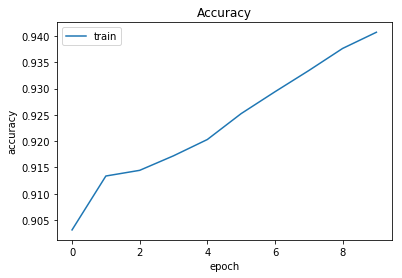

In [30]:
pred = model.predict(X_test_Scaled)
metrics = model.evaluate(X_train_Scaled, encoded_Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], metrics[1]*100))


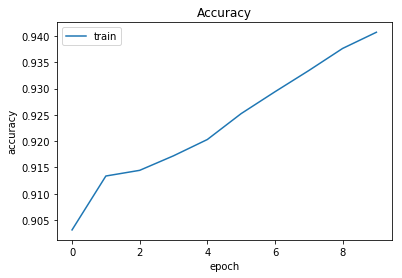

In [34]:
#Plot - Accuracy
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()


In [25]:
result = pd.DataFrame({"ID_code": test['ID_code'], "target": pred[:,0]})
result.head()

,ID_code,target
0,test_0,0.118962
1,test_1,0.084384
2,test_2,0.049495
3,test_3,0.140056
4,test_4,0.043367


In [27]:
result.to_csv("C:/Users/Katta's/PycharmProjects/AI-ML/AI-ML/Kaggle/santander-customer-transaction-prediction/data/submission1.csv", index=False)